# Analysis of cellphoneDB data

@mmm  
February 20, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# "scattermaps_mm.py" needs to be in the same folder as this notebook
import scattermaps_mm
from scattermaps_mm import scattermap

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
PATH = "/Users/mmm/BioPROJECTS/MAD1 & MVA/Results/220202 CellPhoneDB_ProbandAneu/"
DESKTOP = "/Users/mmm/Desktop/"

In [236]:
# Functions

def order_ratios(ratios):
    """Order ratios per MAX values (descendent, both in rows and columns)"""
    
    ratios_ordered = ratios.copy()
    ratios_ordered["MAX"] = ratios_ordered.max(axis=1)
    ratios_ordered.loc["MAX_column", :] = ratio_L2_ordered.max(axis=0)
    ratios_ordered = ratios_ordered.sort_values(["MAX"], ascending=False, axis=0)
    ratios_ordered = ratios_ordered.drop("MAX", axis=1)
    ratios_ordered = ratios_ordered.sort_values(["MAX_column"], ascending=False, axis=1)
    ratios_ordered = ratios_ordered.drop("MAX_column", axis=0)
    return ratios_ordered

# Separate Plots Proband and Controls

In [18]:
proband = pd.read_csv(DESKTOP + "Proband_significant_means_L1.txt", sep="\t")
proband = proband.set_index("interacting_pair")
proband.head(3)

B|B  B|CD4 T  B|CD8 T   B|DC  B|Mono   B|NK  B|other  \
interacting_pair                                                           
CD74_MIF          2.341    2.360    2.322  2.386   2.107  2.355    2.052   
C5AR1_RPS19         NaN      NaN      NaN    NaN     NaN    NaN      NaN   
CD74_COPA         2.005    1.992    2.010  2.138   2.095  1.997    1.923   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CD74_MIF              2.398      NaN          NaN  ...          NaN   
C5AR1_RPS19             NaN      NaN          NaN  ...          NaN   
CD74_COPA             2.012      NaN          NaN  ...          NaN   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CD74_MIF                    NaN        NaN            NaN            NaN   
C5AR1_RPS19                 NaN        NaN            NaN            NaN   
CD74_COPA                   NaN        NaN            NaN            NaN   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CD74_MIF                 NaN           NaN         NaN            NaN   
C5AR1_RPS19              NaN           NaN         NaN            NaN   
CD74_COPA                NaN           NaN         NaN            NaN   

                  other T|other T  
interacting_pair                   
CD74_MIF                      NaN  
C5AR1_RPS19                   NaN  
CD74_COPA                     NaN  

[3 rows x 64 columns]

In [22]:
proband_pvals = pd.read_csv(DESKTOP + "Proband_pvalues.txt", sep="\t")
proband_pvals = proband_pvals.set_index("interacting_pair")
proband_pvals.head(3)

B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
HLA-DPA1_TNFSF9   0.0      1.0      1.0   1.0     1.0   1.0      1.0   
PVR_TNFSF9        1.0      1.0      1.0   1.0     1.0   1.0      1.0   
PVR_CD96          1.0      1.0      1.0   1.0     1.0   1.0      1.0   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
HLA-DPA1_TNFSF9         1.0        1            1  ...          1.0   
PVR_TNFSF9              1.0        1            1  ...          1.0   
PVR_CD96                1.0        1            1  ...          1.0   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
HLA-DPA1_TNFSF9             1.0      0.977            1.0            1.0   
PVR_TNFSF9                  1.0      1.000            1.0            1.0   
PVR_CD96                    1.0      1.000            1.0            1.0   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
HLA-DPA1_TNFSF9          1.0           1.0         1.0            1.0   
PVR_TNFSF9               1.0           1.0         1.0            1.0   
PVR_CD96                 1.0           1.0         1.0            1.0   

                  other T|other T  
interacting_pair                   
HLA-DPA1_TNFSF9               1.0  
PVR_TNFSF9                    1.0  
PVR_CD96                      1.0  

[3 rows x 64 columns]

Select the first 40 interactions

In [57]:
proband_ordered = pd.DataFrame(proband.index[:40])
proband_ordered = proband_ordered.set_index("interacting_pair")

In [59]:
proband_pvals_ordered = proband_ordered.merge(proband_pvals, how="left", left_index=True, right_index=True)
proband_pvals_ordered = -np.log(proband_pvals_ordered)
proband_pvals_ordered = proband_pvals_ordered.replace(np.inf, 4)
proband_pvals_ordered.head(3)

B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
CD74_MIF          4.0      4.0      4.0   4.0     4.0   4.0      4.0   
C5AR1_RPS19      -0.0     -0.0     -0.0  -0.0    -0.0  -0.0     -0.0   
CD74_COPA         4.0      4.0      4.0   4.0     4.0   4.0      4.0   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CD74_MIF                4.0     -0.0         -0.0  ...         -0.0   
C5AR1_RPS19            -0.0     -0.0         -0.0  ...         -0.0   
CD74_COPA               4.0     -0.0         -0.0  ...         -0.0   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CD74_MIF               0.008032       -0.0           -0.0           -0.0   
C5AR1_RPS19           -0.000000       -0.0           -0.0           -0.0   
CD74_COPA             -0.000000       -0.0           -0.0           -0.0   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CD74_MIF                -0.0          -0.0        -0.0           -0.0   
C5AR1_RPS19             -0.0          -0.0        -0.0           -0.0   
CD74_COPA               -0.0          -0.0        -0.0           -0.0   

                  other T|other T  
interacting_pair                   
CD74_MIF                     -0.0  
C5AR1_RPS19                  -0.0  
CD74_COPA                    -0.0  

[3 rows x 64 columns]

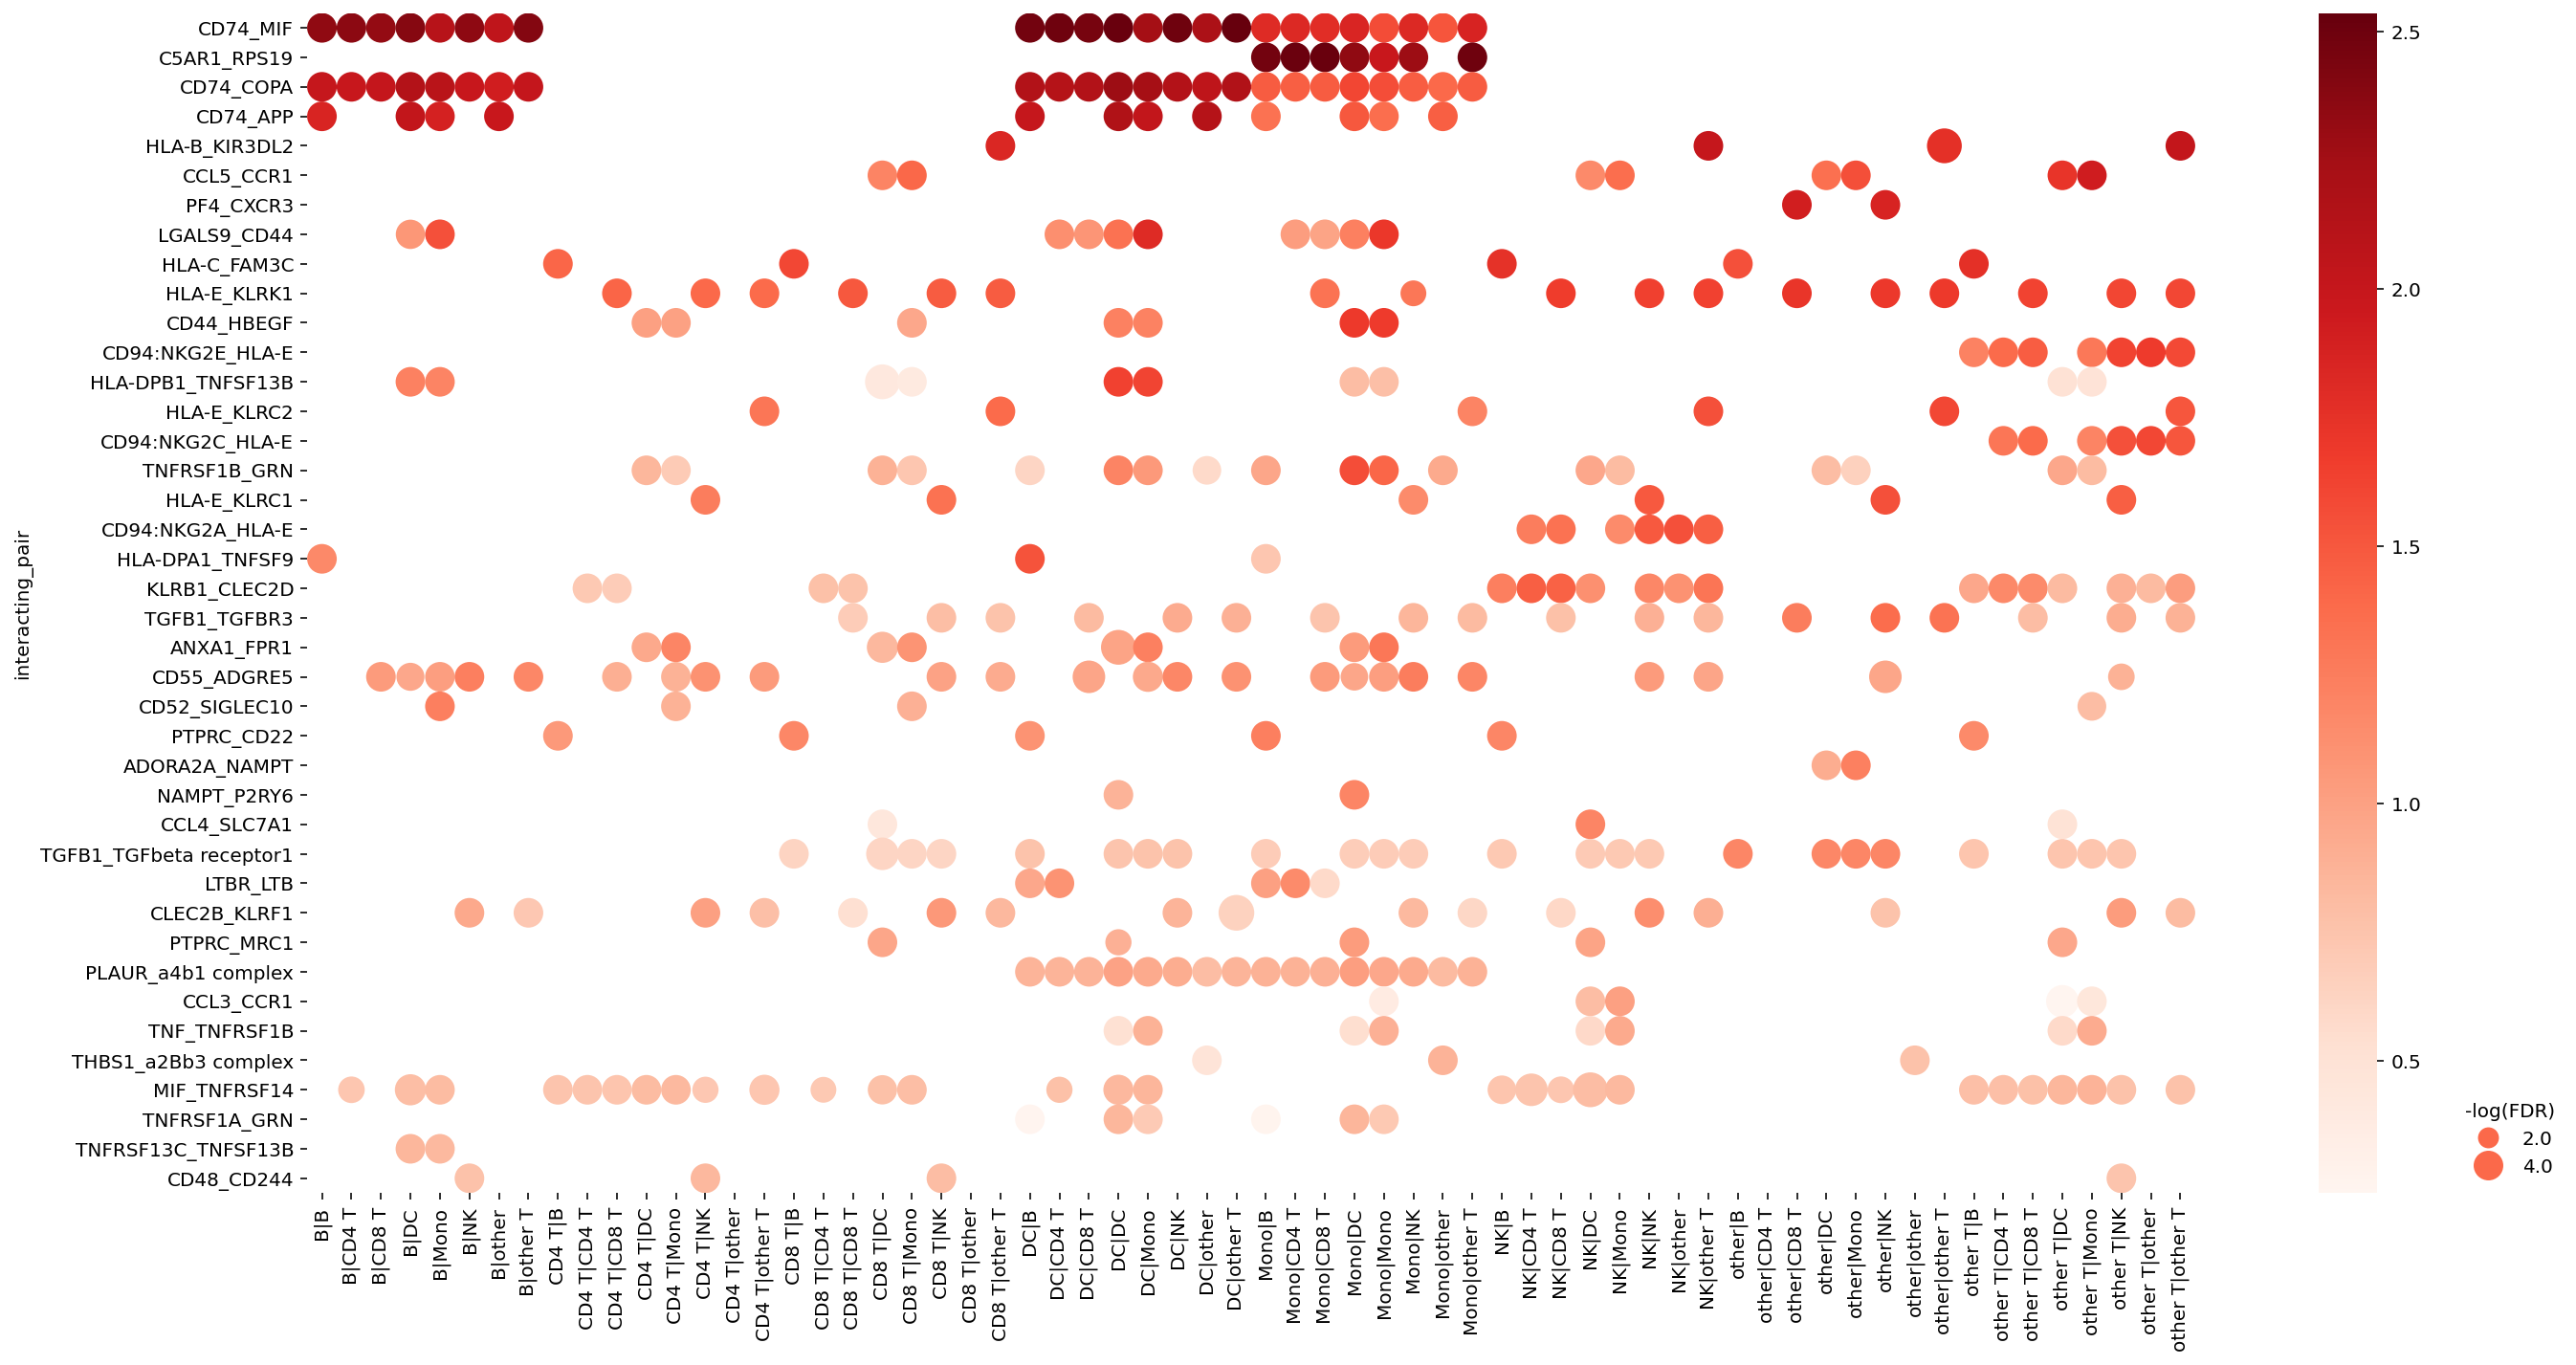

In [40]:
plt.figure(figsize=(20,10))
ax = scattermap(proband.iloc[:40,:], marker_size=proband_pvals_ordered, cmap='Reds', factor=60, square=True) #marker_size=pre_res_fdr
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

### Controls

In [41]:
controls = pd.read_csv(DESKTOP + "Controls_significant_means.txt", sep="\t")
controls = controls.set_index("interacting_pair")
controls.head(3)

B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
CCR6_CCL20        NaN      NaN      NaN   NaN     NaN   NaN      NaN   
EPHB6_EFNB1       NaN      NaN      NaN   NaN     NaN   NaN      NaN   
ESAM_ESAM         NaN      NaN      NaN   NaN     NaN   NaN      NaN   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CCR6_CCL20            0.215      NaN          NaN  ...          NaN   
EPHB6_EFNB1             NaN      NaN          NaN  ...          NaN   
ESAM_ESAM               NaN      NaN          NaN  ...         0.34   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CCR6_CCL20                  NaN        NaN            NaN            NaN   
EPHB6_EFNB1                 NaN        NaN            NaN            NaN   
ESAM_ESAM                   NaN        NaN            NaN            NaN   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CCR6_CCL20               NaN           NaN         NaN            NaN   
EPHB6_EFNB1              NaN           NaN         NaN            NaN   
ESAM_ESAM                NaN           NaN         NaN            NaN   

                  other T|other T  
interacting_pair                   
CCR6_CCL20                    NaN  
EPHB6_EFNB1                   NaN  
ESAM_ESAM                     NaN  

[3 rows x 64 columns]

In [42]:
controls_pvals = pd.read_csv(DESKTOP + "Proband_pvalues.txt", sep="\t")
controls_pvals = controls_pvals.set_index("interacting_pair")
controls_pvals.head(3)

B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
HLA-DPA1_TNFSF9   0.0      1.0      1.0   1.0     1.0   1.0      1.0   
PVR_TNFSF9        1.0      1.0      1.0   1.0     1.0   1.0      1.0   
PVR_CD96          1.0      1.0      1.0   1.0     1.0   1.0      1.0   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
HLA-DPA1_TNFSF9         1.0        1            1  ...          1.0   
PVR_TNFSF9              1.0        1            1  ...          1.0   
PVR_CD96                1.0        1            1  ...          1.0   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
HLA-DPA1_TNFSF9             1.0      0.977            1.0            1.0   
PVR_TNFSF9                  1.0      1.000            1.0            1.0   
PVR_CD96                    1.0      1.000            1.0            1.0   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
HLA-DPA1_TNFSF9          1.0           1.0         1.0            1.0   
PVR_TNFSF9               1.0           1.0         1.0            1.0   
PVR_CD96                 1.0           1.0         1.0            1.0   

                  other T|other T  
interacting_pair                   
HLA-DPA1_TNFSF9               1.0  
PVR_TNFSF9                    1.0  
PVR_CD96                      1.0  

[3 rows x 64 columns]

In [52]:
proband_ordered = pd.DataFrame(proband.index[:40])
proband_ordered = proband_ordered.set_index("interacting_pair")

In [60]:
controls_ordered = proband_ordered.merge(controls, how="left", left_index=True, right_index=True)
controls_pvals_ordered = proband_ordered.merge(controls_pvals, how="left", left_index=True, right_index=True)
controls_pvals_ordered = -np.log(controls_pvals_ordered)
controls_pvals_ordered = controls_pvals_ordered.replace(np.inf, 4)
controls_pvals_ordered.head(3)

B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
CD74_MIF          4.0      4.0      4.0   4.0     4.0   4.0      4.0   
C5AR1_RPS19      -0.0     -0.0     -0.0  -0.0    -0.0  -0.0     -0.0   
CD74_COPA         4.0      4.0      4.0   4.0     4.0   4.0      4.0   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CD74_MIF                4.0     -0.0         -0.0  ...         -0.0   
C5AR1_RPS19            -0.0     -0.0         -0.0  ...         -0.0   
CD74_COPA               4.0     -0.0         -0.0  ...         -0.0   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CD74_MIF               0.008032       -0.0           -0.0           -0.0   
C5AR1_RPS19           -0.000000       -0.0           -0.0           -0.0   
CD74_COPA             -0.000000       -0.0           -0.0           -0.0   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CD74_MIF                -0.0          -0.0        -0.0           -0.0   
C5AR1_RPS19             -0.0          -0.0        -0.0           -0.0   
CD74_COPA               -0.0          -0.0        -0.0           -0.0   

                  other T|other T  
interacting_pair                   
CD74_MIF                     -0.0  
C5AR1_RPS19                  -0.0  
CD74_COPA                    -0.0  

[3 rows x 64 columns]

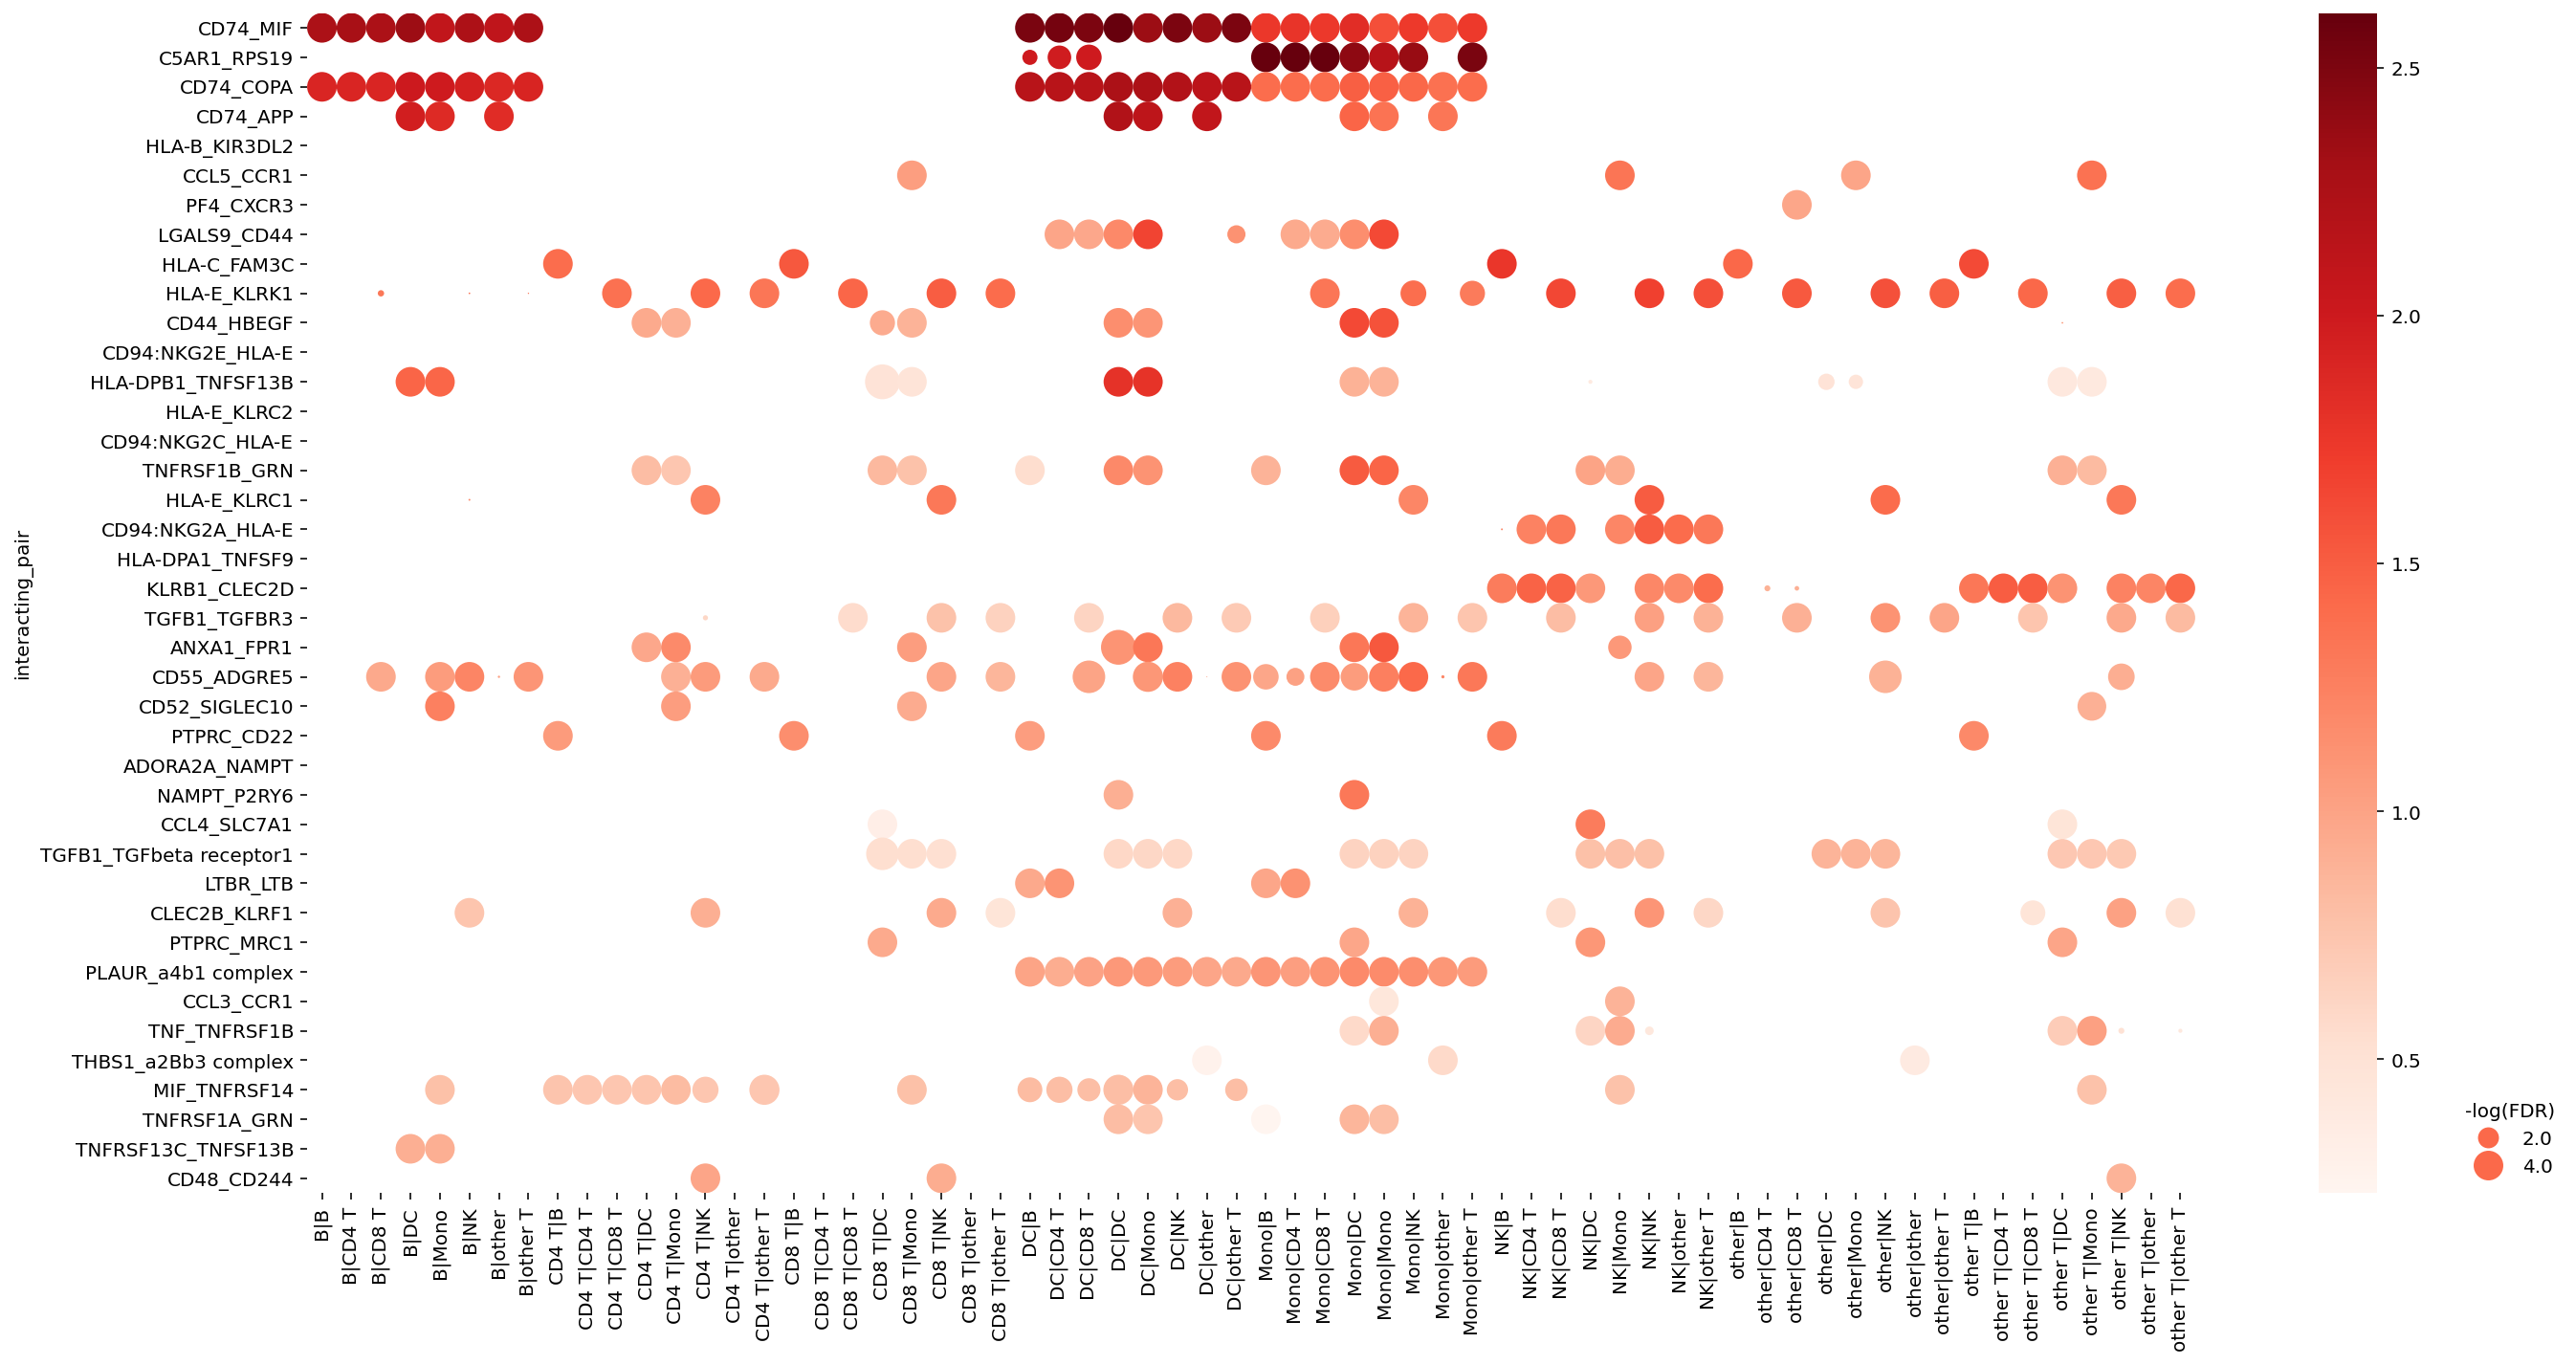

In [67]:
plt.figure(figsize=(20,10))
ax = scattermap(controls_ordered, marker_size=controls_pvals_ordered, cmap='Reds', factor=60, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

# Ratio between proband and controls (L1)

In [3]:
proband = pd.read_csv(DESKTOP + "Proband_significant_means_L1.txt", sep="\t")
proband = proband.set_index("interacting_pair")
print(proband.shape)
proband.head(3)

(800, 64)


B|B  B|CD4 T  B|CD8 T   B|DC  B|Mono   B|NK  B|other  \
interacting_pair                                                           
CD74_MIF          2.341    2.360    2.322  2.386   2.107  2.355    2.052   
C5AR1_RPS19         NaN      NaN      NaN    NaN     NaN    NaN      NaN   
CD74_COPA         2.005    1.992    2.010  2.138   2.095  1.997    1.923   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CD74_MIF              2.398      NaN          NaN  ...          NaN   
C5AR1_RPS19             NaN      NaN          NaN  ...          NaN   
CD74_COPA             2.012      NaN          NaN  ...          NaN   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CD74_MIF                    NaN        NaN            NaN            NaN   
C5AR1_RPS19                 NaN        NaN            NaN            NaN   
CD74_COPA                   NaN        NaN            NaN            NaN   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CD74_MIF                 NaN           NaN         NaN            NaN   
C5AR1_RPS19              NaN           NaN         NaN            NaN   
CD74_COPA                NaN           NaN         NaN            NaN   

                  other T|other T  
interacting_pair                   
CD74_MIF                      NaN  
C5AR1_RPS19                   NaN  
CD74_COPA                     NaN  

[3 rows x 64 columns]

In [4]:
controls = pd.read_csv(DESKTOP + "Controls_significant_means_L1.txt", sep="\t")
controls = controls.set_index("interacting_pair")
print(controls.shape)
controls.head(3)

(847, 64)


B|B  B|CD4 T  B|CD8 T  B|DC  B|Mono  B|NK  B|other  \
interacting_pair                                                       
CCR6_CCL20        NaN      NaN      NaN   NaN     NaN   NaN      NaN   
EPHB6_EFNB1       NaN      NaN      NaN   NaN     NaN   NaN      NaN   
ESAM_ESAM         NaN      NaN      NaN   NaN     NaN   NaN      NaN   

                  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                   ...                
CCR6_CCL20            0.215      NaN          NaN  ...          NaN   
EPHB6_EFNB1             NaN      NaN          NaN  ...          NaN   
ESAM_ESAM               NaN      NaN          NaN  ...         0.34   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CCR6_CCL20                  NaN        NaN            NaN            NaN   
EPHB6_EFNB1                 NaN        NaN            NaN            NaN   
ESAM_ESAM                   NaN        NaN            NaN            NaN   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CCR6_CCL20               NaN           NaN         NaN            NaN   
EPHB6_EFNB1              NaN           NaN         NaN            NaN   
ESAM_ESAM                NaN           NaN         NaN            NaN   

                  other T|other T  
interacting_pair                   
CCR6_CCL20                    NaN  
EPHB6_EFNB1                   NaN  
ESAM_ESAM                     NaN  

[3 rows x 64 columns]

In [5]:
# Order controls as in proband
proband_order = proband[[]].copy()
controls_ordered = proband_order.merge(controls, how="left", left_index=True, right_index=True)

In [6]:
# Ratio
ratio = proband / controls_ordered
ratio.head(3)

B|B   B|CD4 T   B|CD8 T      B|DC    B|Mono      B|NK  \
interacting_pair                                                               
CD74_MIF          1.037218  1.030568  1.031083  1.015319  1.003811  1.048531   
C5AR1_RPS19            NaN       NaN       NaN       NaN       NaN       NaN   
CD74_COPA         1.053046  1.046768  1.055672  1.069535  1.053823  1.024628   

                   B|other  B|other T  CD4 T|B  CD4 T|CD4 T  ...  other|other  \
interacting_pair                                             ...                
CD74_MIF          0.977143   1.067201      NaN          NaN  ...          NaN   
C5AR1_RPS19            NaN        NaN      NaN          NaN  ...          NaN   
CD74_COPA         1.022329   1.055060      NaN          NaN  ...          NaN   

                  other|other T  other T|B  other T|CD4 T  other T|CD8 T  \
interacting_pair                                                           
CD74_MIF                    NaN        NaN            NaN            NaN   
C5AR1_RPS19                 NaN        NaN            NaN            NaN   
CD74_COPA                   NaN        NaN            NaN            NaN   

                  other T|DC  other T|Mono  other T|NK  other T|other  \
interacting_pair                                                        
CD74_MIF                 NaN           NaN         NaN            NaN   
C5AR1_RPS19              NaN           NaN         NaN            NaN   
CD74_COPA                NaN           NaN         NaN            NaN   

                  other T|other T  
interacting_pair                   
CD74_MIF                      NaN  
C5AR1_RPS19                   NaN  
CD74_COPA                     NaN  

[3 rows x 64 columns]

In [21]:
# Calculate and order MAX values
ratio_sorted = order_ratios(ratio)

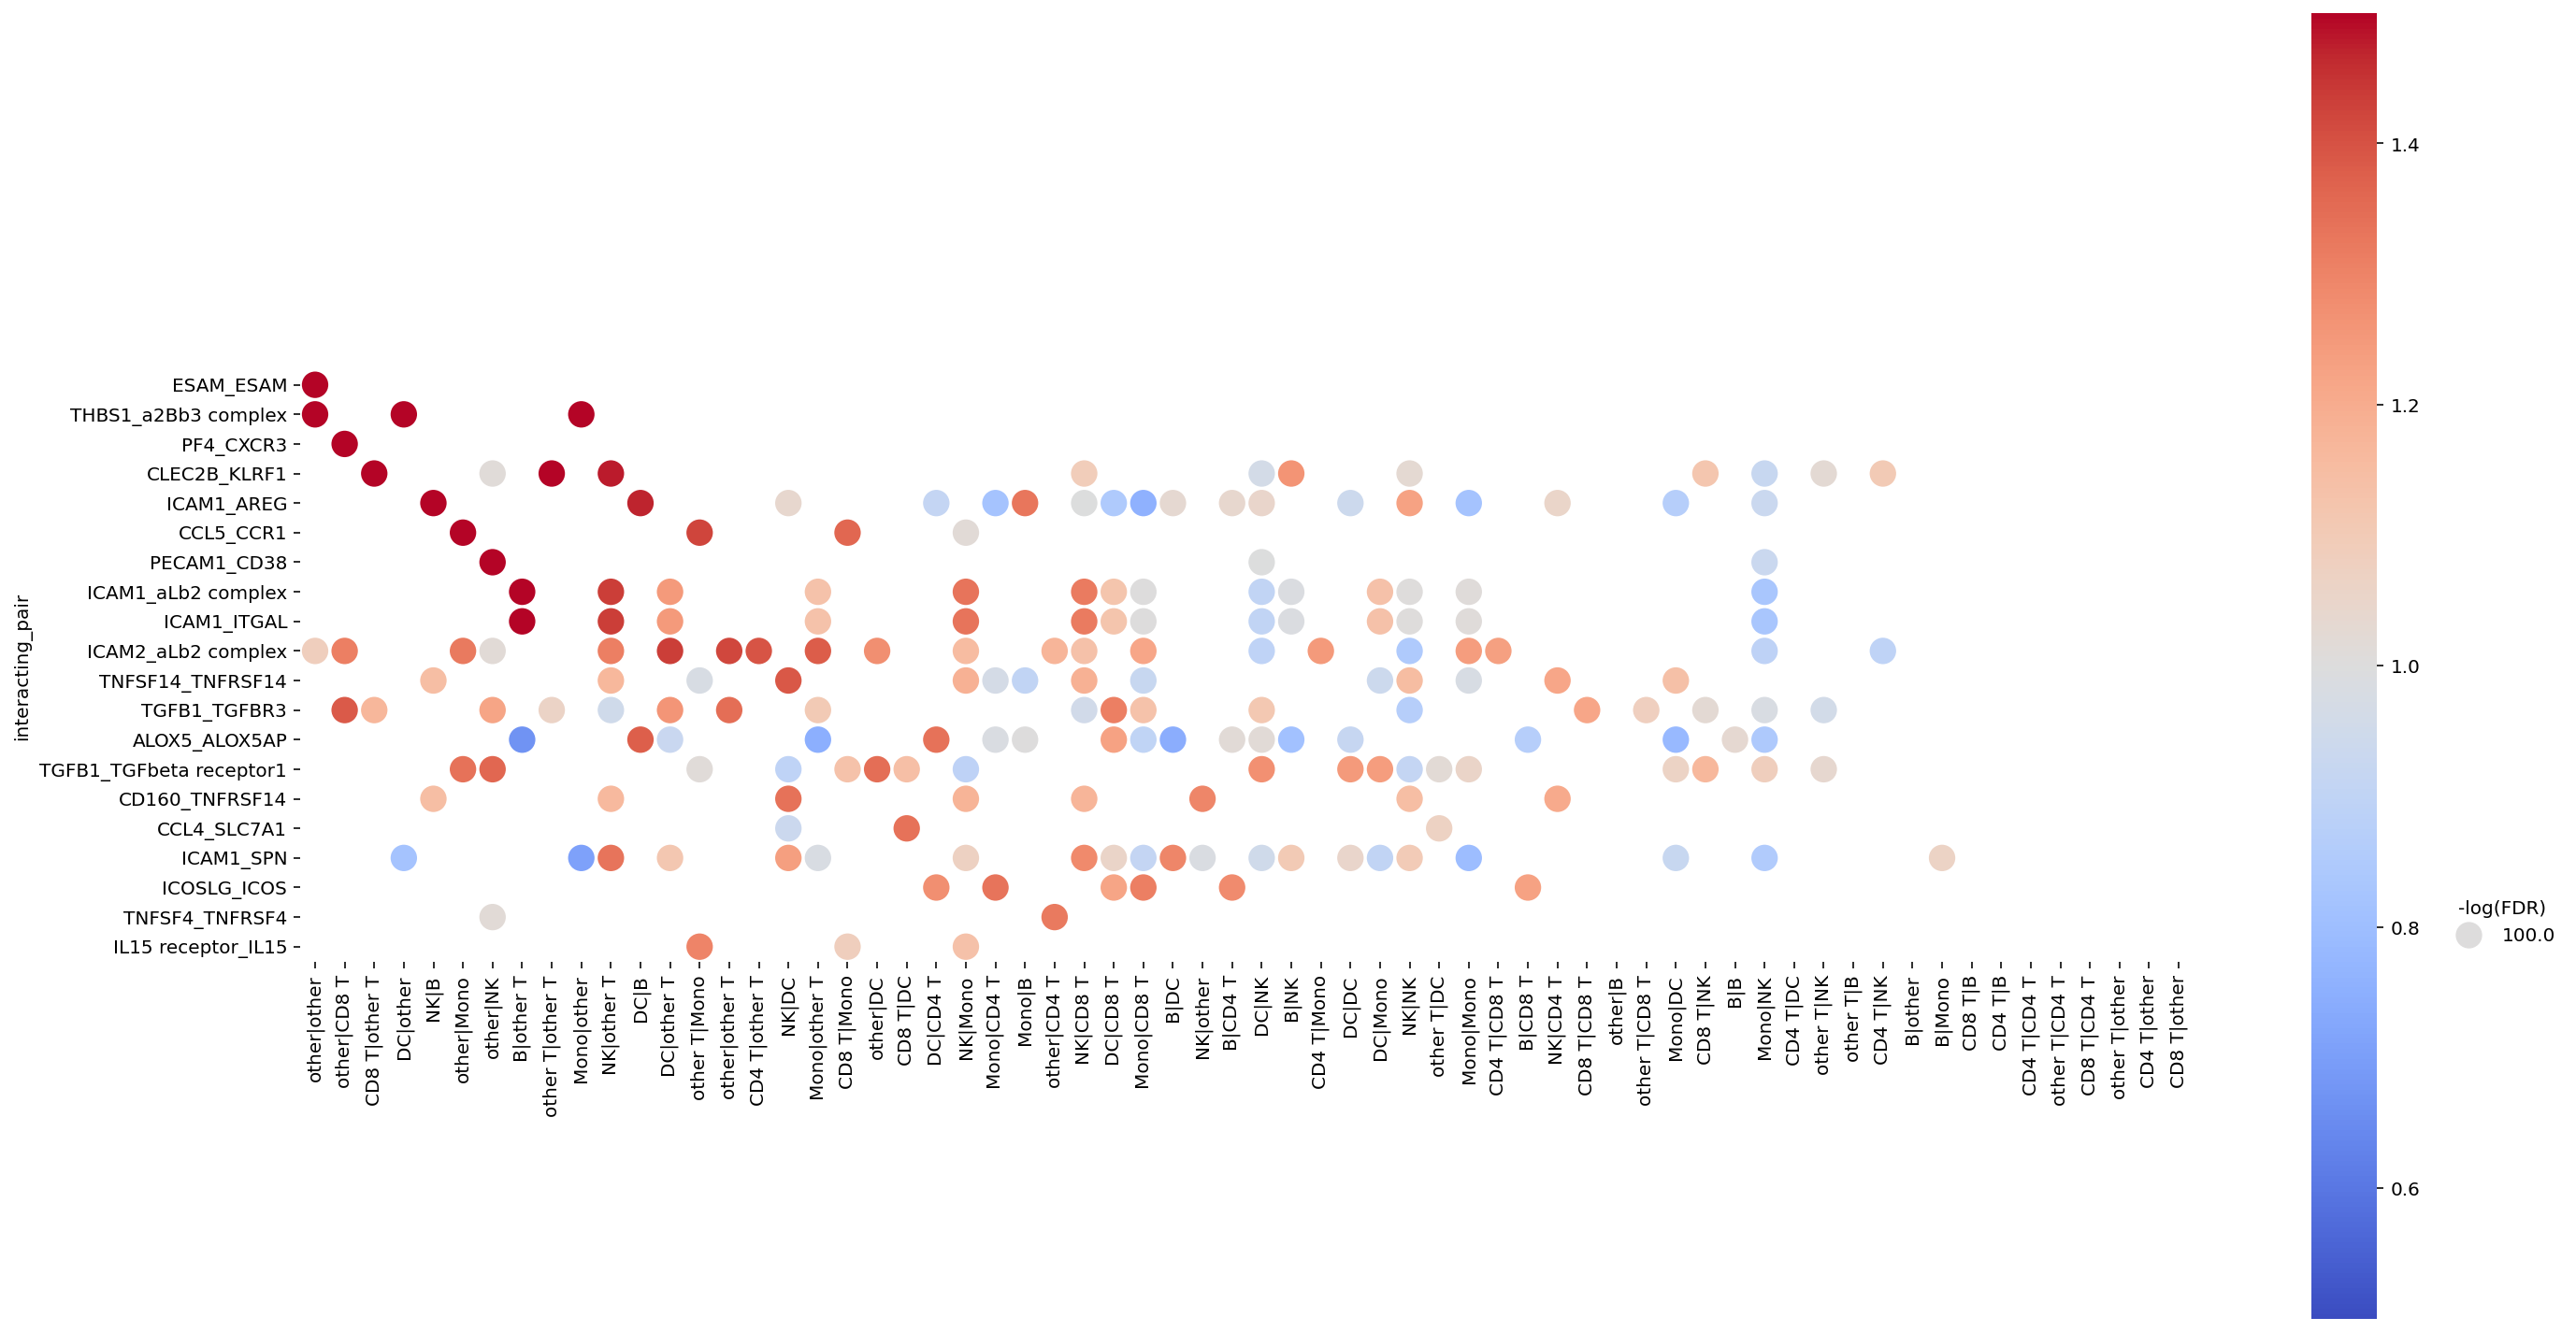

In [33]:
plt.figure(figsize=(20,10))
ax = scattermap(ratio_sorted.iloc[:20,:], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

### Analyze L1 interactions in L2

In [143]:
## MUlktiple

interactions = ["ESAM_ESAM", "THBS1_a2Bb3 complex", "PF4_CXCR3", "CLEC2B_KLRF1", 
                "ICAM1_AREG", "ICAM1_aLb2 complex", "ICAM1_ITGAL", "ICAM4_aLb2 complex", "ICAM1_SPN",
                "CCL5_CCR1", "PECAM1_CD38", 
                "TNFSF14_TNFRSF14", "CD160_TNFRSF14", 
                "TGFB1_TGFBR3", "TGFB1_TGFbeta receptor1", 
                "ALOX5_ALOX5AP", "CCL4_SLC7A1", "ICOSLG_ICOS",
                "IL15 receptor_IL15"
               ]

#"TNFSF14_LTBR", "TNFSF4_TNFRSF4",

In [144]:
ratio_L2 = pd.read_csv(DESKTOP + "ratio_L2.tsv", sep="\t")
ratio_L2 = ratio_L2.set_index("interacting_pair")

In [147]:
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(interactions)]
ratio_L2_ordered = order_ratios(ratio_L2_selected)
ratio_L2_ordered.to_csv(DESKTOP + "ratio_L2_selected.tsv", sep="\t")

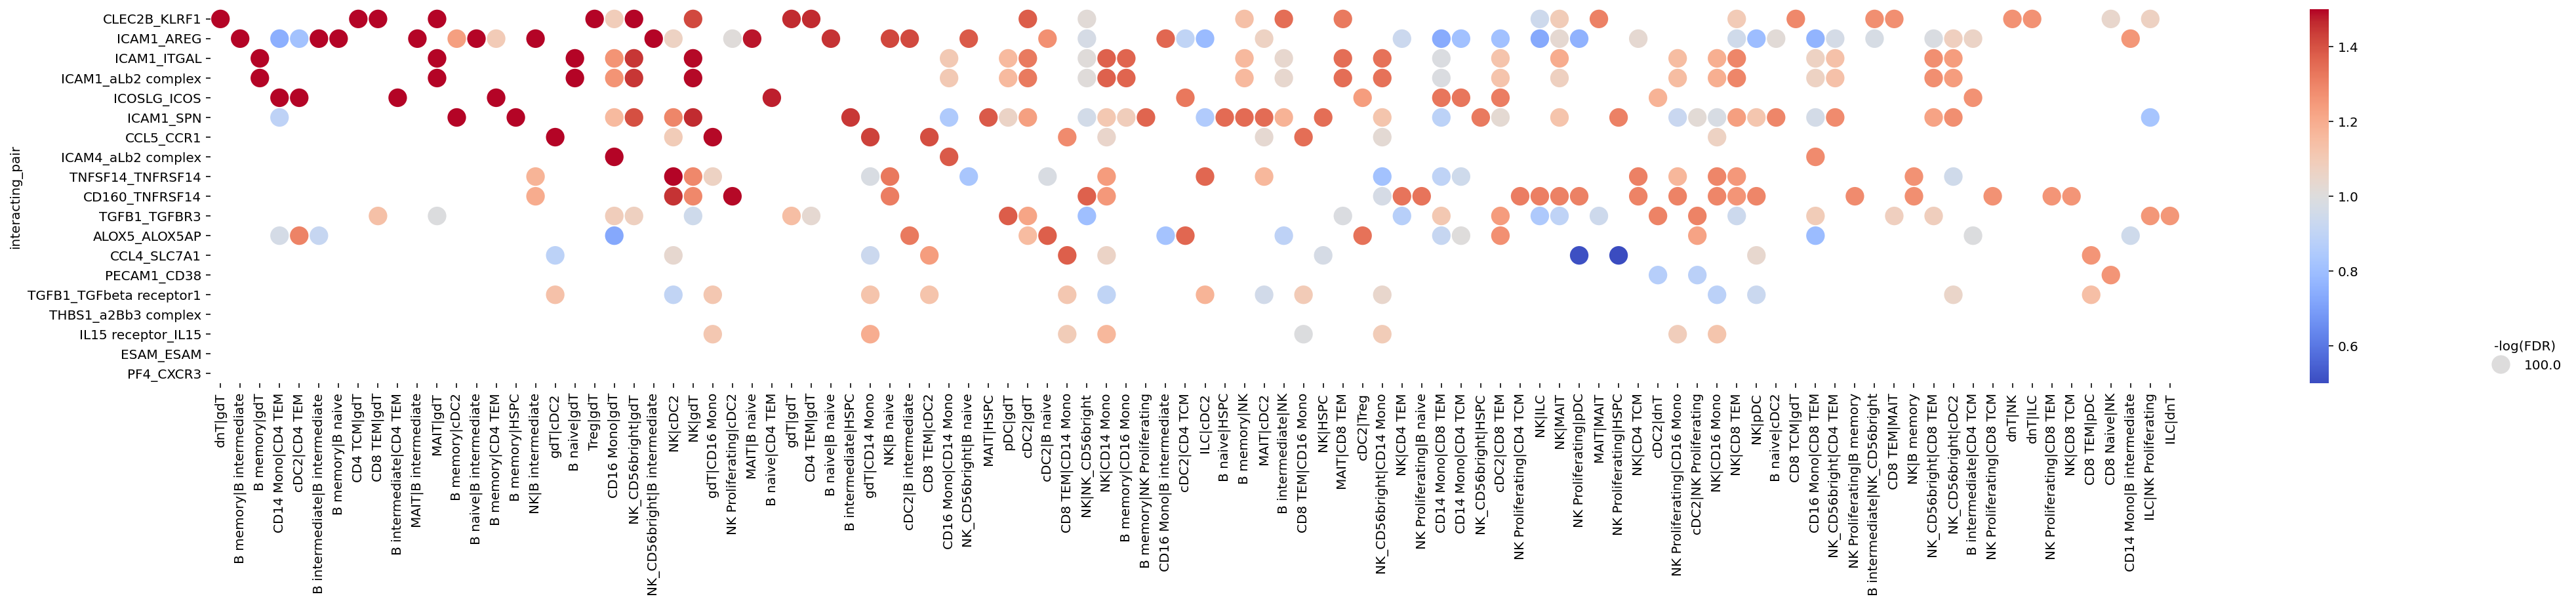

In [148]:
plt.figure(figsize=(30,6))
ax = scattermap(ratio_L2_ordered.iloc[:,:100], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

## Separate per families

In [149]:
# Platelets
i = ["PECAM1_CD38","ESAM_ESAM", "PF4_CXCR3"]
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(i)]
ratio_L2_selected = order_ratios(ratio_L2_selected)

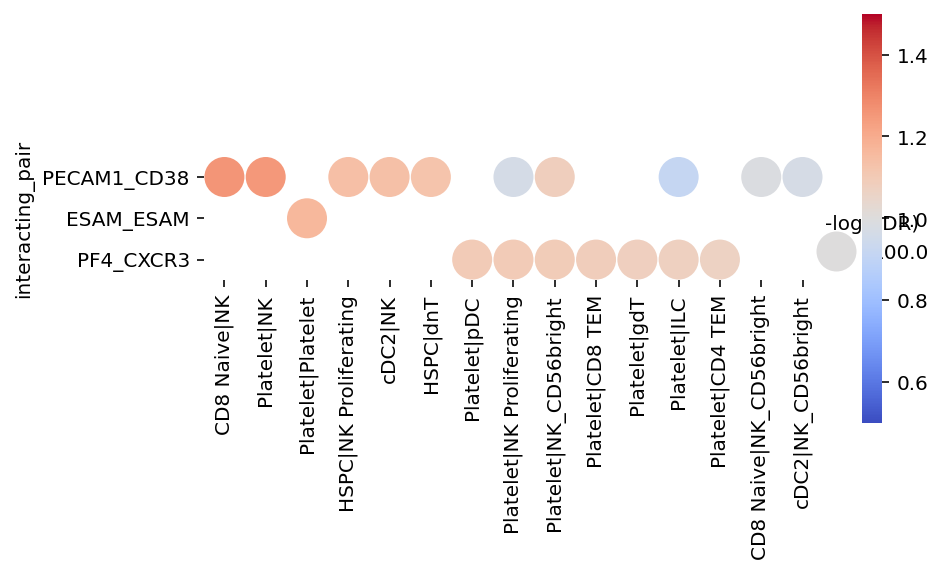

In [159]:
plt.figure(figsize=(7,4))
ax = scattermap(ratio_L2_selected.iloc[:,:15], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=4, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [168]:
# NK-gdT
i = ["TNFSF14_TNFRSF14", "CD160_TNFRSF14", "CCL5_CCR1", "IL15 receptor_IL15"]
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(i)]
ratio_L2_selected = order_ratios(ratio_L2_selected)

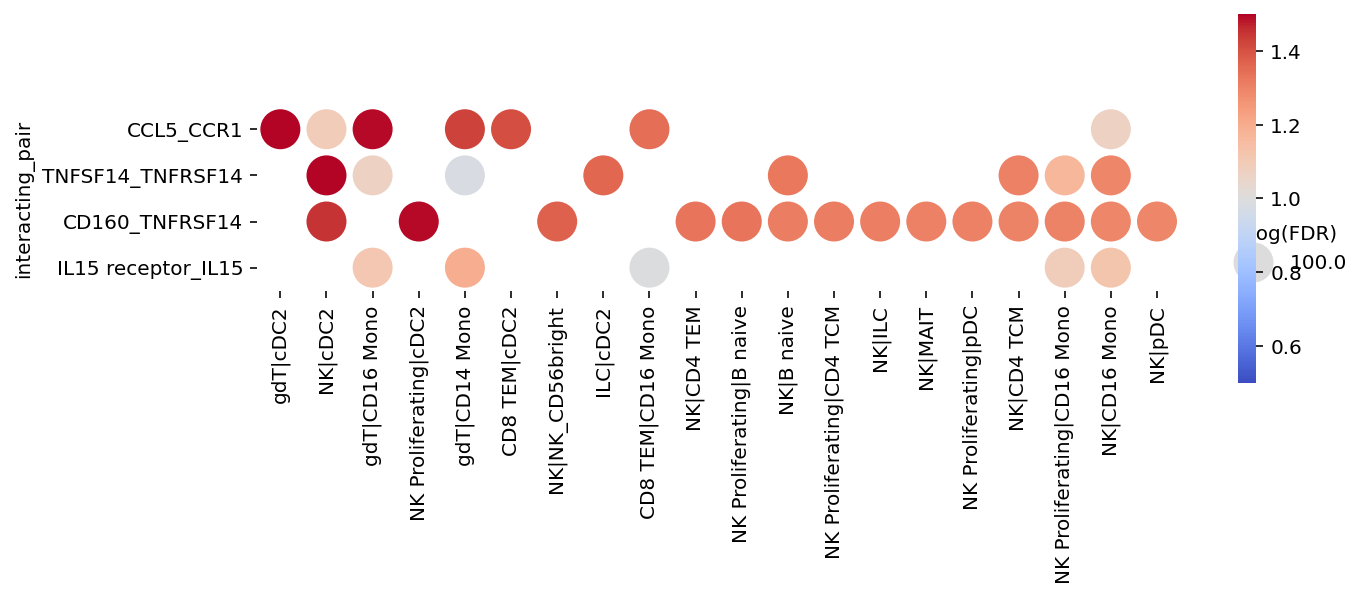

In [170]:
plt.figure(figsize=(10,4))
ax = scattermap(ratio_L2_selected.iloc[:,:20], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=4, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [178]:
# CD8
i = ["CLEC2B_KLRF1", "CCL4_SLC7A1"]
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(i)]
ratio_L2_selected = order_ratios(ratio_L2_selected)

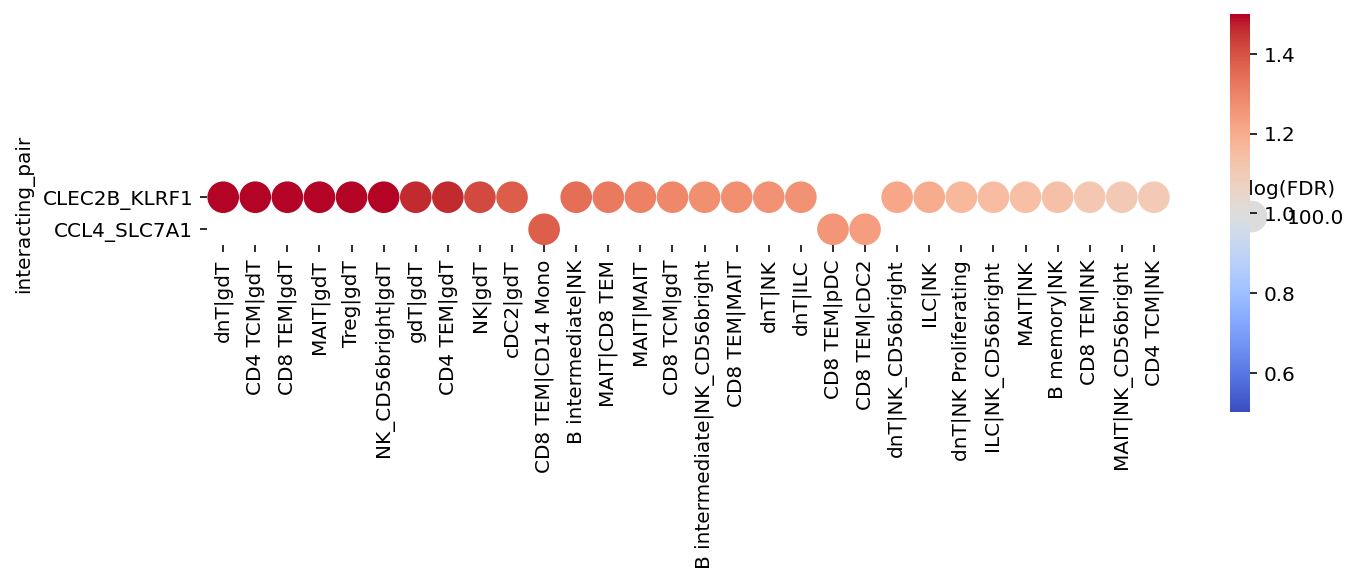

In [182]:
plt.figure(figsize=(10,4))
ax = scattermap(ratio_L2_selected.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2.5, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [186]:
# dendritic
i = ["ICOSLG_ICOS","THBS1_a2Bb3 complex", "ICAM1_aLb4 complex", "ALOX5_ALOX5AP", 
     "TGFB1_TGFBR3", "TGFB1_TGFbeta receptor1"]
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(i)]
ratio_L2_selected = order_ratios(ratio_L2_selected)

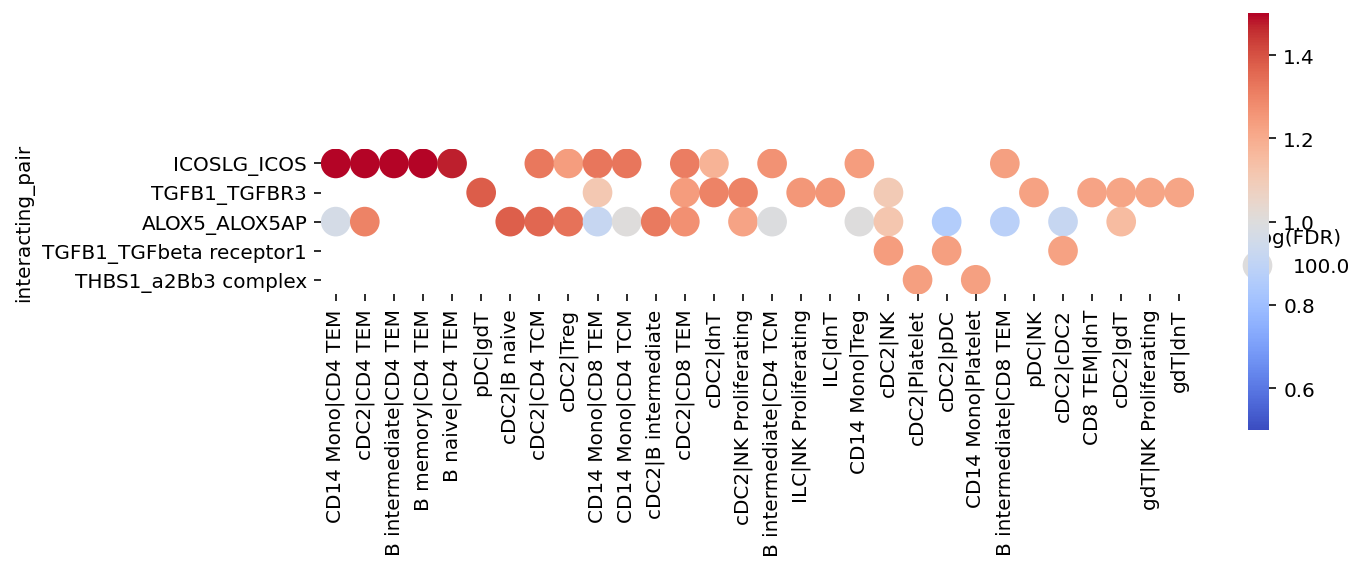

In [189]:
plt.figure(figsize=(10,4))
ax = scattermap(ratio_L2_selected.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2.2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [190]:
# B
i = ["ICAM1_AREG", "ICAM1_aLb2 complex", "ICAM1_ITGAL", "ICAM1_SPN",]
ratio_L2_selected = ratio_L2[ratio_L2.index.isin(i)]
ratio_L2_selected = order_ratios(ratio_L2_selected)

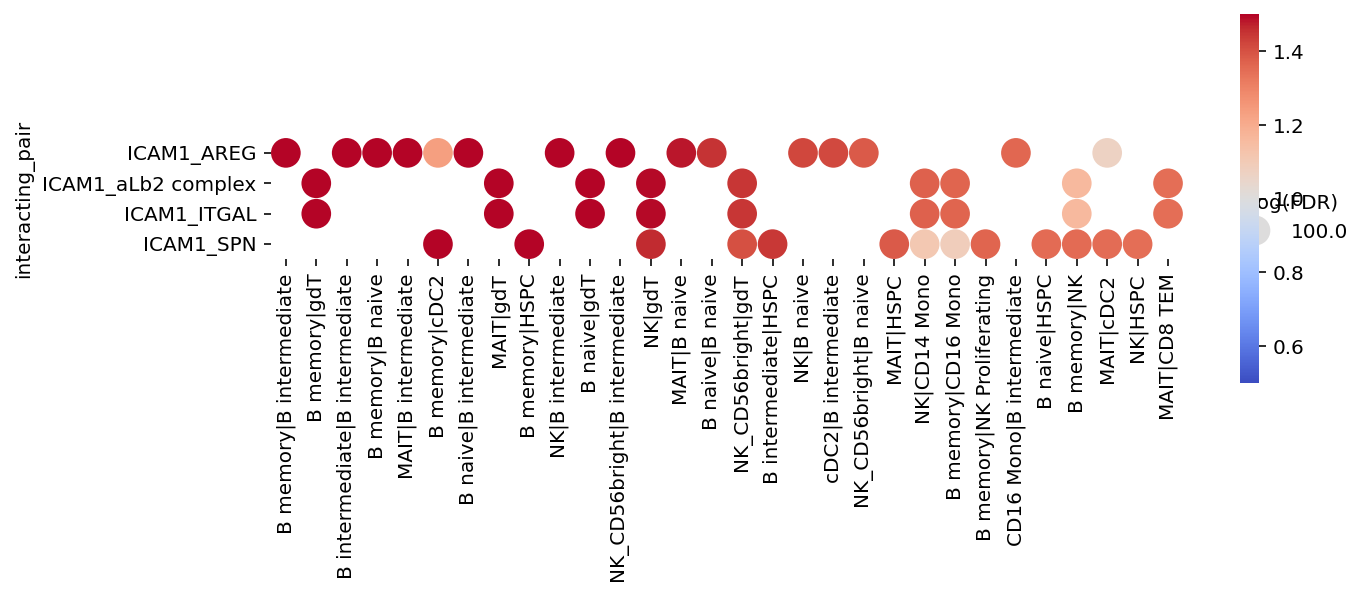

In [192]:
plt.figure(figsize=(10,4))
ax = scattermap(ratio_L2_selected.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2.2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

### Analyze L1 interactions in L3

In [100]:
ratio_L3 = pd.read_csv(DESKTOP + "ratio_L3.tsv", sep="\t")
ratio_L3 = ratio_L3.set_index("interacting_pair")

In [101]:
ratio_L3_selected = ratio_L3[ratio_L3.index.isin(interactions)]
ratio_L3_selected = order_ratios(ratio_L3_selected)
ratio_L3_selected.to_csv(DESKTOP + "ratio_L3_selected.tsv", sep="\t")

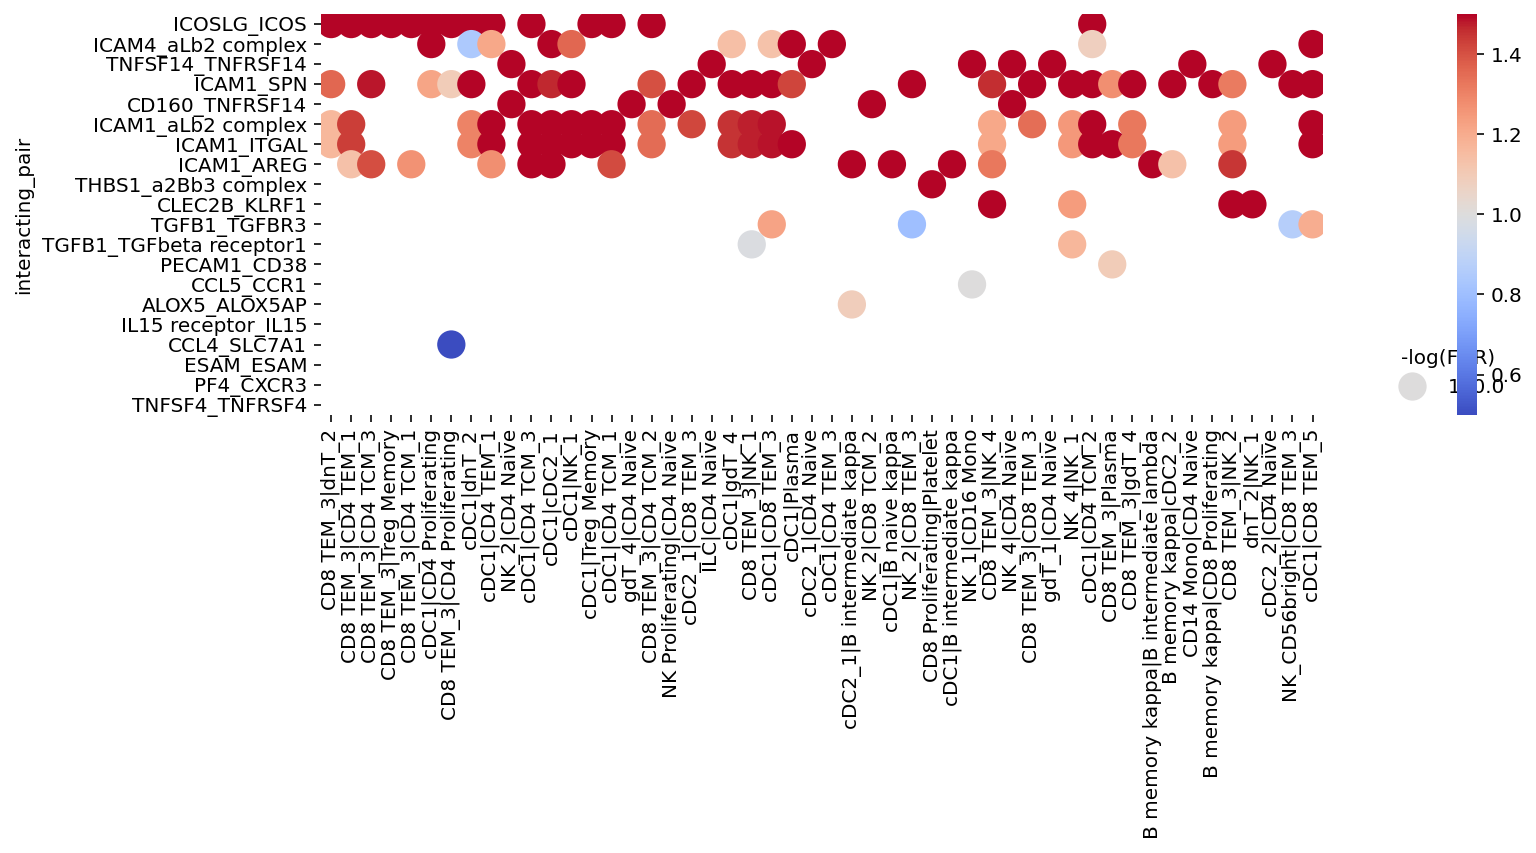

In [104]:
plt.figure(figsize=(20,6))
ax = scattermap(ratio_L3_selected.iloc[:,:50], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

## Separate per families

In [79]:
# Platelets
i = ["ESAM_ESAM", "PF4_CXCR3"]
ratio_L3_selected = ratio_L3[ratio_L3.index.isin(i)]
ratio_L3_selected = order_ratios(ratio_L3_selected)

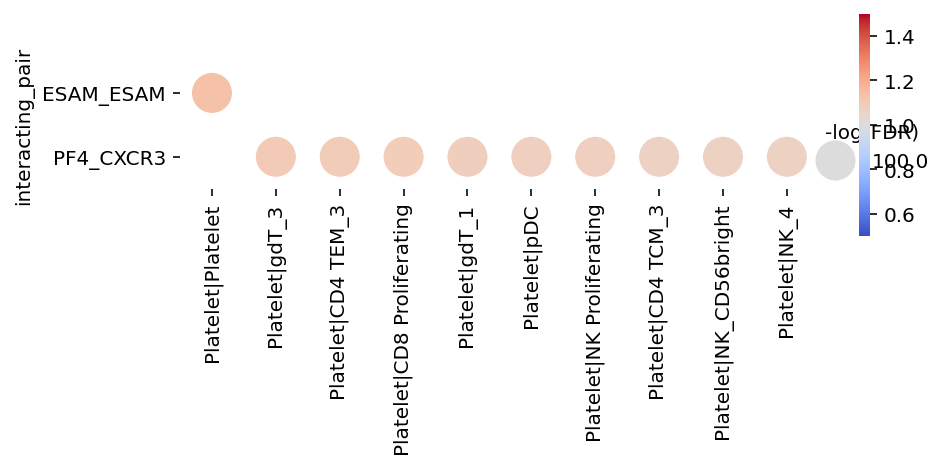

In [81]:
plt.figure(figsize=(7,3))
ax = scattermap(ratio_L3_selected.iloc[:,:10], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=4, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [105]:
# NKs_gdT
i = ["TNFSF14_TNFRSF14", "CD160_TNFRSF14", "CLEC2B_KLRF1", "IL15 receptor_IL15"]
ratio_L3_selected = ratio_L3[ratio_L3.index.isin(i)]
ratio_L3_selected = order_ratios(ratio_L3_selected)

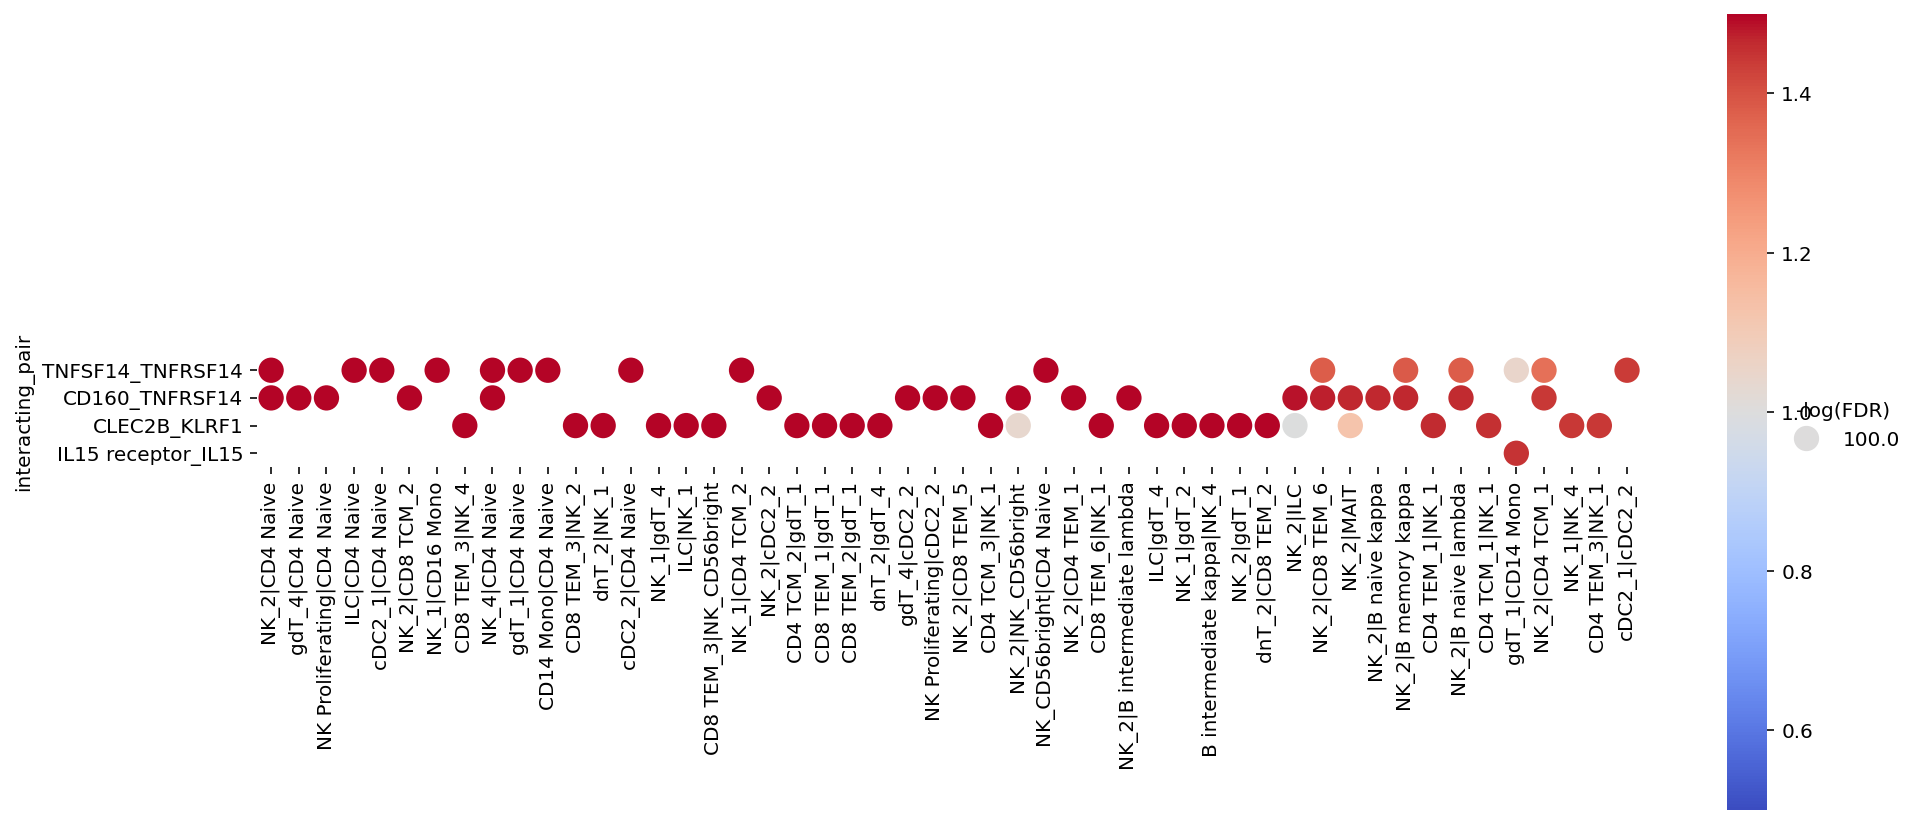

In [111]:
plt.figure(figsize=(14,6))
ax = scattermap(ratio_L3_selected.iloc[:,:50], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=1.6, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [112]:
# dendritic
i = ["ICAM1_AREG", "ICAM1_aLb2 complex", "ICAM1_ITGAL", "ICAM4_aLb2 complex", "ICAM1_SPN",
     "TNFSF14_TNFRSF14", "PECAM1_CD38", "ALOX5_ALOX5AP",]
ratio_L3_selected = ratio_L3[ratio_L3.index.isin(i)]
ratio_L3_selected = order_ratios(ratio_L3_selected)

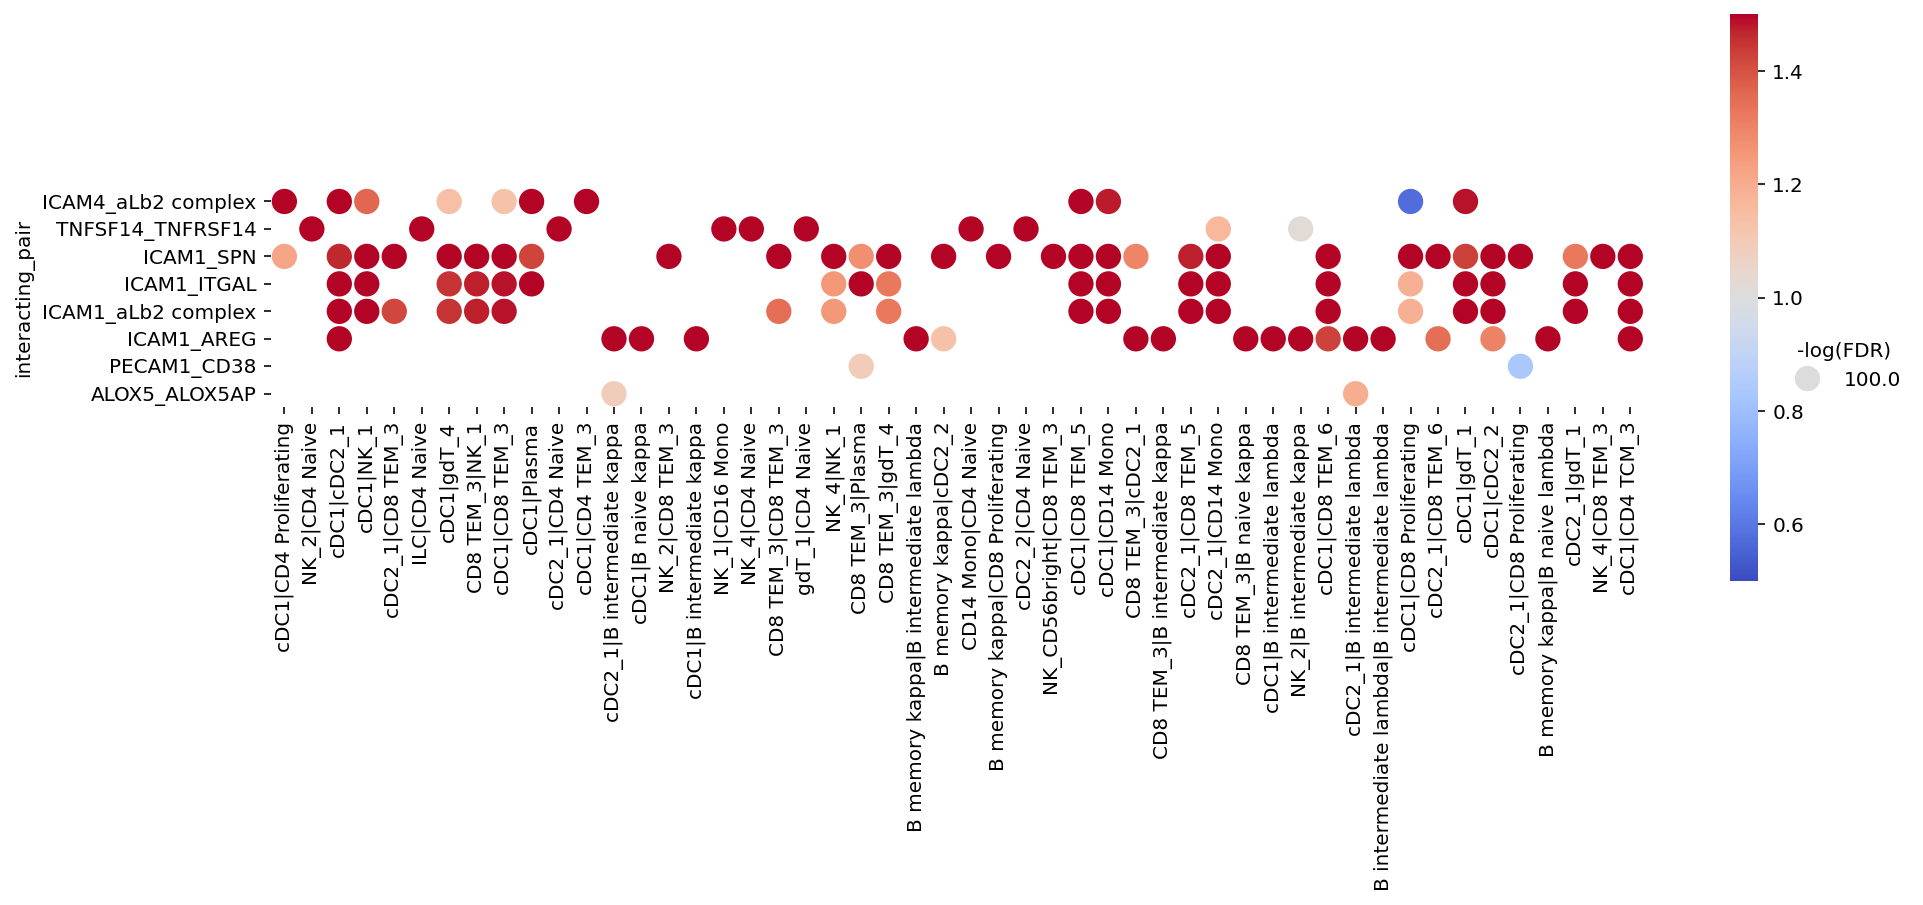

In [114]:
plt.figure(figsize=(14,6))
ax = scattermap(ratio_L3_selected.iloc[:,:50], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=1.6, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [115]:
# CD8
i = ["THBS1_a2Bb3 complex", "CLEC2B_KLRF1", "CCL5_CCR1", "TGFB1_TGFBR3", "TGFB1_TGFbeta receptor1", "ICOSLG_ICOS", ]
ratio_L3_selected = ratio_L3[ratio_L3.index.isin(i)]
ratio_L3_selected = order_ratios(ratio_L3_selected)

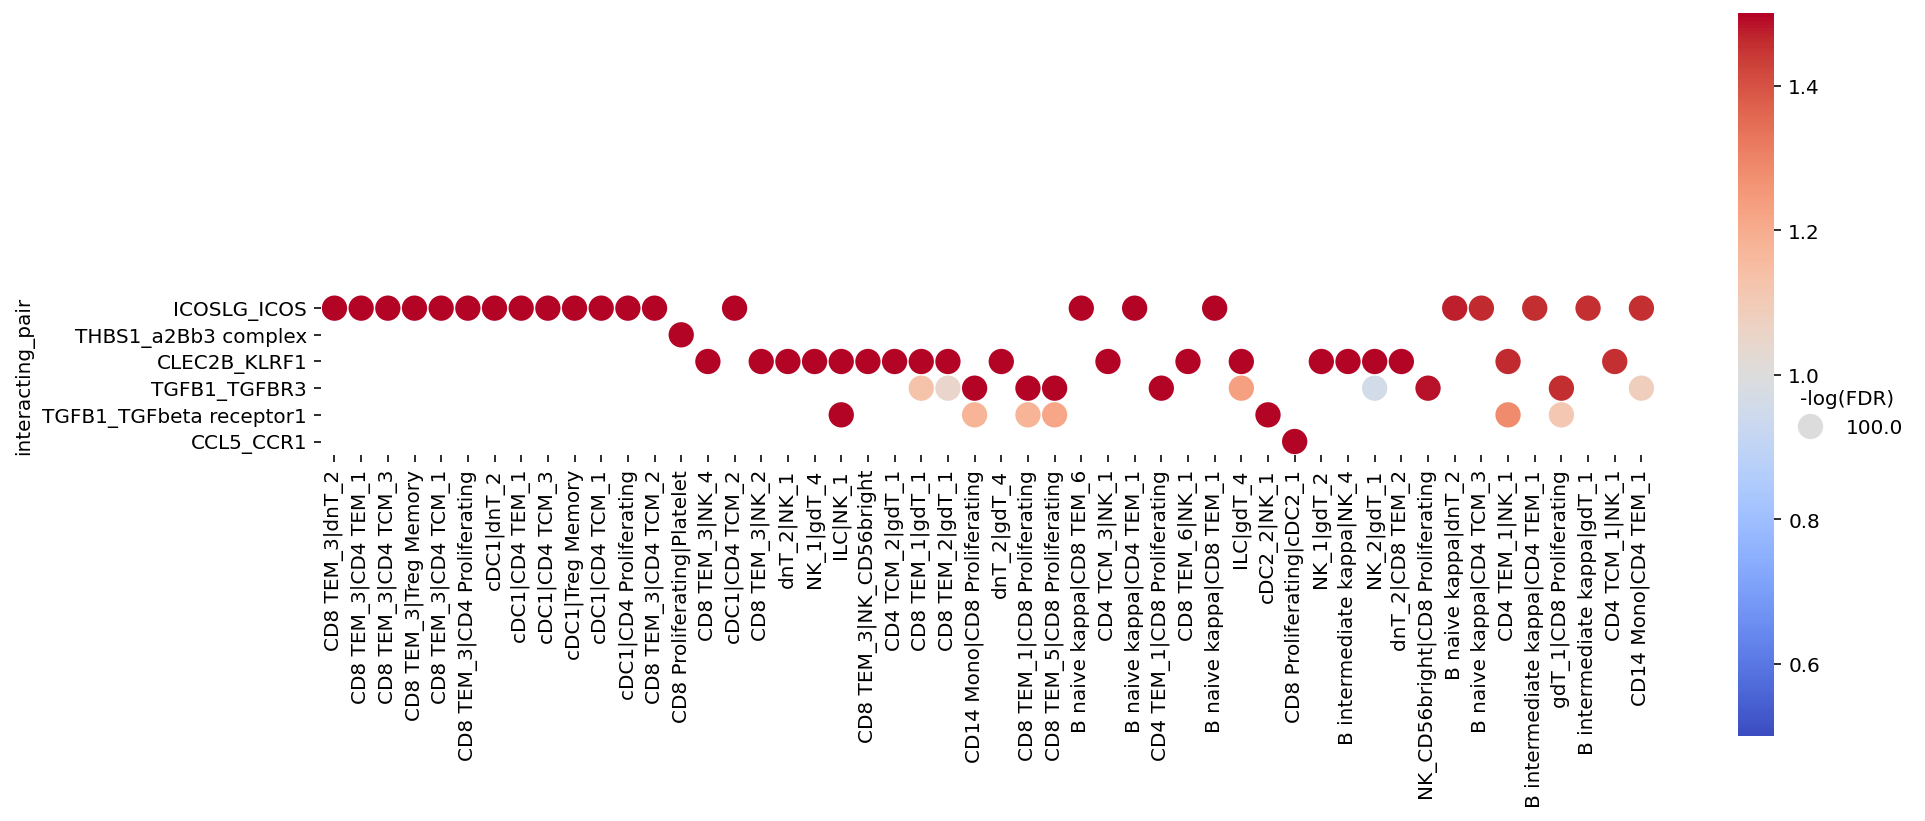

In [117]:
plt.figure(figsize=(14,6))
ax = scattermap(ratio_L3_selected.iloc[:,:50], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=1.6, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

In [ ]:
## OLDER

In [30]:
# Import data ordered by MAX value , only columns >1.3
ratio = pd.read_csv(DESKTOP + "ratio_MAX_ordered_clean_1.3.tsv", sep="\t")
ratio = ratio.set_index("interacting_pair")
ratio = ratio.drop("MAX", axis=1)
print(ratio.shape)
ratio.head(3)

(30, 28)


B|other T  CD4 T|other T  CD8 T|DC  CD8 T|Mono  \
interacting_pair                                                      
ESAM_ESAM                  NaN            NaN       NaN         NaN   
THBS1_a2Bb3 complex        NaN            NaN       NaN         NaN   
PF4_CXCR3                  NaN            NaN       NaN         NaN   

                     CD8 T|other T  DC|B  DC|CD4 T  DC|CD8 T  DC|other  \
interacting_pair                                                         
ESAM_ESAM                      NaN   NaN       NaN       NaN       NaN   
THBS1_a2Bb3 complex            NaN   NaN       NaN       NaN  1.769231   
PF4_CXCR3                      NaN   NaN       NaN       NaN       NaN   

                     DC|other T  ...  NK|Mono  NK|other T  other|CD4 T  \
interacting_pair                 ...                                     
ESAM_ESAM                   NaN  ...      NaN         NaN          NaN   
THBS1_a2Bb3 complex         NaN  ...      NaN         NaN          NaN   
PF4_CXCR3                   NaN  ...      NaN         NaN          NaN   

                     other|DC  other|Mono  other|NK  other|other  \
interacting_pair                                                   
ESAM_ESAM                 NaN         NaN       NaN     2.164706   
THBS1_a2Bb3 complex       NaN         NaN       NaN     2.021053   
PF4_CXCR3                 NaN         NaN       NaN          NaN   

                     other|other T  other T|Mono  other T|other T  
interacting_pair                                                   
ESAM_ESAM                      NaN           NaN              NaN  
THBS1_a2Bb3 complex            NaN           NaN              NaN  
PF4_CXCR3                      NaN           NaN              NaN  

[3 rows x 28 columns]

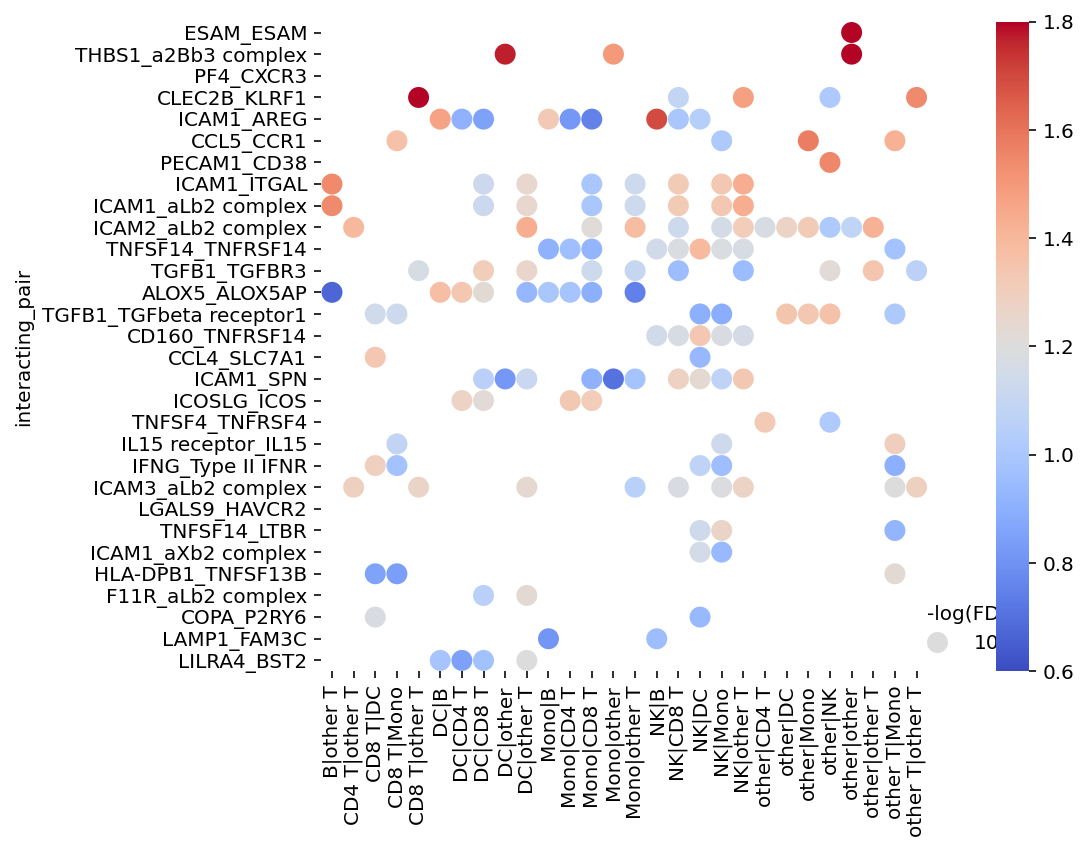

In [42]:
plt.figure(figsize=(10,6))
ax = scattermap(ratio, cmap='coolwarm', vmin=0.6, vmax=1.8, factor=1.1, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

# Ratio between proband and controls (L2)

In [248]:
proband = pd.read_csv(DESKTOP + "Proband_significant_means_L2.txt", sep="\t")
proband = proband.set_index("interacting_pair")
print(proband.shape)

controls = pd.read_csv(DESKTOP + "Controls_significant_means_L2.txt", sep="\t")
controls = controls.set_index("interacting_pair")
print(controls.shape)

(798, 484)
(842, 484)


In [249]:
# Order controls as in proband
proband_order = proband[[]].copy()
controls_ordered = proband_order.merge(controls, how="left", left_index=True, right_index=True)

In [250]:
# Use only same columns
column_order = proband.columns
controls_ordered = controls_ordered[column_order]
controls_ordered

B intermediate|B intermediate  \
interacting_pair                                          
EPHB1_EFNB1                                         NaN   
SELP_CD34                                           NaN   
PROS1_AXL                                           NaN   
PVR_NECTIN3                                         NaN   
FFAR2_CCL4L2                                        NaN   
...                                                 ...   
ACVR_1C2A receptor_INHBB                            NaN   
ACVR_1C2B receptor_INHBB                            NaN   
BMPR1A_BMPR2_BMP2                                   NaN   
ACVR_1C2A receptor_INHBA                            NaN   
NRTN_RET receptor 2                                 NaN   

                          B intermediate|B memory  B intermediate|B naive  \
interacting_pair                                                            
EPHB1_EFNB1                                   NaN                     NaN   
SELP_CD34                                     NaN                     NaN   
PROS1_AXL                                     NaN                     NaN   
PVR_NECTIN3                                   NaN                     NaN   
FFAR2_CCL4L2                                  NaN                     NaN   
...                                           ...                     ...   
ACVR_1C2A receptor_INHBB                      NaN                     NaN   
ACVR_1C2B receptor_INHBB                      NaN                     NaN   
BMPR1A_BMPR2_BMP2                             NaN                     NaN   
ACVR_1C2A receptor_INHBA                      NaN                     NaN   
NRTN_RET receptor 2                           NaN                     NaN   

                          B intermediate|CD14 Mono  B intermediate|CD16 Mono  \
interacting_pair                                                               
EPHB1_EFNB1                                    NaN                       NaN   
SELP_CD34                                      NaN                       NaN   
PROS1_AXL                                      NaN                       NaN   
PVR_NECTIN3                                    NaN                       NaN   
FFAR2_CCL4L2                                   NaN                       NaN   
...                                            ...                       ...   
ACVR_1C2A receptor_INHBB                       NaN                       NaN   
ACVR_1C2B receptor_INHBB                       NaN                       NaN   
BMPR1A_BMPR2_BMP2                              NaN                       NaN   
ACVR_1C2A receptor_INHBA                       NaN                       NaN   
NRTN_RET receptor 2                            NaN                       NaN   

                          B intermediate|CD4 TCM  B intermediate|CD4 TEM  \
interacting_pair                                                           
EPHB1_EFNB1                                  NaN                     NaN   
SELP_CD34                                    NaN                     NaN   
PROS1_AXL                                    NaN                     NaN   
PVR_NECTIN3                                  NaN                     NaN   
FFAR2_CCL4L2                                 NaN                     NaN   
...                                          ...                     ...   
ACVR_1C2A receptor_INHBB                     NaN                     NaN   
ACVR_1C2B receptor_INHBB                     NaN                     NaN   
BMPR1A_BMPR2_BMP2                            NaN                     NaN   
ACVR_1C2A receptor_INHBA                     NaN                     NaN   
NRTN_RET receptor 2                          NaN                     NaN   

                          B intermediate|CD8 Naive  B intermediate|CD8 TCM  \
interacting_pair                                                             
EPHB1_EFNB1                                    NaN                    

In [251]:
ratios_L2 = proband / controls_ordered
ratios_L2.head(3)

B intermediate|B intermediate  B intermediate|B memory  \
interacting_pair                                                           
EPHB1_EFNB1                                 NaN                      NaN   
SELP_CD34                                   NaN                      NaN   
PROS1_AXL                                   NaN                      NaN   

                  B intermediate|B naive  B intermediate|CD14 Mono  \
interacting_pair                                                     
EPHB1_EFNB1                          NaN                       NaN   
SELP_CD34                            NaN                       NaN   
PROS1_AXL                            NaN                       NaN   

                  B intermediate|CD16 Mono  B intermediate|CD4 TCM  \
interacting_pair                                                     
EPHB1_EFNB1                            NaN                     NaN   
SELP_CD34                              NaN                     NaN   
PROS1_AXL                              NaN                     NaN   

                  B intermediate|CD4 TEM  B intermediate|CD8 Naive  \
interacting_pair                                                     
EPHB1_EFNB1                          NaN                       NaN   
SELP_CD34                            NaN                       NaN   
PROS1_AXL                            NaN                       NaN   

                  B intermediate|CD8 TCM  B intermediate|CD8 TEM  ...  \
interacting_pair                                                  ...   
EPHB1_EFNB1                          NaN                     NaN  ...   
SELP_CD34                            NaN                     NaN  ...   
PROS1_AXL                            NaN                     NaN  ...   

                  pDC|MAIT  pDC|NK  pDC|NK Proliferating  pDC|NK_CD56bright  \
interacting_pair                                                              
EPHB1_EFNB1            NaN     NaN                   NaN                NaN   
SELP_CD34              NaN     NaN                   NaN                NaN   
PROS1_AXL              NaN     NaN                   NaN                NaN   

                  pDC|Platelet  pDC|Treg  pDC|cDC2  pDC|dnT  pDC|gdT  pDC|pDC  
interacting_pair                                                               
EPHB1_EFNB1                NaN       NaN  1.583333      NaN      NaN      NaN  
SELP_CD34                  NaN       NaN       NaN      NaN      NaN      NaN  
PROS1_AXL                  NaN       NaN       NaN      NaN      NaN      NaN  

[3 rows x 484 columns]

In [252]:
ratios_L2.to_csv(DESKTOP + "ratio_L2.tsv", sep="\t")

In [253]:
# Order by MAX values
ratio_L2_ordered = ratios_L2.copy()
ratio_L2_ordered = order_ratios(ratio_L2_ordered)
ratio_L2_ordered.to_csv(DESKTOP + "ratio_L2_ordered.tsv", sep="\t")

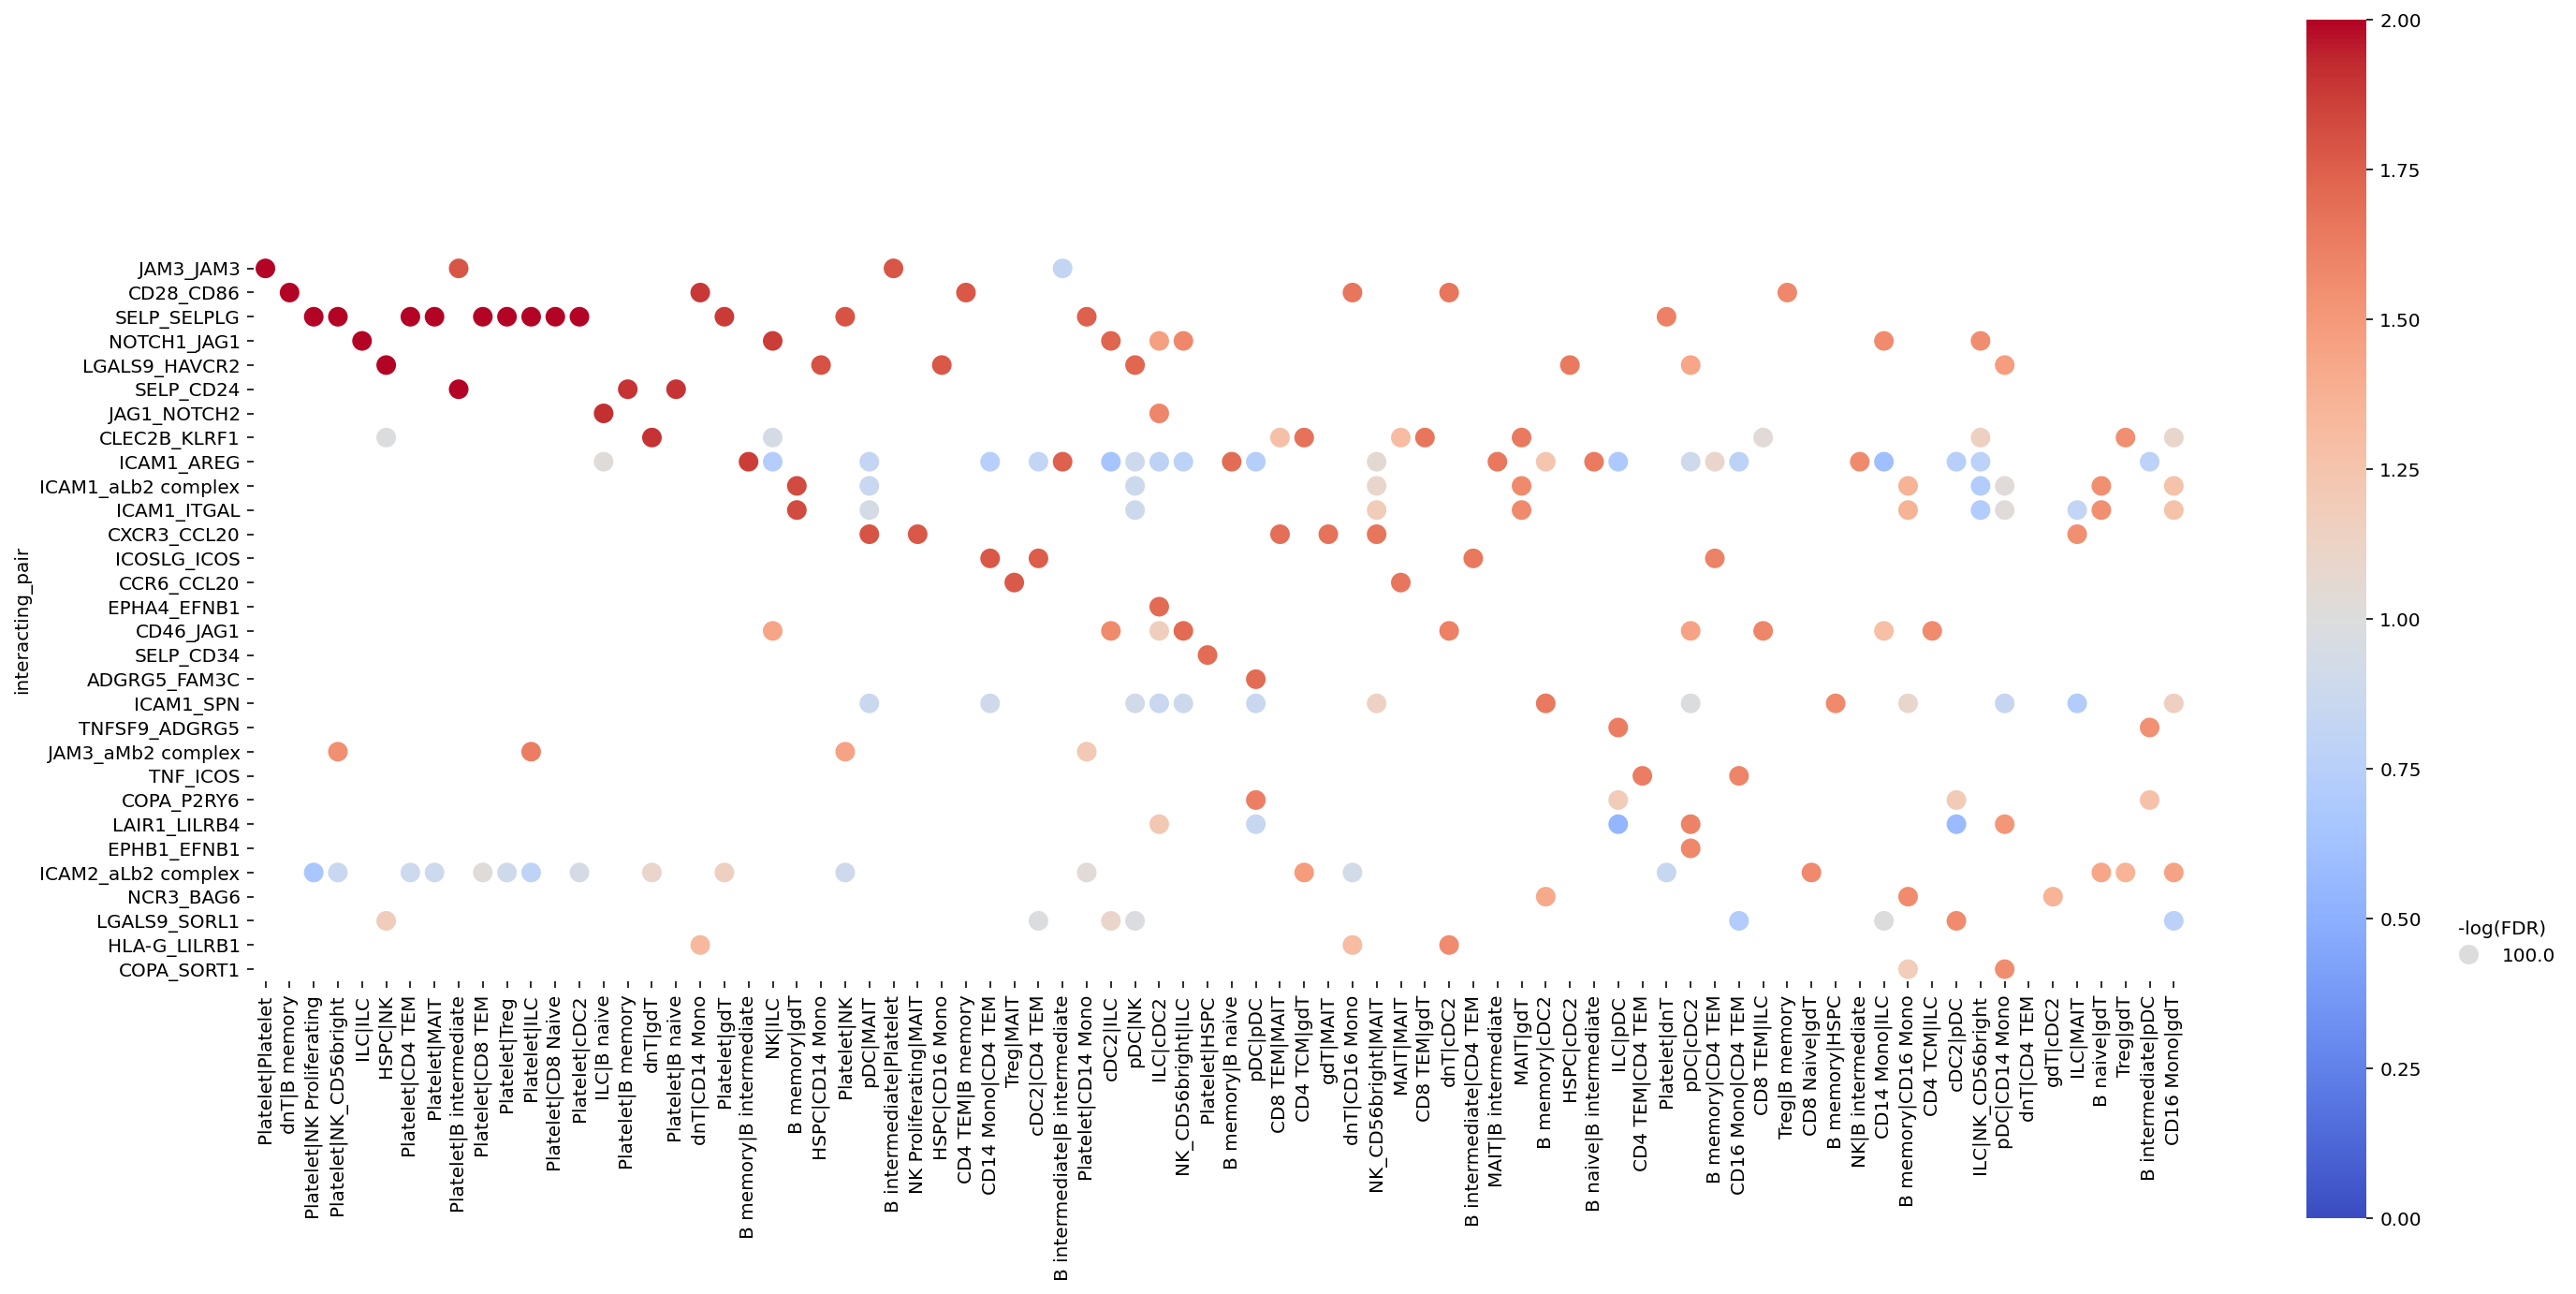

In [254]:
plt.figure(figsize=(20,10))
ax = scattermap(ratio_L2_ordered.iloc[:30,:80], cmap='coolwarm', vmin=0, vmax=2, factor=1.1, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [ ]:
# Select specific interactions
i = ["JAM3_JAM3", "CD28_CD86", "SELP_SELPLG", "NOTCH1_JAG1", "LGALS9_HAVCR2", "SELP_CD24", "JAG1_NOTCH2",
     "CLEC2B_KLRF1", "ICAM1_AREG", "ICAM1_alb2 complex", "ICAM1_ITGAL", "CXCR3_CCL20", "ICOSLG_ICOS",
     "CCR6_CCL20", "CD46_JAG1", "EPHA4_EFNB1", "SELP_CD34", "ADGRG5_FAM3C", "ICAM1_SPN", "TNFSF9_ADGRG5",
     "JAM3_aMb2 complex", "TNF_ICOS", "COPA_P2RY6", "LAIR1_LILRB4", "EPHB1_EFNB1", "ICAM_aLb2 complex",
     "NCR3_BAG6"
]

i_platelet = ["JAM3_JAM3", "SELP_SELPLG", "SELP_CD24", "SELP_CD34", ]
i_ILC_HSPC = ["NOTCH1_JAG1", "LGALS9_HAVCR2", "JAG1_NOTCH2", "CD46_JAG1", "EPHA4_EFNB1", "TNFSF9_ADGRG5",]
i_Tcells = ["CLEC2B_KLRF1", "CD28_CD86", "CXCR3_CCL20", "ICOSLG_ICOS", "CCR6_CCL20", ]
i_Bcells = ["ICAM1_AREG", "ICAM1_SPN", ]


### Select specific cell types

In [255]:
platelet_columns = [x for x in ratios_L2 if x.startswith("Plate")]
NK_gdT_columns = [x for x in ratios_L2 if (x.startswith("NK") or x.startswith("gdT"))]
dnT_columns = [x for x in ratios_L2 if (x.startswith("dnT") or x.startswith("Treg"))]
CD4_CD8_columns = [x for x in ratios_L2 if (x.startswith("CD4") or x.startswith("CD8"))]
ILC_HSPC_columns = [x for x in ratios_L2 if (x.startswith("ILC") or x.startswith("HSPC"))]
B_columns = [x for x in ratios_L2 if x.startswith("B")]
dendritic_columns = [x for x in ratios_L2 if (x.startswith("pDC") or x.startswith("cDC2") or x.startswith("CD14") or x.startswith("CD16"))]

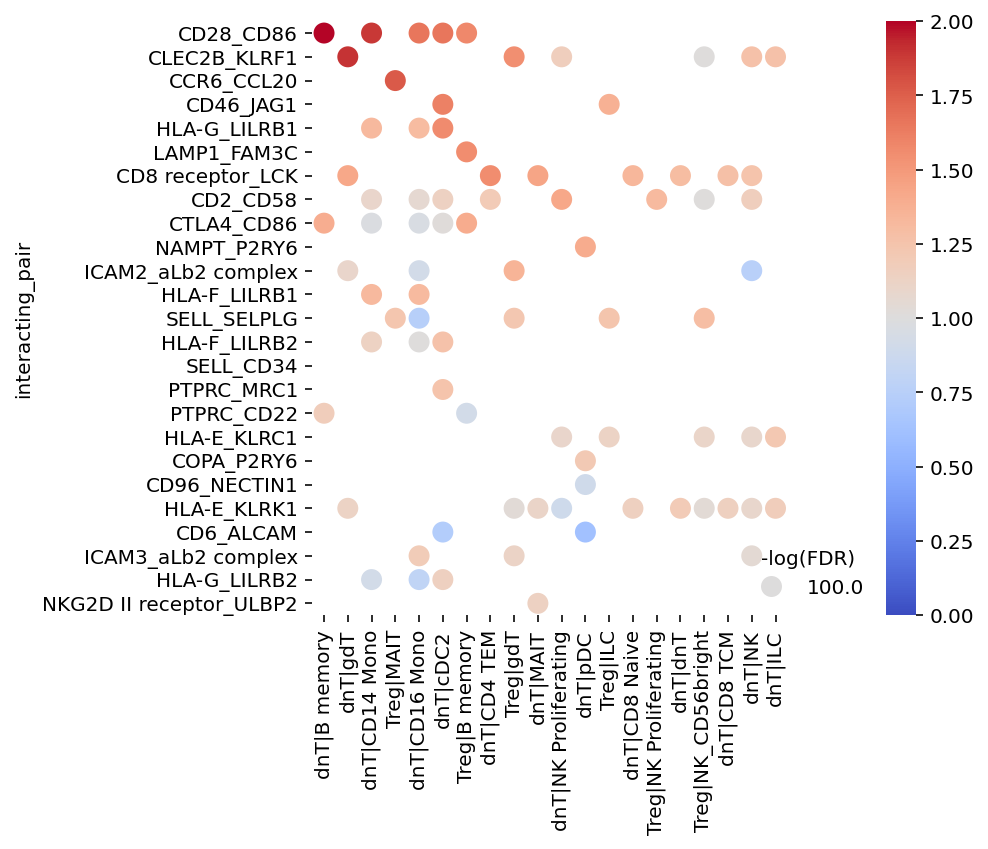

In [269]:
celltype = ratio_L2[dnT_columns]
celltype = order_ratios(celltype)

plt.figure(figsize=(14,6))
ax = scattermap(celltype.iloc[:25,:20], cmap='coolwarm', vmin=0, vmax=2, factor=1.1, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png", dpi=300)

## Ratio between proband and controls (L3)

In [44]:
proband = pd.read_csv(DESKTOP + "Proband_significant_means_L3.txt", sep="\t")
proband = proband.set_index("interacting_pair")
print(proband.shape)
proband.head(3)

(800, 2116)


B intermediate kappa|B intermediate kappa  \
interacting_pair                                                  
COL27A1_a1b1 complex                                        NaN   
CD40LG_a2Bb3 complex                                        NaN   
EPHA2_EFNA4                                                 NaN   

                      B intermediate kappa|B intermediate lambda  \
interacting_pair                                                   
COL27A1_a1b1 complex                                         NaN   
CD40LG_a2Bb3 complex                                         NaN   
EPHA2_EFNA4                                                  NaN   

                      B intermediate kappa|B memory kappa  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|B memory lambda  \
interacting_pair                                             
COL27A1_a1b1 complex                                   NaN   
CD40LG_a2Bb3 complex                                   NaN   
EPHA2_EFNA4                                            NaN   

                      B intermediate kappa|B naive kappa  \
interacting_pair                                           
COL27A1_a1b1 complex                                 NaN   
CD40LG_a2Bb3 complex                                 NaN   
EPHA2_EFNA4                                          NaN   

                      B intermediate kappa|B naive lambda  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|CD14 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD16 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Naive  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                              ...   
COL27A1_a1b1 complex                                     NaN  ...   
CD40LG_a2Bb3 complex                                     NaN  ...   
EPHA2_EFNA4                                              NaN  ...   

                      pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                          
COL27A1_a1b1 complex              NaN       NaN         NaN         NaN   
CD40LG_a2Bb3 complex              NaN       NaN         NaN         NaN   
EPHA2_EFNA4                       NaN       NaN         NaN         NaN   

                      pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                              
COL27A1_a1b1 complex        NaN        NaN        NaN        NaN        NaN   
CD40LG_a2Bb3 complex        NaN        NaN        NaN        NaN        NaN   
EPHA2_EFNA4                 NaN        NaN        NaN        NaN        NaN   

                      pDC|pDC  
interacting_pair               
COL27A1_a1b1 complex      NaN  
CD40LG_a2Bb3 complex      NaN  
EPHA2_EFNA4               NaN  


In [45]:
controls = pd.read_csv(DESKTOP + "Controls_significant_means_L3.txt", sep="\t")
controls = controls.set_index("interacting_pair")
print(controls.shape)
controls.head(3)

(847, 2256)


B intermediate kappa|ASDC_mDC  \
interacting_pair                                  
AXL_IL15RA                                  NaN   
C3_C3AR1                                    NaN   
TBXA2R_GHRL                                 NaN   

                  B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
AXL_IL15RA                                              NaN   
C3_C3AR1                                                NaN   
TBXA2R_GHRL                                             NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
AXL_IL15RA                                               NaN   
C3_C3AR1                                                 NaN   
TBXA2R_GHRL                                              NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
AXL_IL15RA                                        NaN   
C3_C3AR1                                          NaN   
TBXA2R_GHRL                                       NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
AXL_IL15RA                                         NaN   
C3_C3AR1                                           NaN   
TBXA2R_GHRL                                        NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
AXL_IL15RA                                       NaN   
C3_C3AR1                                         NaN   
TBXA2R_GHRL                                      NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
AXL_IL15RA                                        NaN   
C3_C3AR1                                          NaN   
TBXA2R_GHRL                                       NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
AXL_IL15RA                                   NaN   
C3_C3AR1                                     NaN   
TBXA2R_GHRL                                  NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
AXL_IL15RA                                   NaN   
C3_C3AR1                                     NaN   
TBXA2R_GHRL                                  NaN   

                  B intermediate kappa|CD4 Naive  ...  pDC|Treg Memory  \
interacting_pair                                  ...                    
AXL_IL15RA                                   NaN  ...              NaN   
C3_C3AR1                                     NaN  ...              NaN   
TBXA2R_GHRL                                  NaN  ...              NaN   

                  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  \
interacting_pair                                                           
AXL_IL15RA             NaN         NaN         NaN        NaN        NaN   
C3_C3AR1               NaN         NaN         NaN        NaN        NaN   
TBXA2R_GHRL            NaN         NaN         NaN        NaN        NaN   

                  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                            
AXL_IL15RA              NaN        NaN        NaN      NaN  
C3_C3AR1                NaN        NaN        NaN      NaN  
TBXA2R_GHRL             NaN        NaN        NaN      NaN  

[3 rows x 2256 columns]

In [ ]:
# Order controls as in proband

In [46]:
proband_order = proband[[]].copy()

In [47]:
controls_ordered = proband_order.merge(controls, how="left", left_index=True, right_index=True)

In [48]:
controls_ordered

B intermediate kappa|ASDC_mDC  \
interacting_pair                                      
COL27A1_a1b1 complex                            NaN   
CD40LG_a2Bb3 complex                            NaN   
EPHA2_EFNA4                                     NaN   
EPHB6_EFNB1                                     NaN   
EPHB6_EFNB2                                     NaN   
...                                             ...   
COL9A3_a2b1 complex                             NaN   
IL21 receptor_IL21                              NaN   
IL23_IL23 receptor                              NaN   
NOTCH4_JAG2                                     NaN   
NRTN_RET receptor 2                             NaN   

                      B intermediate kappa|B intermediate kappa  \
interacting_pair                                                  
COL27A1_a1b1 complex                                        NaN   
CD40LG_a2Bb3 complex                                        NaN   
EPHA2_EFNA4                                                 NaN   
EPHB6_EFNB1                                                 NaN   
EPHB6_EFNB2                                                 NaN   
...                                                         ...   
COL9A3_a2b1 complex                                         NaN   
IL21 receptor_IL21                                          NaN   
IL23_IL23 receptor                                          NaN   
NOTCH4_JAG2                                                 NaN   
NRTN_RET receptor 2                                         NaN   

                      B intermediate kappa|B intermediate lambda  \
interacting_pair                                                   
COL27A1_a1b1 complex                                         NaN   
CD40LG_a2Bb3 complex                                         NaN   
EPHA2_EFNA4                                                  NaN   
EPHB6_EFNB1                                                  NaN   
EPHB6_EFNB2                                                  NaN   
...                                                          ...   
COL9A3_a2b1 complex                                          NaN   
IL21 receptor_IL21                                           NaN   
IL23_IL23 receptor                                           NaN   
NOTCH4_JAG2                                                  NaN   
NRTN_RET receptor 2                                          NaN   

                      B intermediate kappa|B memory kappa  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   
EPHB6_EFNB1                                           NaN   
EPHB6_EFNB2                                           NaN   
...                                                   ...   
COL9A3_a2b1 complex                                   NaN   
IL21 receptor_IL21                                    NaN   
IL23_IL23 receptor                                    NaN   
NOTCH4_JAG2                                           NaN   
NRTN_RET receptor 2                                   NaN   

                      B intermediate kappa|B memory lambda  \
interacting_pair                                             
COL27A1_a1b1 complex                                   NaN   
CD40LG_a2Bb3 complex                                   NaN   
EPHA2_EFNA4                                            NaN   
EPHB6_EFNB1                                            NaN   
EPHB6_EFNB2                                            NaN   
...                                                    ...   
COL9A3_a2b1 complex                                    NaN   
IL21 receptor_IL21                                     NaN   
IL23_IL23 receptor                                     NaN   
NOTCH4_JAG2                                            NaN   
NRTN_RET re

In [51]:
# Use only same columns
column_order = proband.columns
controls_ordered = controls_ordered[column_order]
controls_ordered

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                  
COL27A1_a1b1 complex                                        NaN   
CD40LG_a2Bb3 complex                                        NaN   
EPHA2_EFNA4                                                 NaN   
EPHB6_EFNB1                                                 NaN   
EPHB6_EFNB2                                                 NaN   
...                                                         ...   
COL9A3_a2b1 complex                                         NaN   
IL21 receptor_IL21                                          NaN   
IL23_IL23 receptor                                          NaN   
NOTCH4_JAG2                                                 NaN   
NRTN_RET receptor 2                                         NaN   

                      B intermediate kappa|B intermediate lambda  \
interacting_pair                                                   
COL27A1_a1b1 complex                                         NaN   
CD40LG_a2Bb3 complex                                         NaN   
EPHA2_EFNA4                                                  NaN   
EPHB6_EFNB1                                                  NaN   
EPHB6_EFNB2                                                  NaN   
...                                                          ...   
COL9A3_a2b1 complex                                          NaN   
IL21 receptor_IL21                                           NaN   
IL23_IL23 receptor                                           NaN   
NOTCH4_JAG2                                                  NaN   
NRTN_RET receptor 2                                          NaN   

                      B intermediate kappa|B memory kappa  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   
EPHB6_EFNB1                                           NaN   
EPHB6_EFNB2                                           NaN   
...                                                   ...   
COL9A3_a2b1 complex                                   NaN   
IL21 receptor_IL21                                    NaN   
IL23_IL23 receptor                                    NaN   
NOTCH4_JAG2                                           NaN   
NRTN_RET receptor 2                                   NaN   

                      B intermediate kappa|B memory lambda  \
interacting_pair                                             
COL27A1_a1b1 complex                                   NaN   
CD40LG_a2Bb3 complex                                   NaN   
EPHA2_EFNA4                                            NaN   
EPHB6_EFNB1                                            NaN   
EPHB6_EFNB2                                            NaN   
...                                                    ...   
COL9A3_a2b1 complex                                    NaN   
IL21 receptor_IL21                                     NaN   
IL23_IL23 receptor                                     NaN   
NOTCH4_JAG2                                            NaN   
NRTN_RET receptor 2                                    NaN   

                      B intermediate kappa|B naive kappa  \
interacting_pair                                           
COL27A1_a1b1 complex                                 NaN   
CD40LG_a2Bb3 complex                                 NaN   
EPHA2_EFNA4                                          NaN   
EPHB6_EFNB1                                          NaN   
EPHB6_EFNB2                                          NaN   
...                                                  ...   
COL9A3_a2b1 complex                                  NaN   
IL21 receptor_IL21                                   NaN   
IL23_IL23 receptor                                   NaN   
NOTC

In [52]:
ratio = proband / controls_ordered
ratio.head(3)

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                  
COL27A1_a1b1 complex                                        NaN   
CD40LG_a2Bb3 complex                                        NaN   
EPHA2_EFNA4                                                 NaN   

                      B intermediate kappa|B intermediate lambda  \
interacting_pair                                                   
COL27A1_a1b1 complex                                         NaN   
CD40LG_a2Bb3 complex                                         NaN   
EPHA2_EFNA4                                                  NaN   

                      B intermediate kappa|B memory kappa  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|B memory lambda  \
interacting_pair                                             
COL27A1_a1b1 complex                                   NaN   
CD40LG_a2Bb3 complex                                   NaN   
EPHA2_EFNA4                                            NaN   

                      B intermediate kappa|B naive kappa  \
interacting_pair                                           
COL27A1_a1b1 complex                                 NaN   
CD40LG_a2Bb3 complex                                 NaN   
EPHA2_EFNA4                                          NaN   

                      B intermediate kappa|B naive lambda  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|CD14 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD16 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Naive  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                              ...   
COL27A1_a1b1 complex                                     NaN  ...   
CD40LG_a2Bb3 complex                                     NaN  ...   
EPHA2_EFNA4                                              NaN  ...   

                      pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                          
COL27A1_a1b1 complex              NaN       NaN         NaN         NaN   
CD40LG_a2Bb3 complex              NaN       NaN         NaN         NaN   
EPHA2_EFNA4                       NaN       NaN         NaN         NaN   

                      pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                              
COL27A1_a1b1 complex        NaN        NaN        NaN        NaN        NaN   
CD40LG_a2Bb3 complex        NaN        NaN        NaN        NaN        NaN   
EPHA2_EFNA4                 NaN        NaN        NaN        NaN        NaN   

                      pDC|pDC  
interacting_pair               
COL27A1_a1b1 complex      NaN  
CD40LG_a2Bb3 complex      NaN  
EPHA2_EFNA4               NaN  


In [53]:
ratio.to_csv(DESKTOP + "ratio_L3.tsv", sep="\t")

In [66]:
# Import data ordered by MAX value
ratio = pd.read_csv(DESKTOP + "ratio_L3_clean_1.3.tsv", sep="\t")
ratio = ratio.set_index("interacting_pair")
ratio = ratio.drop("MAX", axis=1)
print(ratio.shape)
ratio.head(3)

(132, 847)


CD8 TEM_3|ILC  HSPC|CD8 Proliferating  pDC|CD8 TEM_3  \
interacting_pair                                                         
NOTCH1_JAG1               3.045                     NaN            NaN   
LGALS9_COLEC12              NaN                     3.0            NaN   
PDGFB_LRP1                  NaN                     NaN       2.983871   

                  CD8 TEM_3|dnT_2  CD8 TEM_3|CD4 TEM_1  CD8 Naive|Platelet  \
interacting_pair                                                             
NOTCH1_JAG1                   NaN                  NaN                 NaN   
LGALS9_COLEC12                NaN                  NaN                 NaN   
PDGFB_LRP1                    NaN                  NaN                 NaN   

                  Platelet|CD8 Naive  CD8 TEM_3|CD4 TCM_3  \
interacting_pair                                            
NOTCH1_JAG1                      NaN                  NaN   
LGALS9_COLEC12                   NaN                  NaN   
PDGFB_LRP1                       NaN                  NaN   

                  CD8 Proliferating|cDC1  CD8 TEM_3|Treg Memory  ...  \
interacting_pair                                                 ...   
NOTCH1_JAG1                          NaN                    NaN  ...   
LGALS9_COLEC12                       NaN                    NaN  ...   
PDGFB_LRP1                           NaN                    NaN  ...   

                  dnT_2|NK_CD56bright  NK_4|cDC1  ILC|B naive lambda  \
interacting_pair                                                       
NOTCH1_JAG1                       NaN        NaN                 NaN   
LGALS9_COLEC12                    NaN        NaN                 NaN   
PDGFB_LRP1                        NaN        NaN                 NaN   

                  ILC|gdT_2  CD8 TEM_2|CD8 TEM_6  CD8 Naive_2|CD14 Mono  \
interacting_pair                                                          
NOTCH1_JAG1             NaN                  NaN                    NaN   
LGALS9_COLEC12          NaN                  NaN                    NaN   
PDGFB_LRP1              NaN                  NaN                    NaN   

                  CD8 Naive_2|Plasma  ILC|gdT_1  B memory lambda|HSPC  \
interacting_pair                                                        
NOTCH1_JAG1                      NaN        NaN                   NaN   
LGALS9_COLEC12                   NaN        NaN                   NaN   
PDGFB_LRP1                       NaN        NaN                   NaN   

                  CD14 Mono|cDC1  
interacting_pair                  
NOTCH1_JAG1                  NaN  
LGALS9_COLEC12               NaN  
PDGFB_LRP1                   NaN  

[3 rows x 847 columns]

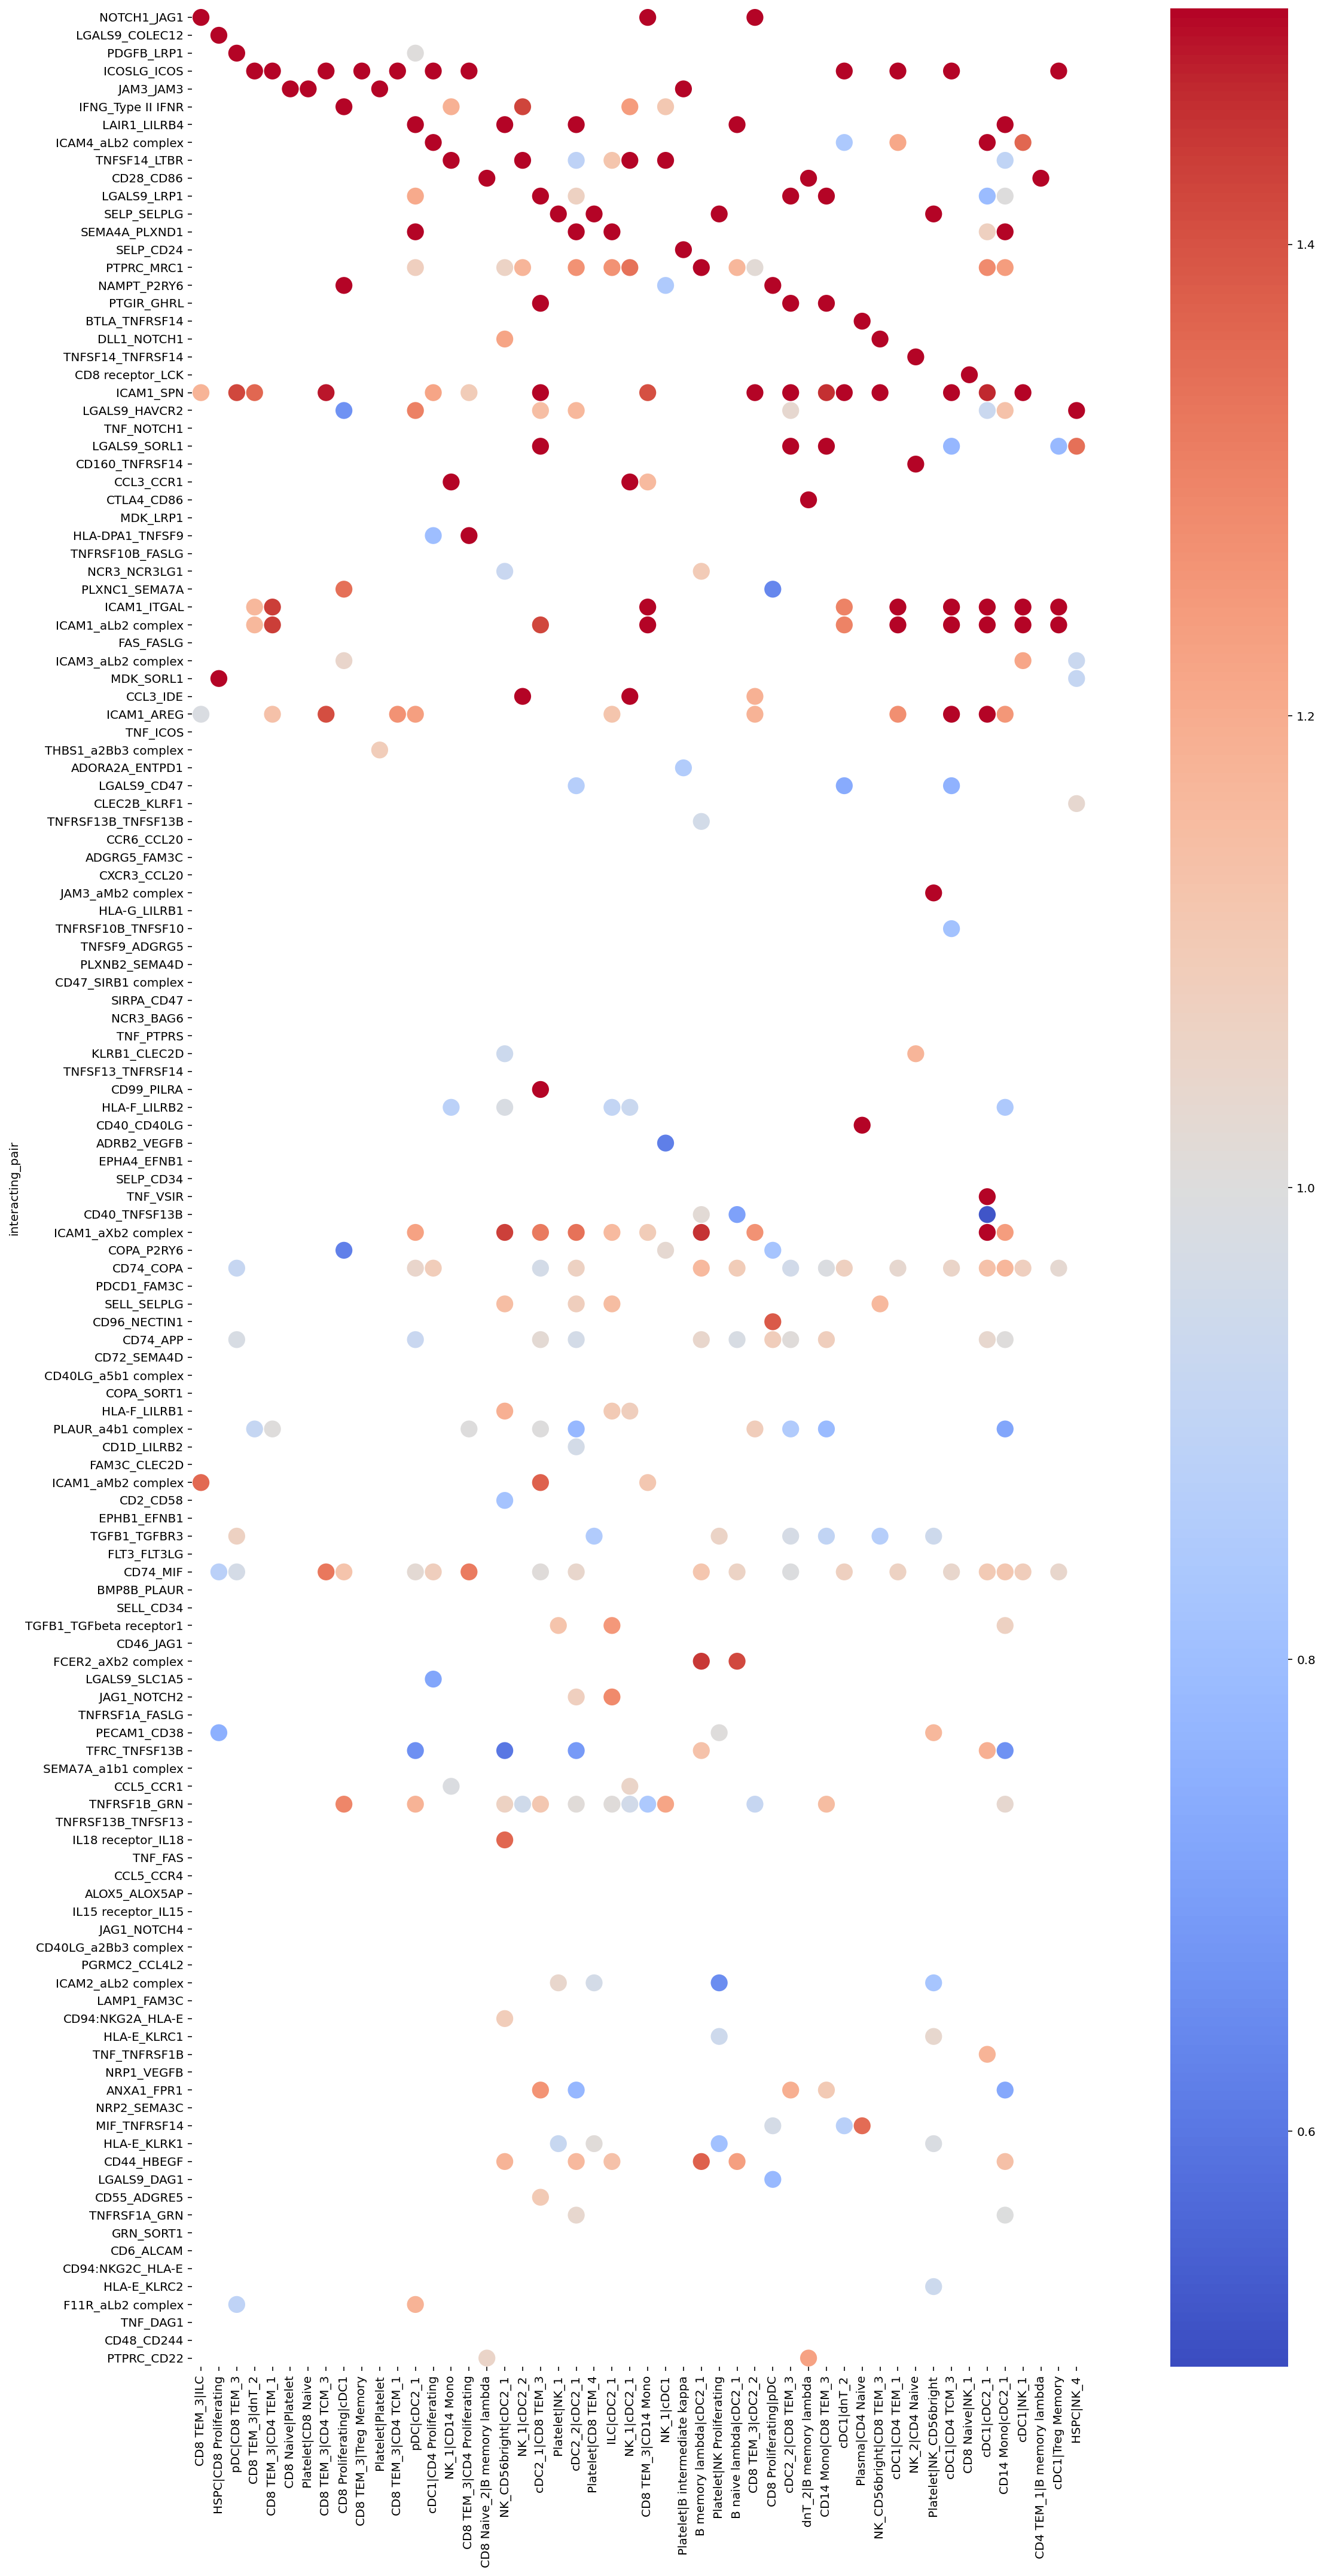

In [68]:
plt.figure(figsize=(20,30))
ax = scattermap(ratio.iloc[:,:50], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [82]:
## Filter specific interactions
# Import data ordered by MAX value
ratio = pd.read_csv(DESKTOP + "ratio_L3.tsv", sep="\t")
ratio = ratio.set_index("interacting_pair")
print(ratio.shape)
ratio.head(3)

(800, 2116)


B intermediate kappa|B intermediate kappa  \
interacting_pair                                                  
COL27A1_a1b1 complex                                        NaN   
CD40LG_a2Bb3 complex                                        NaN   
EPHA2_EFNA4                                                 NaN   

                      B intermediate kappa|B intermediate lambda  \
interacting_pair                                                   
COL27A1_a1b1 complex                                         NaN   
CD40LG_a2Bb3 complex                                         NaN   
EPHA2_EFNA4                                                  NaN   

                      B intermediate kappa|B memory kappa  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|B memory lambda  \
interacting_pair                                             
COL27A1_a1b1 complex                                   NaN   
CD40LG_a2Bb3 complex                                   NaN   
EPHA2_EFNA4                                            NaN   

                      B intermediate kappa|B naive kappa  \
interacting_pair                                           
COL27A1_a1b1 complex                                 NaN   
CD40LG_a2Bb3 complex                                 NaN   
EPHA2_EFNA4                                          NaN   

                      B intermediate kappa|B naive lambda  \
interacting_pair                                            
COL27A1_a1b1 complex                                  NaN   
CD40LG_a2Bb3 complex                                  NaN   
EPHA2_EFNA4                                           NaN   

                      B intermediate kappa|CD14 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD16 Mono  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Naive  \
interacting_pair                                       
COL27A1_a1b1 complex                             NaN   
CD40LG_a2Bb3 complex                             NaN   
EPHA2_EFNA4                                      NaN   

                      B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                              ...   
COL27A1_a1b1 complex                                     NaN  ...   
CD40LG_a2Bb3 complex                                     NaN  ...   
EPHA2_EFNA4                                              NaN  ...   

                      pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                          
COL27A1_a1b1 complex              NaN       NaN         NaN         NaN   
CD40LG_a2Bb3 complex              NaN       NaN         NaN         NaN   
EPHA2_EFNA4                       NaN       NaN         NaN         NaN   

                      pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                              
COL27A1_a1b1 complex        NaN        NaN        NaN        NaN        NaN   
CD40LG_a2Bb3 complex        NaN        NaN        NaN        NaN        NaN   
EPHA2_EFNA4                 NaN        NaN        NaN        NaN        NaN   

                      pDC|pDC  
interacting_pair               
COL27A1_a1b1 complex      NaN  
CD40LG_a2Bb3 complex      NaN  
EPHA2_EFNA4               NaN  


In [83]:
ratio_CCL5 = ratio[ratio.index.str.startswith("CCL5")]
ratio_CCL5_sorted = ratio_CCL5.sort_values(["CCL5_CCR1", "CCL5_CCR4"], ascending=False, axis=1)
ratio_CCL5_sorted

CD8 Proliferating|cDC2_1  CD8 Proliferating|CD16 Mono  \
interacting_pair                                                          
CCL5_CCR5                              NaN                          NaN   
CCL5_CCR4                              NaN                          NaN   
CCL5_CCR1                              1.5                     1.414557   
CCL5_ACKR4                             NaN                          NaN   
CCL5_CCR3                              NaN                          NaN   

                  CD8 Proliferating|CD14 Mono  gdT_4|cDC2_1  gdT_2|cDC2_1  \
interacting_pair                                                            
CCL5_CCR5                                 NaN           NaN           NaN   
CCL5_CCR4                                 NaN           NaN           NaN   
CCL5_CCR1                            1.357042      1.308344      1.273458   
CCL5_ACKR4                                NaN           NaN           NaN   
CCL5_CCR3                                 NaN           NaN           NaN   

                  gdT_4|CD16 Mono  gdT_4|CD14 Mono  CD8 TEM_5|cDC2_1  \
interacting_pair                                                       
CCL5_CCR5                     NaN              NaN               NaN   
CCL5_CCR4                     NaN              NaN               NaN   
CCL5_CCR1                1.242812         1.211628          1.208559   
CCL5_ACKR4                    NaN              NaN               NaN   
CCL5_CCR3                     NaN              NaN               NaN   

                  gdT_2|CD16 Mono  CD4 TEM_3|cDC2_1  ...  pDC|Treg Memory  \
interacting_pair                                     ...                    
CCL5_CCR5                     NaN               NaN  ...              NaN   
CCL5_CCR4                     NaN               NaN  ...              NaN   
CCL5_CCR1                1.206965          1.205563  ...              NaN   
CCL5_ACKR4                    NaN               NaN  ...              NaN   
CCL5_CCR3                     NaN               NaN  ...              NaN   

                  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  \
interacting_pair                                                           
CCL5_CCR5              NaN         NaN         NaN        NaN        NaN   
CCL5_CCR4              NaN         NaN         NaN        NaN        NaN   
CCL5_CCR1              NaN         NaN         NaN        NaN        NaN   
CCL5_ACKR4             NaN         NaN         NaN        NaN        NaN   
CCL5_CCR3              NaN         NaN         NaN        NaN        NaN   

                  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                            
CCL5_CCR5               NaN        NaN        NaN      NaN  
CCL5_CCR4               NaN        NaN        NaN      NaN  
CCL5_CCR1               NaN        NaN        NaN      NaN  
CCL5_ACKR4              NaN        NaN        NaN      NaN  
CCL5_CCR3               NaN        NaN        NaN      NaN  

[5 rows x 2116 columns]

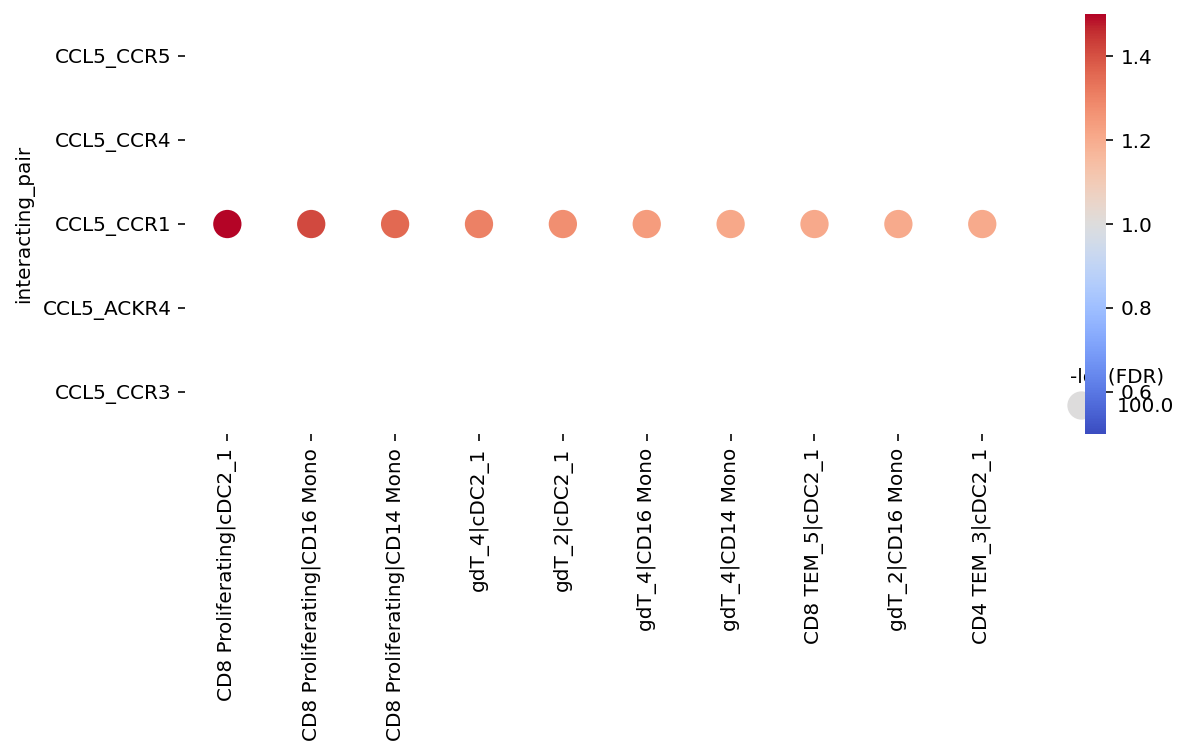

In [84]:
plt.figure(figsize=(10,5))
ax = scattermap(ratio_CCL5_sorted.iloc[:,:10], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [85]:
ratio_PF4 = ratio[ratio.index.str.startswith("PF4")]
ratio_PF4

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
PF4_CXCR3                                               NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
PF4_CXCR3                                                NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
PF4_CXCR3                                         NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
PF4_CXCR3                                          NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
PF4_CXCR3                                        NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
PF4_CXCR3                                         NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
PF4_CXCR3                                    NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
PF4_CXCR3                                    NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
PF4_CXCR3                                    NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
PF4_CXCR3                                            NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
PF4_CXCR3                     NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
PF4_CXCR3               NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
PF4_CXCR3             NaN  

[1 rows x 2116 columns]

In [86]:
ratio_PF4_sorted = ratio_PF4.sort_values(["PF4_CXCR3"], ascending=False, axis=1)
ratio_PF4_sorted

Platelet|gdT_3  Platelet|CD4 TEM_3  \
interacting_pair                                       
PF4_CXCR3               1.102853            1.095874   

                  Platelet|CD8 Proliferating  Platelet|gdT_1  Platelet|pDC  \
interacting_pair                                                             
PF4_CXCR3                           1.092302        1.083564      1.081457   

                  Platelet|NK Proliferating  Platelet|CD4 TCM_3  \
interacting_pair                                                  
PF4_CXCR3                          1.080262            1.071603   

                  Platelet|NK_CD56bright  Platelet|NK_4  Platelet|CD8 TEM_1  \
interacting_pair                                                              
PF4_CXCR3                       1.070528       1.069587            1.067311   

                  ...  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair  ...                                                      
PF4_CXCR3         ...              NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
PF4_CXCR3               NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
PF4_CXCR3             NaN  

[1 rows x 2116 columns]

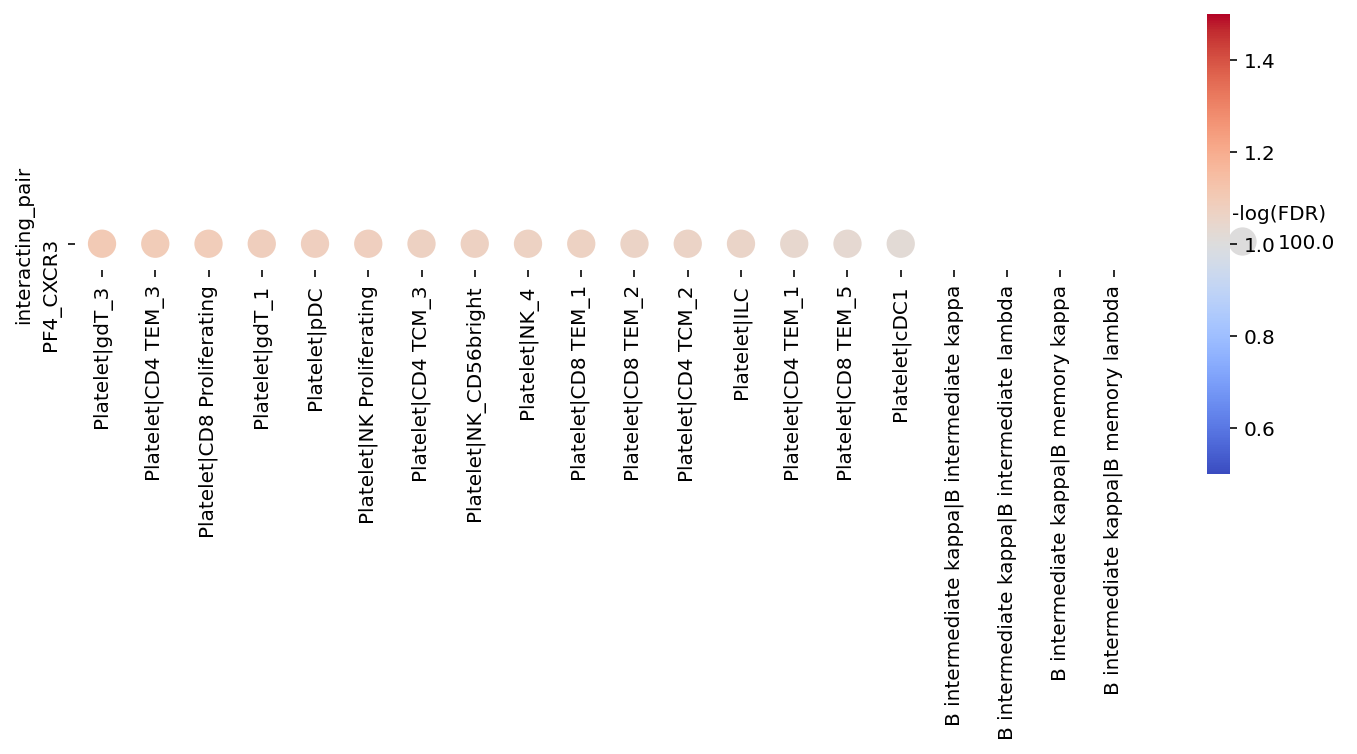

In [88]:
plt.figure(figsize=(10,5))
ax = scattermap(ratio_PF4_sorted.iloc[:,:20], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [89]:
ratio_ESAM = ratio[ratio.index.str.startswith("ESAM")]
ratio_ESAM

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
ESAM_ESAM                                               NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
ESAM_ESAM                                                NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
ESAM_ESAM                                         NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
ESAM_ESAM                                          NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
ESAM_ESAM                                        NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
ESAM_ESAM                                         NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
ESAM_ESAM                                    NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
ESAM_ESAM                                    NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
ESAM_ESAM                                    NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
ESAM_ESAM                                            NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
ESAM_ESAM                     NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
ESAM_ESAM               NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
ESAM_ESAM             NaN  

[1 rows x 2116 columns]

In [91]:
ratio_ESAM_sorted = ratio_ESAM.sort_values(["ESAM_ESAM"], ascending=False, axis=1)
ratio_ESAM_sorted

Platelet|Platelet  \
interacting_pair                      
ESAM_ESAM                  1.134146   

                  B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
ESAM_ESAM                                               NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
ESAM_ESAM                                                NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
ESAM_ESAM                                         NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
ESAM_ESAM                                          NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
ESAM_ESAM                                        NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
ESAM_ESAM                                         NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
ESAM_ESAM                                    NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
ESAM_ESAM                                    NaN   

                  B intermediate kappa|CD4 Naive  ...  pDC|Treg Memory  \
interacting_pair                                  ...                    
ESAM_ESAM                                    NaN  ...              NaN   

                  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  \
interacting_pair                                                           
ESAM_ESAM              NaN         NaN         NaN        NaN        NaN   

                  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                            
ESAM_ESAM               NaN        NaN        NaN      NaN  

[1 rows x 2116 columns]

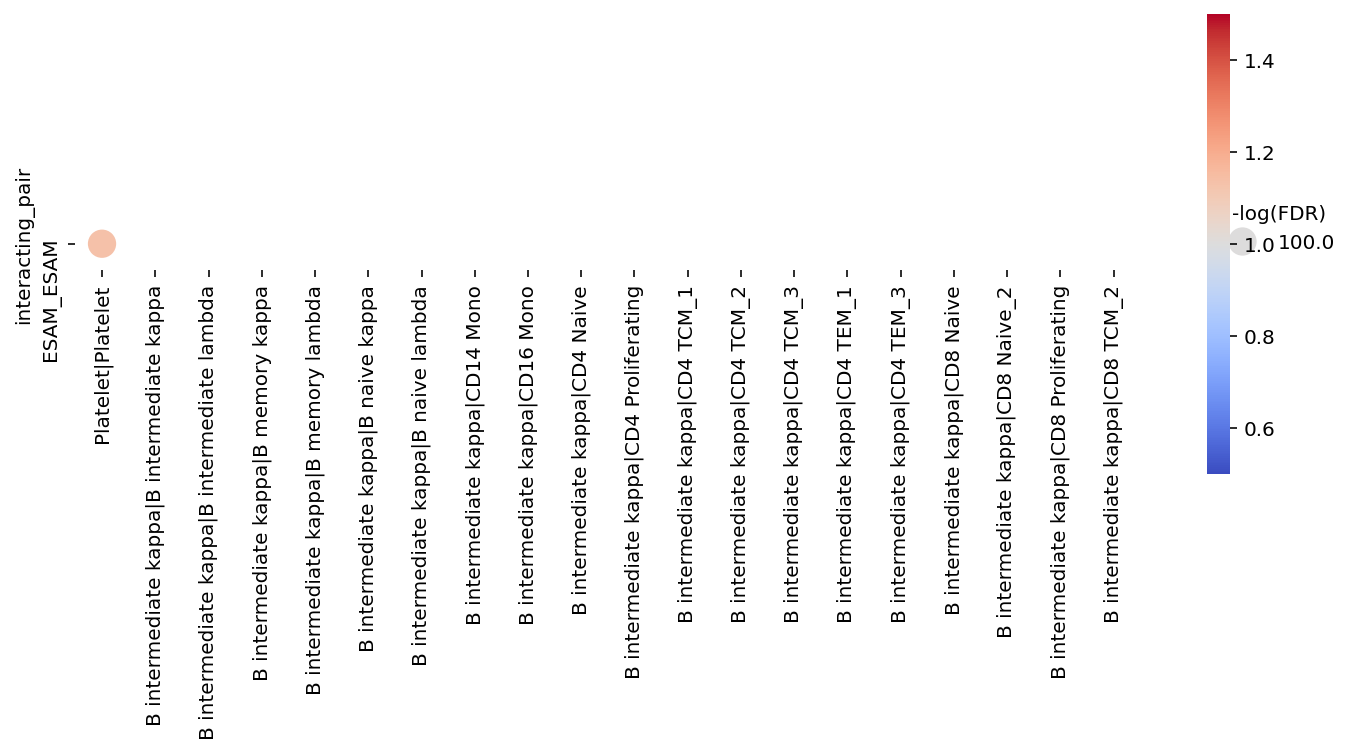

In [92]:
plt.figure(figsize=(10,5))
ax = scattermap(ratio_ESAM_sorted.iloc[:,:20], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [93]:
ratio_THBS1 = ratio[ratio.index.str.startswith("THBS1")]
ratio_THBS1

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                 
THBS1_a2Bb3 complex                                        NaN   
THBS1_a3b1 complex                                         NaN   
THBS1_aVb3 complex                                         NaN   

                     B intermediate kappa|B intermediate lambda  \
interacting_pair                                                  
THBS1_a2Bb3 complex                                         NaN   
THBS1_a3b1 complex                                          NaN   
THBS1_aVb3 complex                                          NaN   

                     B intermediate kappa|B memory kappa  \
interacting_pair                                           
THBS1_a2Bb3 complex                                  NaN   
THBS1_a3b1 complex                                   NaN   
THBS1_aVb3 complex                                   NaN   

                     B intermediate kappa|B memory lambda  \
interacting_pair                                            
THBS1_a2Bb3 complex                                   NaN   
THBS1_a3b1 complex                                    NaN   
THBS1_aVb3 complex                                    NaN   

                     B intermediate kappa|B naive kappa  \
interacting_pair                                          
THBS1_a2Bb3 complex                                 NaN   
THBS1_a3b1 complex                                  NaN   
THBS1_aVb3 complex                                  NaN   

                     B intermediate kappa|B naive lambda  \
interacting_pair                                           
THBS1_a2Bb3 complex                                  NaN   
THBS1_a3b1 complex                                   NaN   
THBS1_aVb3 complex                                   NaN   

                     B intermediate kappa|CD14 Mono  \
interacting_pair                                      
THBS1_a2Bb3 complex                             NaN   
THBS1_a3b1 complex                              NaN   
THBS1_aVb3 complex                              NaN   

                     B intermediate kappa|CD16 Mono  \
interacting_pair                                      
THBS1_a2Bb3 complex                             NaN   
THBS1_a3b1 complex                              NaN   
THBS1_aVb3 complex                              NaN   

                     B intermediate kappa|CD4 Naive  \
interacting_pair                                      
THBS1_a2Bb3 complex                             NaN   
THBS1_a3b1 complex                              NaN   
THBS1_aVb3 complex                              NaN   

                     B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                             ...   
THBS1_a2Bb3 complex                                     NaN  ...   
THBS1_a3b1 complex                                      NaN  ...   
THBS1_aVb3 complex                                      NaN  ...   

                     pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                         
THBS1_a2Bb3 complex              NaN       NaN         NaN         NaN   
THBS1_a3b1 complex               NaN       NaN         NaN         NaN   
THBS1_aVb3 complex               NaN       NaN         NaN         NaN   

                     pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                             
THBS1_a2Bb3 complex        NaN        NaN        NaN        NaN        NaN   
THBS1_a3b1 complex         NaN        NaN        NaN        NaN        NaN   
THBS1_aVb3 complex         NaN        NaN        NaN        NaN        NaN   

                     pDC|pDC  
interacting_pair              
THBS1_a2Bb3 complex      NaN  
THBS1_a3b1 complex       NaN  
THBS1_aVb3 complex       NaN  

[3 rows x 2116 columns]

In [95]:
ratio_THBS1_sorted = ratio_THBS1.sort_values(["THBS1_a2Bb3 complex", "THBS1_a3b1 complex", 
                                            "THBS1_aVb3 complex"], ascending=False, axis=1)
ratio_THBS1_sorted

CD8 Proliferating|Platelet  cDC2_2|Platelet  \
interacting_pair                                                   
THBS1_a2Bb3 complex                     1.89083          1.29668   
THBS1_a3b1 complex                          NaN              NaN   
THBS1_aVb3 complex                          NaN              NaN   

                     CD14 Mono|Platelet  Platelet|Platelet  cDC2_1|Platelet  \
interacting_pair                                                              
THBS1_a2Bb3 complex            1.214525           1.092133              1.0   
THBS1_a3b1 complex                  NaN                NaN              NaN   
THBS1_aVb3 complex                  NaN                NaN              NaN   

                     CD8 TEM_3|Platelet  \
interacting_pair                          
THBS1_a2Bb3 complex             0.92925   
THBS1_a3b1 complex                  NaN   
THBS1_aVb3 complex                  NaN   

                     B intermediate kappa|B intermediate kappa  \
interacting_pair                                                 
THBS1_a2Bb3 complex                                        NaN   
THBS1_a3b1 complex                                         NaN   
THBS1_aVb3 complex                                         NaN   

                     B intermediate kappa|B intermediate lambda  \
interacting_pair                                                  
THBS1_a2Bb3 complex                                         NaN   
THBS1_a3b1 complex                                          NaN   
THBS1_aVb3 complex                                          NaN   

                     B intermediate kappa|B memory kappa  \
interacting_pair                                           
THBS1_a2Bb3 complex                                  NaN   
THBS1_a3b1 complex                                   NaN   
THBS1_aVb3 complex                                   NaN   

                     B intermediate kappa|B memory lambda  ...  \
interacting_pair                                           ...   
THBS1_a2Bb3 complex                                   NaN  ...   
THBS1_a3b1 complex                                    NaN  ...   
THBS1_aVb3 complex                                    NaN  ...   

                     pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                         
THBS1_a2Bb3 complex              NaN       NaN         NaN         NaN   
THBS1_a3b1 complex               NaN       NaN         NaN         NaN   
THBS1_aVb3 complex               NaN       NaN         NaN         NaN   

                     pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                             
THBS1_a2Bb3 complex        NaN        NaN        NaN        NaN        NaN   
THBS1_a3b1 complex         NaN        NaN        NaN        NaN        NaN   
THBS1_aVb3 complex         NaN        NaN        NaN        NaN        NaN   

                     pDC|pDC  
interacting_pair              
THBS1_a2Bb3 complex      NaN  
THBS1_a3b1 complex       NaN  
THBS1_aVb3 complex       NaN  

[3 rows x 2116 columns]

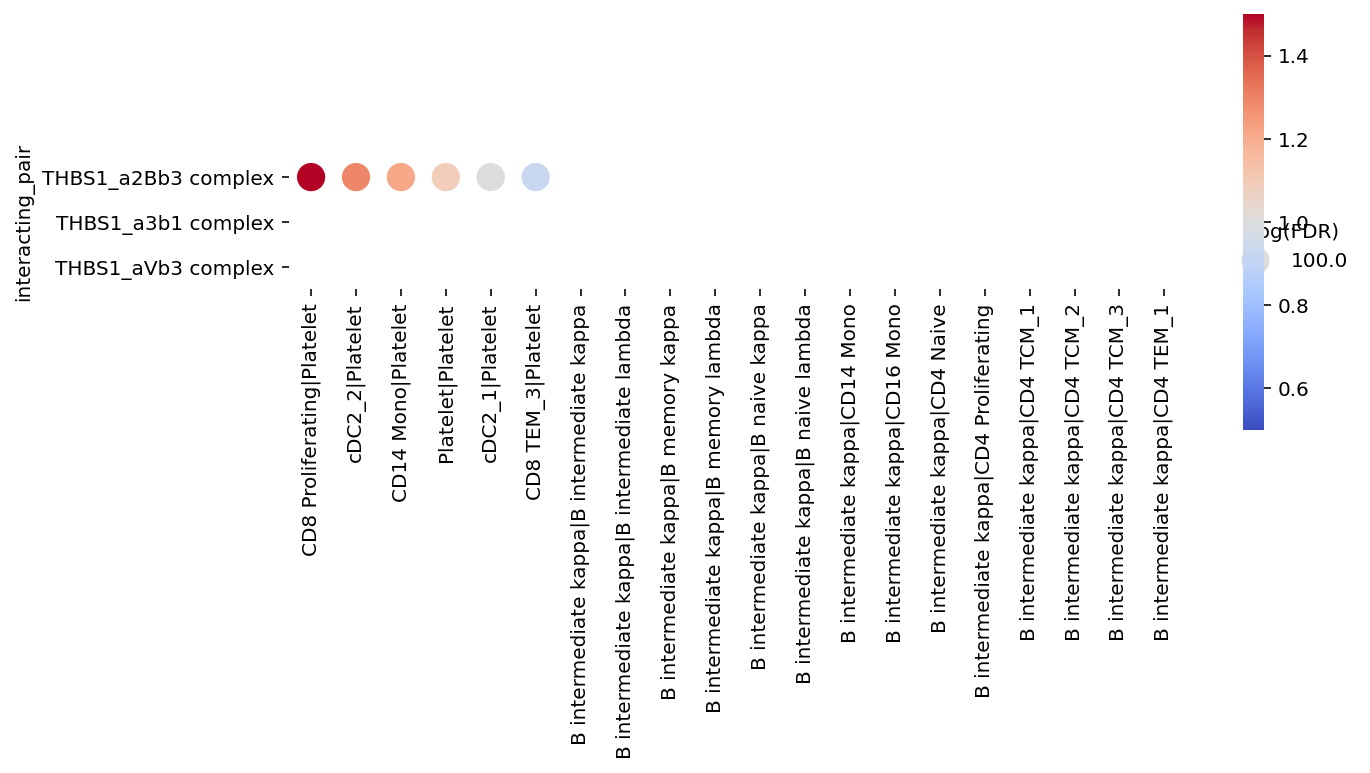

In [96]:
plt.figure(figsize=(10,5))
ax = scattermap(ratio_THBS1_sorted.iloc[:,:20], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [97]:
ratio_CLEC2 = ratio[ratio.index.str.startswith("CLEC2")]
ratio_CLEC2

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
CLEC2B_KLRF1                                            NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
CLEC2B_KLRF1                                             NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
CLEC2B_KLRF1                                      NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
CLEC2B_KLRF1                                       NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
CLEC2B_KLRF1                                     NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
CLEC2B_KLRF1                                      NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
CLEC2B_KLRF1                                 NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
CLEC2B_KLRF1                                 NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
CLEC2B_KLRF1                                 NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
CLEC2B_KLRF1                                         NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
CLEC2B_KLRF1                  NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
CLEC2B_KLRF1            NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
CLEC2B_KLRF1          NaN  

[1 rows x 2116 columns]

In [98]:
ratio_CLEC2_sorted = ratio_CLEC2.sort_values(["CLEC2B_KLRF1"], ascending=False, axis=1)
ratio_CLEC2_sorted

CD8 TEM_3|NK_4  CD8 TEM_3|NK_2  dnT_2|NK_1  NK_1|gdT_4  \
interacting_pair                                                           
CLEC2B_KLRF1            1.872222        1.750978    1.749226    1.727273   

                  ILC|NK_1  CD8 TEM_3|NK_CD56bright  CD4 TCM_2|gdT_1  \
interacting_pair                                                       
CLEC2B_KLRF1      1.719361                 1.687799         1.639493   

                  CD8 TEM_1|gdT_1  CD8 TEM_2|gdT_1  dnT_2|gdT_4  ...  \
interacting_pair                                                 ...   
CLEC2B_KLRF1             1.608696         1.589178     1.563845  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
CLEC2B_KLRF1                  NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
CLEC2B_KLRF1            NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
CLEC2B_KLRF1          NaN  

[1 rows x 2116 columns]

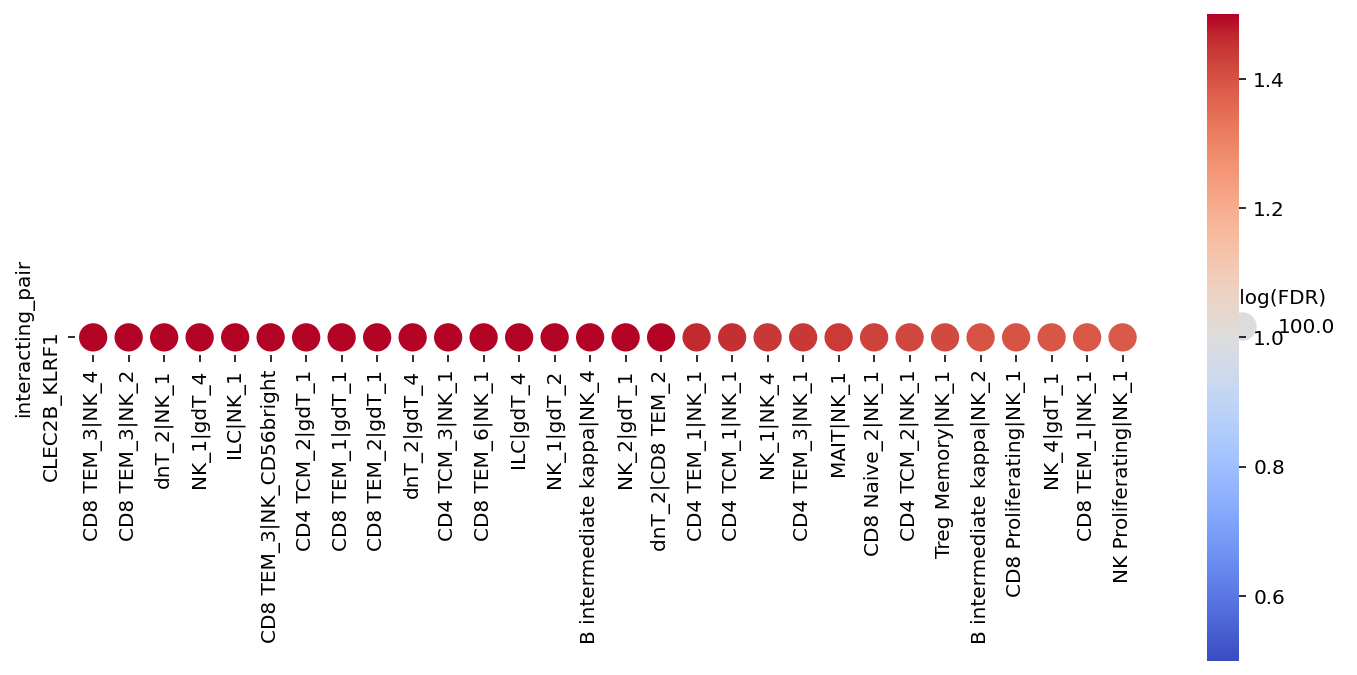

In [100]:
plt.figure(figsize=(10,5))
ax = scattermap(ratio_CLEC2_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [101]:
ratio_ICAM = ratio[ratio.index.str.startswith("ICAM")]
ratio_ICAM

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                
ICAM4_aLb2 complex                                        NaN   
ICAM1_aXb2 complex                                        NaN   
ICAM1_aMb2 complex                                        NaN   
ICAM2_aLb2 complex                                        NaN   
ICAM1_ITGAL                                               NaN   
ICAM1_aLb2 complex                                        NaN   
ICAM3_aLb2 complex                                        NaN   
ICAM1_AREG                                                NaN   
ICAM1_SPN                                                 NaN   
ICAM3_CLEC4M                                              NaN   
ICAM3_CD209                                               NaN   
ICAM3_aDb2 complex                                        NaN   

                    B intermediate kappa|B intermediate lambda  \
interacting_pair                                                 
ICAM4_aLb2 complex                                         NaN   
ICAM1_aXb2 complex                                         NaN   
ICAM1_aMb2 complex                                         NaN   
ICAM2_aLb2 complex                                         NaN   
ICAM1_ITGAL                                                NaN   
ICAM1_aLb2 complex                                         NaN   
ICAM3_aLb2 complex                                         NaN   
ICAM1_AREG                                            1.565957   
ICAM1_SPN                                                  NaN   
ICAM3_CLEC4M                                               NaN   
ICAM3_CD209                                                NaN   
ICAM3_aDb2 complex                                         NaN   

                    B intermediate kappa|B memory kappa  \
interacting_pair                                          
ICAM4_aLb2 complex                                  NaN   
ICAM1_aXb2 complex                                  NaN   
ICAM1_aMb2 complex                                  NaN   
ICAM2_aLb2 complex                                  NaN   
ICAM1_ITGAL                                         NaN   
ICAM1_aLb2 complex                                  NaN   
ICAM3_aLb2 complex                                  NaN   
ICAM1_AREG                                          NaN   
ICAM1_SPN                                           NaN   
ICAM3_CLEC4M                                        NaN   
ICAM3_CD209                                         NaN   
ICAM3_aDb2 complex                                  NaN   

                    B intermediate kappa|B memory lambda  \
interacting_pair                                           
ICAM4_aLb2 complex                                   NaN   
ICAM1_aXb2 complex                                   NaN   
ICAM1_aMb2 complex                                   NaN   
ICAM2_aLb2 complex                                   NaN   
ICAM1_ITGAL                                          NaN   
ICAM1_aLb2 complex                                   NaN   
ICAM3_aLb2 complex                                   NaN   
ICAM1_AREG                                           NaN   
ICAM1_SPN                                            NaN   
ICAM3_CLEC4M                                         NaN   
ICAM3_CD209                                          NaN   
ICAM3_aDb2 complex                                   NaN   

                    B intermediate kappa|B naive kappa  \
interacting_pair                                         
ICAM4_aLb2 complex                                 NaN   
ICAM1_aXb2 complex                                 NaN   
ICAM1_aMb2 complex                                 NaN   
ICAM2_aLb2 complex                                 NaN   
ICAM1_ITGAL                                        NaN   
ICAM1_aLb2 complex                                 NaN   
ICAM3_aLb2 complex                                 N

In [108]:
ratio_ICAM_sorted = ratio_ICAM.sort_values(["ICAM1_ITGAL", "ICAM1_AREG", ], ascending=False, axis=1)
ratio_ICAM_sorted

cDC1|cDC2_1  cDC1|Plasma  CD8 TEM_3|Plasma  \
interacting_pair                                                 
ICAM4_aLb2 complex     2.207792     1.776224               NaN   
ICAM1_aXb2 complex     1.662665          NaN               NaN   
ICAM1_aMb2 complex          NaN          NaN               NaN   
ICAM2_aLb2 complex          NaN          NaN               NaN   
ICAM1_ITGAL            2.027088     1.978927          1.804598   
ICAM1_aLb2 complex     2.027088          NaN               NaN   
ICAM3_aLb2 complex          NaN          NaN               NaN   
ICAM1_AREG             1.898897          NaN               NaN   
ICAM1_SPN              1.465074     1.424390          1.274351   
ICAM3_CLEC4M                NaN          NaN               NaN   
ICAM3_CD209                 NaN          NaN               NaN   
ICAM3_aDb2 complex          NaN          NaN               NaN   

                    cDC1|CD8 TEM_5  cDC1|CD14 Mono  cDC2_1|CD8 TEM_5  \
interacting_pair                                                       
ICAM4_aLb2 complex        1.562500        1.480000               NaN   
ICAM1_aXb2 complex             NaN        1.181559               NaN   
ICAM1_aMb2 complex        1.561905        1.254630          1.502525   
ICAM2_aLb2 complex             NaN             NaN               NaN   
ICAM1_ITGAL               1.737274        1.733463          1.731809   
ICAM1_aLb2 complex        1.737274        1.733463          1.731809   
ICAM3_aLb2 complex        1.299223             NaN               NaN   
ICAM1_AREG                     NaN             NaN               NaN   
ICAM1_SPN                 1.535959        1.597077          1.473684   
ICAM3_CLEC4M                   NaN             NaN               NaN   
ICAM3_CD209                    NaN             NaN               NaN   
ICAM3_aDb2 complex             NaN             NaN               NaN   

                    cDC2_1|CD14 Mono  cDC1|gdT_1  cDC2_1|gdT_1  cDC1|cDC2_2  \
interacting_pair                                                              
ICAM4_aLb2 complex               NaN    1.484848           NaN          NaN   
ICAM1_aXb2 complex          1.101842         NaN           NaN     1.366197   
ICAM1_aMb2 complex          1.132948         NaN           NaN          NaN   
ICAM2_aLb2 complex               NaN         NaN           NaN          NaN   
ICAM1_ITGAL                 1.729870    1.704778      1.689956     1.659483   
ICAM1_aLb2 complex          1.729870    1.704778      1.689956     1.659483   
ICAM3_aLb2 complex               NaN         NaN           NaN          NaN   
ICAM1_AREG                       NaN         NaN           NaN     1.304406   
ICAM1_SPN                   1.538462    1.433526      1.327366     1.698502   
ICAM3_CLEC4M                     NaN         NaN           NaN          NaN   
ICAM3_CD209                      NaN         NaN           NaN          NaN   
ICAM3_aDb2 complex               NaN         NaN           NaN          NaN   

                    ...  pDC|CD8 Proliferating  pDC|CD8 TCM_2  pDC|CD8 TEM_3  \
interacting_pair    ...                                                        
ICAM4_aLb2 complex  ...                    NaN            NaN            NaN   
ICAM1_aXb2 complex  ...                    NaN            NaN            NaN   
ICAM1_aMb2 complex  ...                    NaN            NaN            NaN   
ICAM2_aLb2 complex  ...                    NaN            NaN            NaN   
ICAM1_ITGAL         ...                    NaN            NaN            NaN   
ICAM1_aLb2 complex  ...                    NaN            NaN            NaN   
ICAM3_aLb2 complex  ...                    NaN            NaN            NaN   
ICAM1_AREG          ...                    NaN            NaN            NaN   
ICAM1_SPN           ...               1.194203            NaN       1.419935   
ICAM3_CLEC4M        ...                    NaN            NaN            NaN   
ICAM3_CD209        

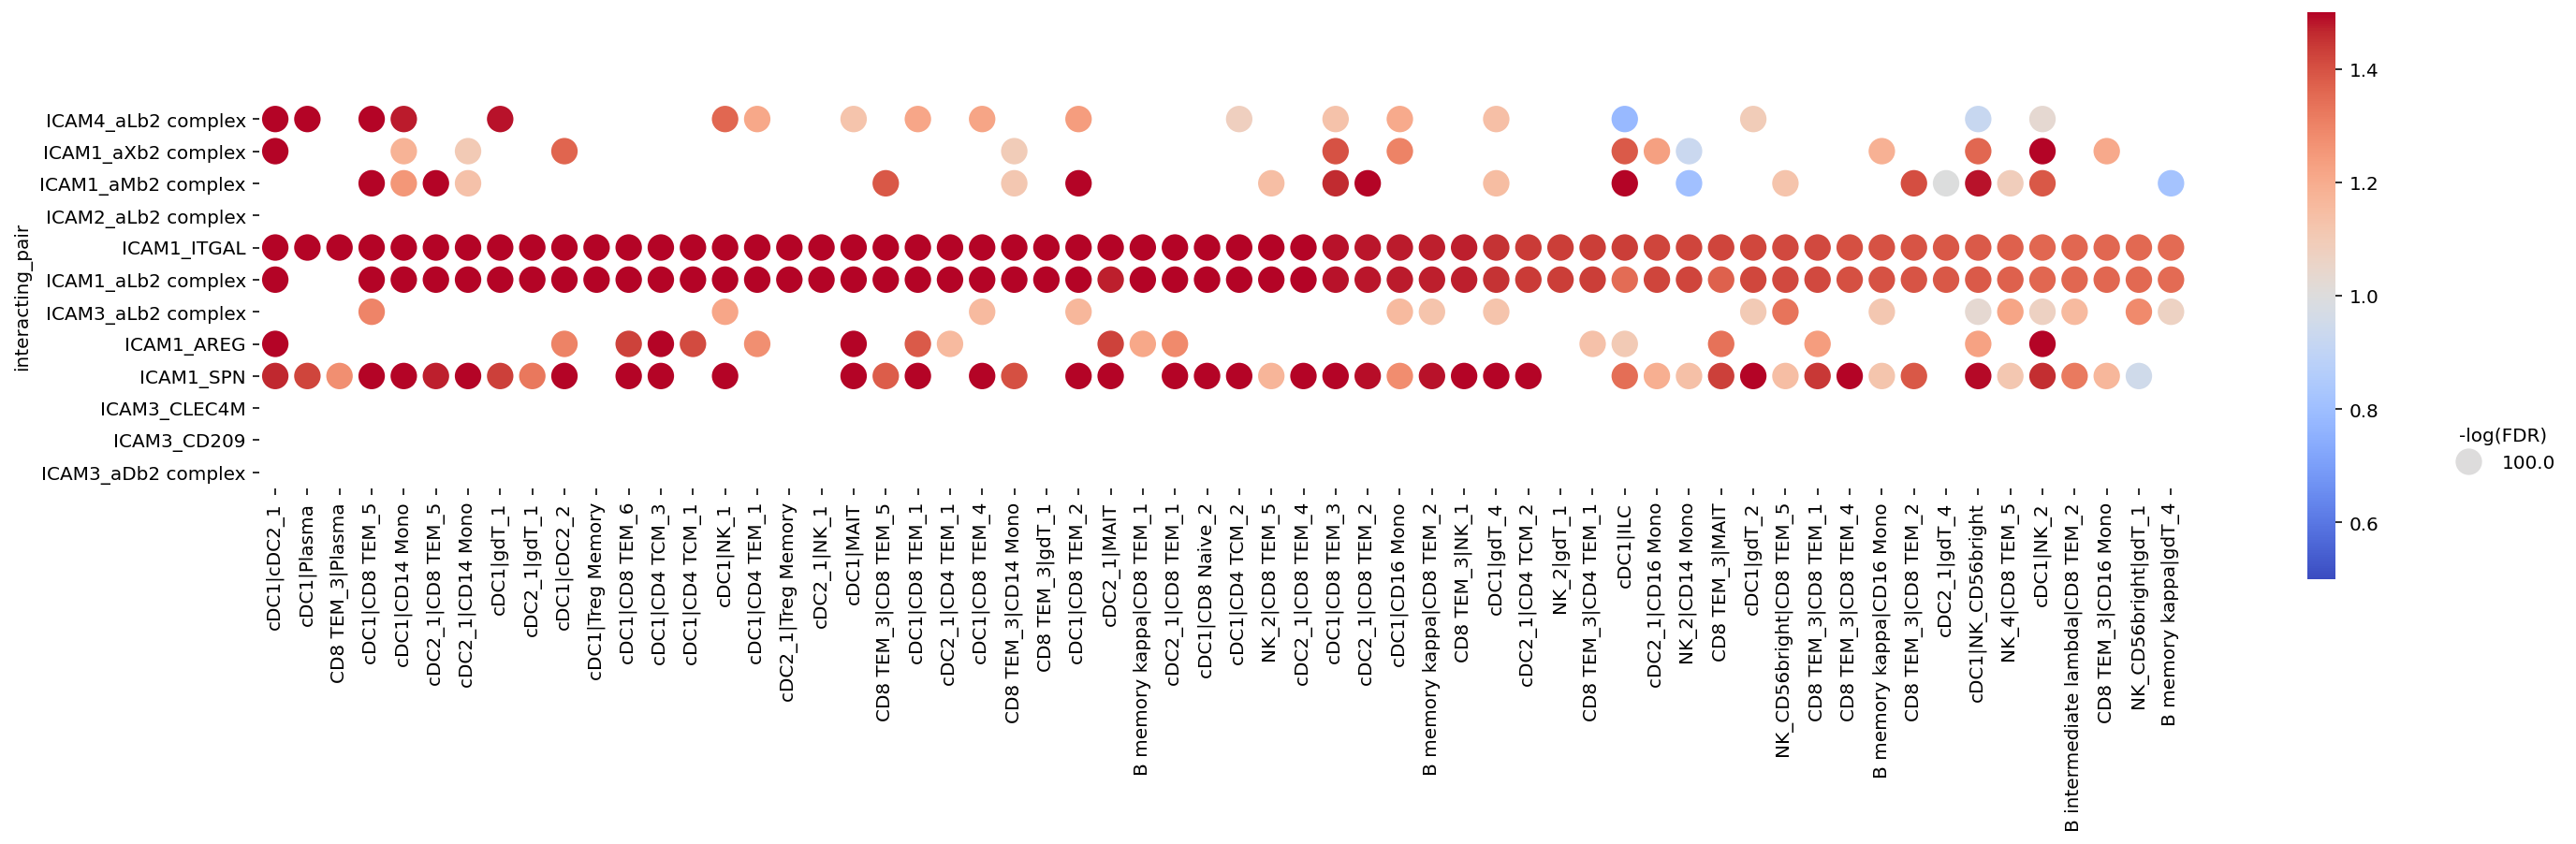

In [110]:
plt.figure(figsize=(20,6))
ax = scattermap(ratio_ICAM_sorted.iloc[:,:60], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [111]:
ratio_CCL5 = ratio[ratio.index.str.startswith("CCL5")]
ratio_CCL5

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
CCL5_CCR5                                               NaN   
CCL5_CCR4                                               NaN   
CCL5_CCR1                                               NaN   
CCL5_ACKR4                                              NaN   
CCL5_CCR3                                               NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
CCL5_CCR5                                                NaN   
CCL5_CCR4                                                NaN   
CCL5_CCR1                                                NaN   
CCL5_ACKR4                                               NaN   
CCL5_CCR3                                                NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
CCL5_CCR5                                         NaN   
CCL5_CCR4                                         NaN   
CCL5_CCR1                                         NaN   
CCL5_ACKR4                                        NaN   
CCL5_CCR3                                         NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
CCL5_CCR5                                          NaN   
CCL5_CCR4                                          NaN   
CCL5_CCR1                                          NaN   
CCL5_ACKR4                                         NaN   
CCL5_CCR3                                          NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
CCL5_CCR5                                        NaN   
CCL5_CCR4                                        NaN   
CCL5_CCR1                                        NaN   
CCL5_ACKR4                                       NaN   
CCL5_CCR3                                        NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
CCL5_CCR5                                         NaN   
CCL5_CCR4                                         NaN   
CCL5_CCR1                                         NaN   
CCL5_ACKR4                                        NaN   
CCL5_CCR3                                         NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
CCL5_CCR5                                    NaN   
CCL5_CCR4                                    NaN   
CCL5_CCR1                                    NaN   
CCL5_ACKR4                                   NaN   
CCL5_CCR3                                    NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
CCL5_CCR5                                    NaN   
CCL5_CCR4                                    NaN   
CCL5_CCR1                                    NaN   
CCL5_ACKR4                                   NaN   
CCL5_CCR3                                    NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
CCL5_CCR5                                    NaN   
CCL5_CCR4                                    NaN   
CCL5_CCR1                                    NaN   
CCL5_ACKR4                                   NaN   
CCL5_CCR3                                    NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
CCL5_CCR5                                            NaN  ...   
CCL5_CCR4                                            NaN  ...   
CCL5_CCR1                                            NaN  ...   
CCL5_ACKR4                                           NaN  ...   
CCL5_CCR3                                 

In [112]:
ratio_CCL5_sorted = ratio_CCL5.sort_values(["CCL5_CCR1", ], ascending=False, axis=1)
ratio_CCL5_sorted

CD8 Proliferating|cDC2_1  CD8 Proliferating|CD16 Mono  \
interacting_pair                                                          
CCL5_CCR5                              NaN                          NaN   
CCL5_CCR4                              NaN                          NaN   
CCL5_CCR1                              1.5                     1.414557   
CCL5_ACKR4                             NaN                          NaN   
CCL5_CCR3                              NaN                          NaN   

                  CD8 Proliferating|CD14 Mono  gdT_4|cDC2_1  gdT_2|cDC2_1  \
interacting_pair                                                            
CCL5_CCR5                                 NaN           NaN           NaN   
CCL5_CCR4                                 NaN           NaN           NaN   
CCL5_CCR1                            1.357042      1.308344      1.273458   
CCL5_ACKR4                                NaN           NaN           NaN   
CCL5_CCR3                                 NaN           NaN           NaN   

                  gdT_4|CD16 Mono  gdT_4|CD14 Mono  CD8 TEM_5|cDC2_1  \
interacting_pair                                                       
CCL5_CCR5                     NaN              NaN               NaN   
CCL5_CCR4                     NaN              NaN               NaN   
CCL5_CCR1                1.242812         1.211628          1.208559   
CCL5_ACKR4                    NaN              NaN               NaN   
CCL5_CCR3                     NaN              NaN               NaN   

                  gdT_2|CD16 Mono  CD4 TEM_3|cDC2_1  ...  pDC|Treg Memory  \
interacting_pair                                     ...                    
CCL5_CCR5                     NaN               NaN  ...              NaN   
CCL5_CCR4                     NaN               NaN  ...              NaN   
CCL5_CCR1                1.206965          1.205563  ...              NaN   
CCL5_ACKR4                    NaN               NaN  ...              NaN   
CCL5_CCR3                     NaN               NaN  ...              NaN   

                  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  \
interacting_pair                                                           
CCL5_CCR5              NaN         NaN         NaN        NaN        NaN   
CCL5_CCR4              NaN         NaN         NaN        NaN        NaN   
CCL5_CCR1              NaN         NaN         NaN        NaN        NaN   
CCL5_ACKR4             NaN         NaN         NaN        NaN        NaN   
CCL5_CCR3              NaN         NaN         NaN        NaN        NaN   

                  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                            
CCL5_CCR5               NaN        NaN        NaN      NaN  
CCL5_CCR4               NaN        NaN        NaN      NaN  
CCL5_CCR1               NaN        NaN        NaN      NaN  
CCL5_ACKR4              NaN        NaN        NaN      NaN  
CCL5_CCR3               NaN        NaN        NaN      NaN  

[5 rows x 2116 columns]

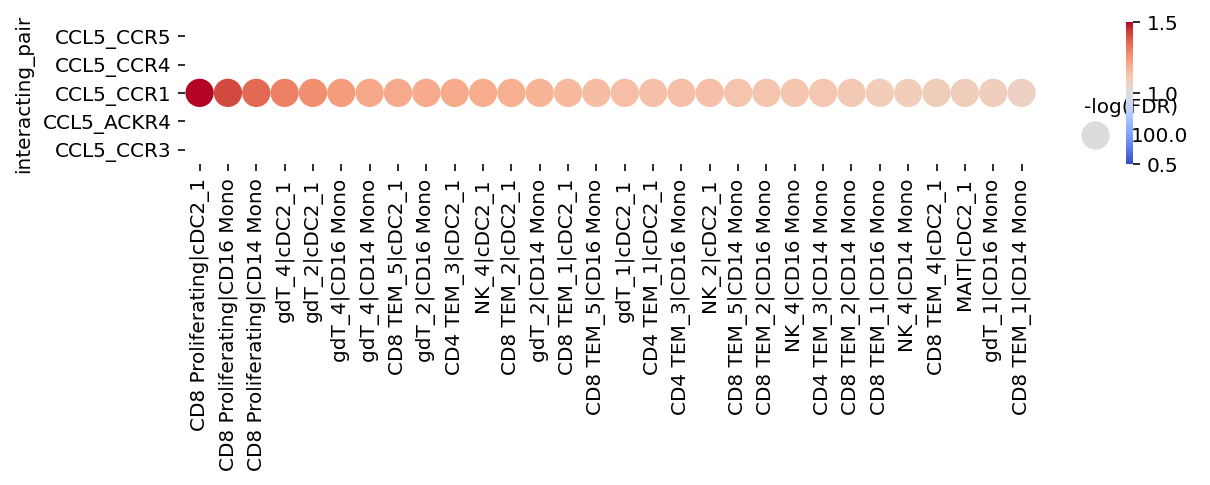

In [119]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_CCL5_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [120]:
ratio_PECAM = ratio[ratio.index.str.startswith("PECAM")]
ratio_PECAM

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
PECAM1_CD38                                             NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
PECAM1_CD38                                              NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
PECAM1_CD38                                       NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
PECAM1_CD38                                        NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
PECAM1_CD38                                      NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
PECAM1_CD38                                       NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
PECAM1_CD38                                  NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
PECAM1_CD38                                  NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
PECAM1_CD38                                  NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
PECAM1_CD38                                          NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
PECAM1_CD38                   NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
PECAM1_CD38             NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
PECAM1_CD38           NaN  

[1 rows x 2116 columns]

In [121]:
ratio_PECAM_sorted = ratio_PECAM.sort_values(["PECAM1_CD38"], ascending=False, axis=1)
ratio_PECAM_sorted

cDC2_1|NK_2  cDC2_1|NK_4  CD8 TEM_6|NK_2  \
interacting_pair                                             
PECAM1_CD38          1.520468     1.438538        1.386139   

                  cDC2_1|NK_CD56bright  Platelet|NK_2  cDC2_1|cDC1  \
interacting_pair                                                     
PECAM1_CD38                   1.362018       1.335347     1.259146   

                  Platelet|NK_4  CD8 Proliferating|NK Proliferating  \
interacting_pair                                                      
PECAM1_CD38            1.228374                            1.209003   

                  CD8 TEM_6|NK_4  CD4 Naive|Plasma  ...  pDC|Treg Memory  \
interacting_pair                                    ...                    
PECAM1_CD38              1.20625          1.199219  ...              NaN   

                  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  \
interacting_pair                                                           
PECAM1_CD38            NaN         NaN         NaN        NaN        NaN   

                  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                            
PECAM1_CD38             NaN        NaN        NaN      NaN  

[1 rows x 2116 columns]

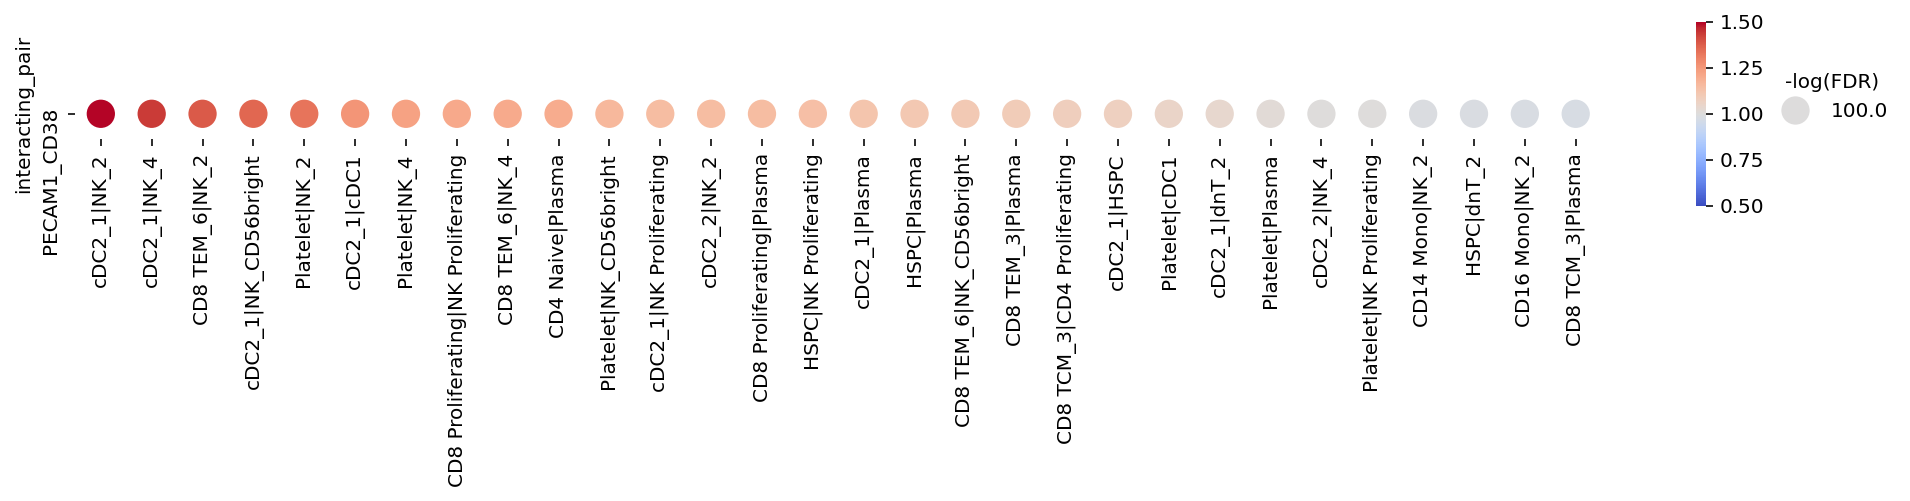

In [122]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_PECAM_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [123]:
ratio_TNFSF14 = ratio[ratio.index.str.startswith("TNFSF14")]
ratio_TNFSF14

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
TNFSF14_LTBR                                            NaN   
TNFSF14_TNFRSF14                                        NaN   
TNFSF14_TNFRSF6B                                        NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
TNFSF14_LTBR                                             NaN   
TNFSF14_TNFRSF14                                         NaN   
TNFSF14_TNFRSF6B                                         NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
TNFSF14_LTBR                                      NaN   
TNFSF14_TNFRSF14                                  NaN   
TNFSF14_TNFRSF6B                                  NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
TNFSF14_LTBR                                       NaN   
TNFSF14_TNFRSF14                                   NaN   
TNFSF14_TNFRSF6B                                   NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
TNFSF14_LTBR                                     NaN   
TNFSF14_TNFRSF14                                 NaN   
TNFSF14_TNFRSF6B                                 NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
TNFSF14_LTBR                                      NaN   
TNFSF14_TNFRSF14                                  NaN   
TNFSF14_TNFRSF6B                                  NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
TNFSF14_LTBR                                 NaN   
TNFSF14_TNFRSF14                             NaN   
TNFSF14_TNFRSF6B                             NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
TNFSF14_LTBR                                 NaN   
TNFSF14_TNFRSF14                             NaN   
TNFSF14_TNFRSF6B                             NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
TNFSF14_LTBR                                 NaN   
TNFSF14_TNFRSF14                             NaN   
TNFSF14_TNFRSF6B                             NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
TNFSF14_LTBR                                         NaN  ...   
TNFSF14_TNFRSF14                                     NaN  ...   
TNFSF14_TNFRSF6B                                     NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
TNFSF14_LTBR                  NaN       NaN         NaN         NaN   
TNFSF14_TNFRSF14              NaN       NaN         NaN         NaN   
TNFSF14_TNFRSF6B              NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
TNFSF14_LTBR            NaN        NaN        NaN        NaN        NaN   
TNFSF14_TNFRSF14        NaN        NaN        NaN        NaN        NaN   
TNFSF14_TNFRSF6B        NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
TNFSF14_LTBR          NaN  
TNFSF14_TNFRSF14      NaN  
TNFSF14_TNFRSF6B      NaN  

[3 rows x 2116 columns]

In [127]:
ratio_TNFSF14_sorted = ratio_TNFSF14.sort_values(["TNFSF14_LTBR", "TNFSF14_TNFRSF14"], ascending=False, axis=1)
ratio_TNFSF14_sorted

NK_1|CD14 Mono  NK_1|cDC2_2  NK_1|cDC2_1  NK_1|cDC1  \
interacting_pair                                                        
TNFSF14_LTBR            2.538462          2.5     2.424242   2.380208   
TNFSF14_TNFRSF14             NaN          NaN          NaN        NaN   
TNFSF14_TNFRSF6B             NaN          NaN          NaN        NaN   

                  NK_2|CD16 Mono  NK_2|CD14 Mono  NK_2|cDC2_1  \
interacting_pair                                                
TNFSF14_LTBR            1.586387        1.400922     1.381974   
TNFSF14_TNFRSF14        1.323383        1.269444          NaN   
TNFSF14_TNFRSF6B             NaN             NaN          NaN   

                  CD4 Proliferating|cDC1  cDC2_1|CD16 Mono  \
interacting_pair                                             
TNFSF14_LTBR                    1.341365          1.328125   
TNFSF14_TNFRSF14                     NaN          1.223176   
TNFSF14_TNFRSF6B                     NaN               NaN   

                  CD8 TEM_2|CD16 Mono  ...  pDC|Treg Memory  pDC|cDC1  \
interacting_pair                       ...                              
TNFSF14_LTBR                 1.317881  ...              NaN       NaN   
TNFSF14_TNFRSF14             1.182320  ...              NaN       NaN   
TNFSF14_TNFRSF6B                  NaN  ...              NaN       NaN   

                  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  \
interacting_pair                                                            
TNFSF14_LTBR             NaN         NaN        NaN        NaN        NaN   
TNFSF14_TNFRSF14         NaN         NaN        NaN        NaN        NaN   
TNFSF14_TNFRSF6B         NaN         NaN        NaN        NaN        NaN   

                  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                 
TNFSF14_LTBR            NaN        NaN      NaN  
TNFSF14_TNFRSF14        NaN        NaN      NaN  
TNFSF14_TNFRSF6B        NaN        NaN      NaN  

[3 rows x 2116 columns]

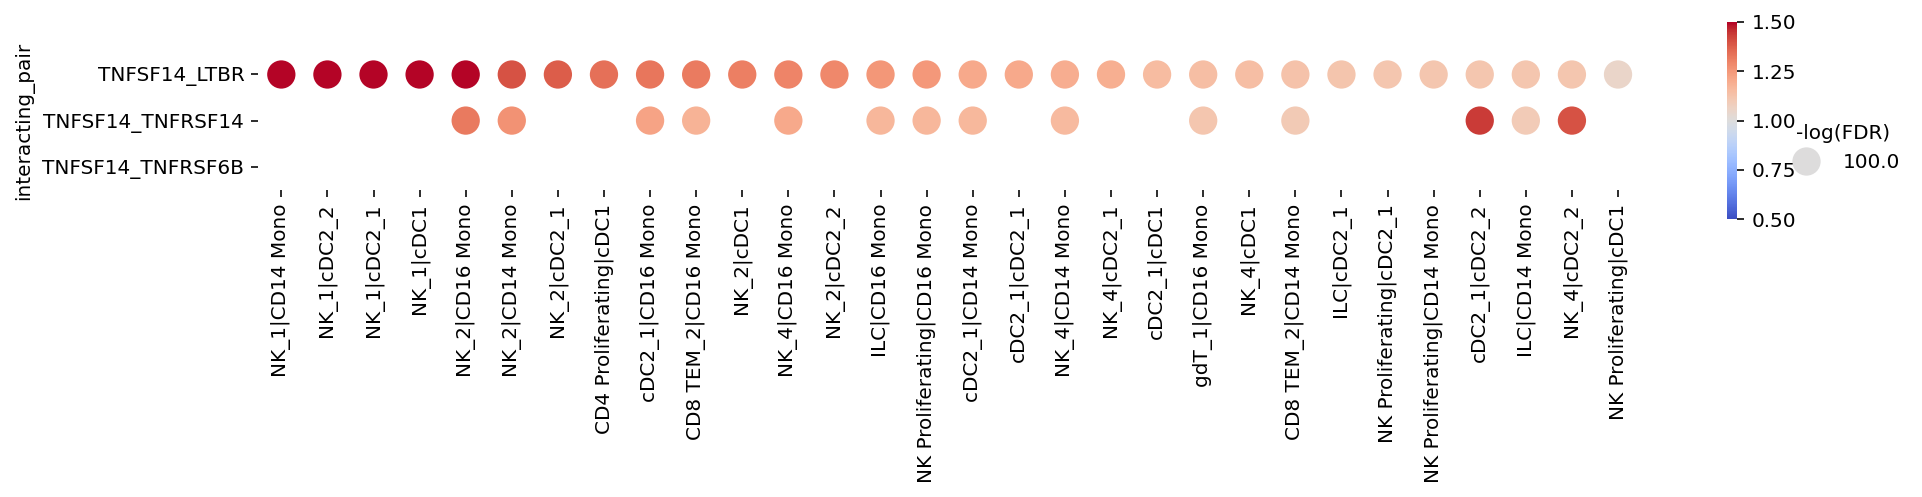

In [128]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_TNFSF14_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [129]:
ratio_TGFB1 = ratio[ratio.index.str.startswith("TGFB1")]
ratio_TGFB1

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                     
TGFB1_TGFbeta receptor2                                        NaN   
TGFB1_TGFbeta receptor1                                        NaN   
TGFB1_TGFBR3                                                   NaN   
TGFB1_aVb6 complex                                             NaN   

                         B intermediate kappa|B intermediate lambda  \
interacting_pair                                                      
TGFB1_TGFbeta receptor2                                         NaN   
TGFB1_TGFbeta receptor1                                         NaN   
TGFB1_TGFBR3                                                    NaN   
TGFB1_aVb6 complex                                              NaN   

                         B intermediate kappa|B memory kappa  \
interacting_pair                                               
TGFB1_TGFbeta receptor2                                  NaN   
TGFB1_TGFbeta receptor1                                  NaN   
TGFB1_TGFBR3                                             NaN   
TGFB1_aVb6 complex                                       NaN   

                         B intermediate kappa|B memory lambda  \
interacting_pair                                                
TGFB1_TGFbeta receptor2                                   NaN   
TGFB1_TGFbeta receptor1                                   NaN   
TGFB1_TGFBR3                                              NaN   
TGFB1_aVb6 complex                                        NaN   

                         B intermediate kappa|B naive kappa  \
interacting_pair                                              
TGFB1_TGFbeta receptor2                                 NaN   
TGFB1_TGFbeta receptor1                                 NaN   
TGFB1_TGFBR3                                            NaN   
TGFB1_aVb6 complex                                      NaN   

                         B intermediate kappa|B naive lambda  \
interacting_pair                                               
TGFB1_TGFbeta receptor2                                  NaN   
TGFB1_TGFbeta receptor1                                  NaN   
TGFB1_TGFBR3                                             NaN   
TGFB1_aVb6 complex                                       NaN   

                         B intermediate kappa|CD14 Mono  \
interacting_pair                                          
TGFB1_TGFbeta receptor2                             NaN   
TGFB1_TGFbeta receptor1                             NaN   
TGFB1_TGFBR3                                        NaN   
TGFB1_aVb6 complex                                  NaN   

                         B intermediate kappa|CD16 Mono  \
interacting_pair                                          
TGFB1_TGFbeta receptor2                             NaN   
TGFB1_TGFbeta receptor1                             NaN   
TGFB1_TGFBR3                                        NaN   
TGFB1_aVb6 complex                                  NaN   

                         B intermediate kappa|CD4 Naive  \
interacting_pair                                          
TGFB1_TGFbeta receptor2                             NaN   
TGFB1_TGFbeta receptor1                             NaN   
TGFB1_TGFBR3                                        NaN   
TGFB1_aVb6 complex                                  NaN   

                         B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                                 ...   
TGFB1_TGFbeta receptor2                                     NaN  ...   
TGFB1_TGFbeta receptor1                                     NaN  ...   
TGFB1_TGFBR3                                                NaN  ...   
TGFB1_aVb6 complex                                          NaN  ...   

                         pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                             

In [132]:
ratio_TGFB1_sorted = ratio_TGFB1.sort_values(["TGFB1_TGFbeta receptor1", "TGFB1_TGFBR3", ], ascending=False, axis=1)
ratio_TGFB1_sorted

ILC|NK_1  cDC2_2|NK_1  CD16 Mono|NK_1  \
interacting_pair                                                 
TGFB1_TGFbeta receptor2       NaN          NaN             NaN   
TGFB1_TGFbeta receptor1  1.538851     1.504363        1.353153   
TGFB1_TGFBR3                  NaN          NaN             NaN   
TGFB1_aVb6 complex            NaN          NaN             NaN   

                         CD8 TEM_5|NK_1  CD14 Mono|NK_1  CD8 TEM_1|NK_1  \
interacting_pair                                                          
TGFB1_TGFbeta receptor2             NaN             NaN             NaN   
TGFB1_TGFbeta receptor1         1.35248        1.344551        1.335878   
TGFB1_TGFBR3                        NaN             NaN             NaN   
TGFB1_aVb6 complex                  NaN             NaN             NaN   

                         ILC|B memory lambda  CD4 TEM_1|NK_1  ILC|NK_2  \
interacting_pair                                                         
TGFB1_TGFbeta receptor2                  NaN             NaN       NaN   
TGFB1_TGFbeta receptor1             1.313149        1.282958  1.282895   
TGFB1_TGFBR3                             NaN             NaN  1.137143   
TGFB1_aVb6 complex                       NaN             NaN       NaN   

                         cDC2_2|B memory lambda  ...  pDC|NK_1  pDC|Plasma  \
interacting_pair                                 ...                         
TGFB1_TGFbeta receptor2                     NaN  ...       NaN         NaN   
TGFB1_TGFbeta receptor1                1.272401  ...       NaN         NaN   
TGFB1_TGFBR3                                NaN  ...       NaN         NaN   
TGFB1_aVb6 complex                          NaN  ...       NaN         NaN   

                         pDC|Platelet  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  \
interacting_pair                                                               
TGFB1_TGFbeta receptor2           NaN              NaN       NaN         NaN   
TGFB1_TGFbeta receptor1           NaN              NaN       NaN         NaN   
TGFB1_TGFBR3                      NaN              NaN       NaN         NaN   
TGFB1_aVb6 complex                NaN              NaN       NaN         NaN   

                         pDC|cDC2_2  pDC|dnT_2  pDC|gdT_3  pDC|pDC  
interacting_pair                                                    
TGFB1_TGFbeta receptor2         NaN        NaN        NaN      NaN  
TGFB1_TGFbeta receptor1         NaN        NaN        NaN      NaN  
TGFB1_TGFBR3                    NaN        NaN        NaN      NaN  
TGFB1_aVb6 complex              NaN        NaN        NaN      NaN  

[4 rows x 2116 columns]

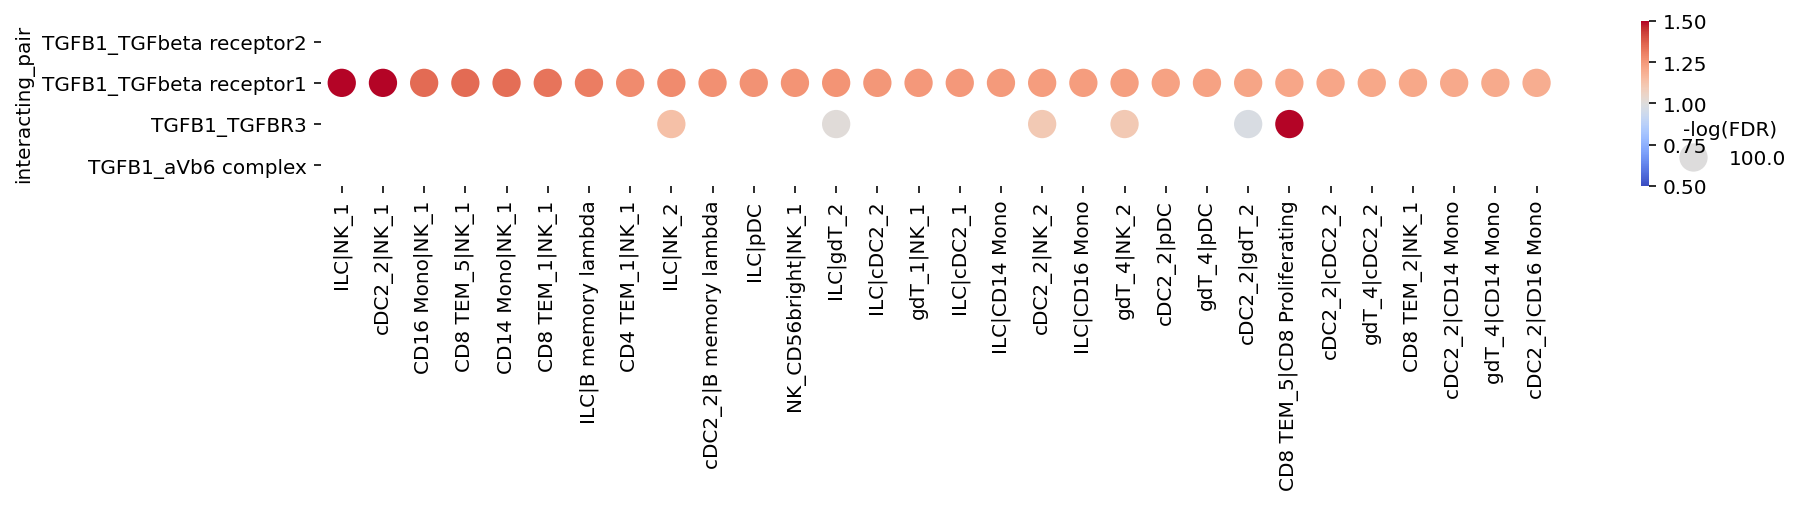

In [133]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_TGFB1_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [134]:
ratio_CD160 = ratio[ratio.index.str.startswith("CD160")]
ratio_CD160

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
CD160_TNFRSF14                                          NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
CD160_TNFRSF14                                           NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
CD160_TNFRSF14                                    NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
CD160_TNFRSF14                                     NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
CD160_TNFRSF14                                   NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
CD160_TNFRSF14                                    NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
CD160_TNFRSF14                               NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
CD160_TNFRSF14                               NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
CD160_TNFRSF14                               NaN   

                  B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                          ...   
CD160_TNFRSF14                                       NaN  ...   

                  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                      
CD160_TNFRSF14                NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
CD160_TNFRSF14          NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
CD160_TNFRSF14        NaN  

[1 rows x 2116 columns]

In [135]:
ratio_CD160_sorted = ratio_CD160.sort_values(["CD160_TNFRSF14", ], ascending=False, axis=1)
ratio_CD160_sorted

NK_2|CD4 Naive  gdT_4|CD4 Naive  NK Proliferating|CD4 Naive  \
interacting_pair                                                                
CD160_TNFRSF14          2.118072         2.113314                    2.077957   

                  NK_2|CD8 TCM_2  NK_2|cDC2_2  NK_4|CD4 Naive  gdT_4|cDC2_2  \
interacting_pair                                                              
CD160_TNFRSF14          1.918782     1.653846         1.60119      1.560976   

                  NK Proliferating|cDC2_2  NK_2|CD8 TEM_5  NK_2|NK_CD56bright  \
interacting_pair                                                                
CD160_TNFRSF14                   1.550432        1.548469            1.524096   

                  ...  pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair  ...                                                      
CD160_TNFRSF14    ...              NaN       NaN         NaN         NaN   

                  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                          
CD160_TNFRSF14          NaN        NaN        NaN        NaN        NaN   

                  pDC|pDC  
interacting_pair           
CD160_TNFRSF14        NaN  

[1 rows x 2116 columns]

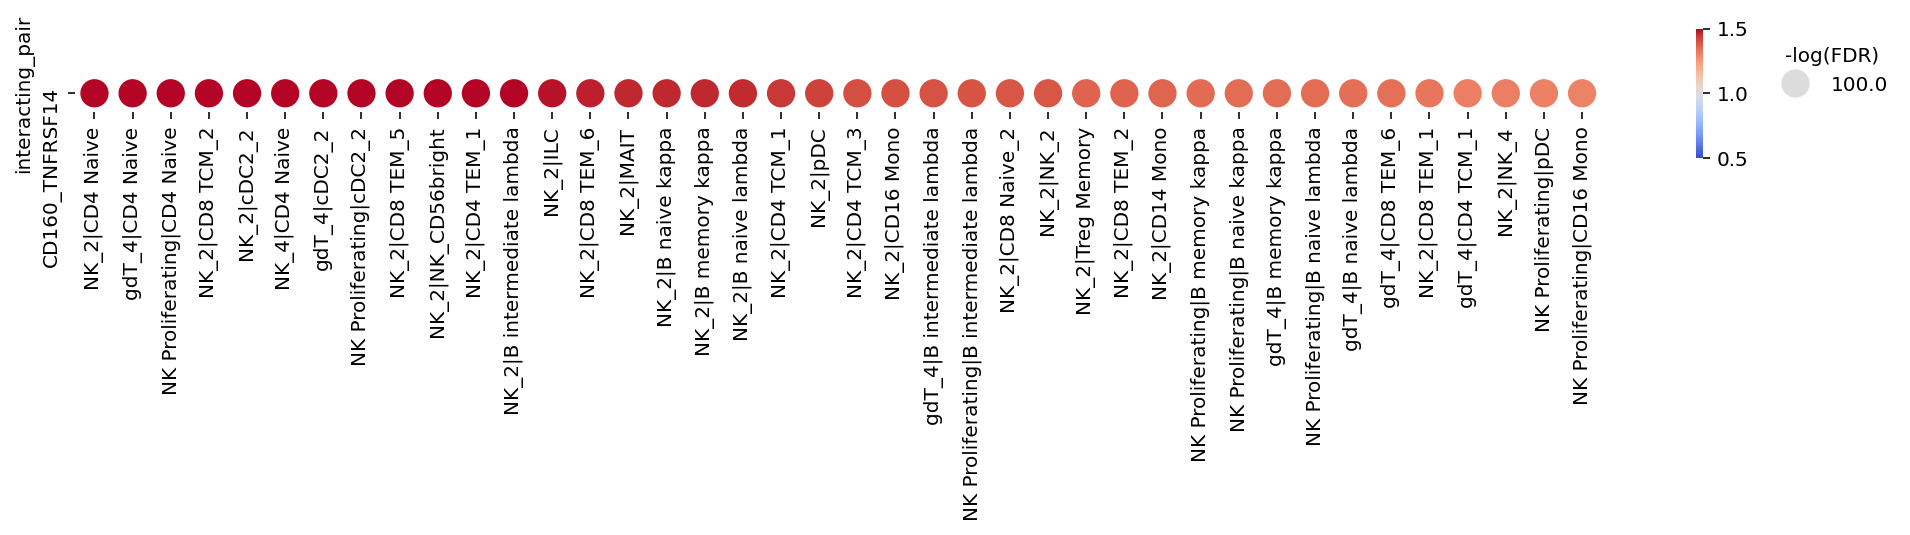

In [137]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_CD160_sorted.iloc[:,:40], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [138]:
ratio_CCL4 = ratio[ratio.index.str.startswith("CCL4")]
ratio_CCL4

B intermediate kappa|B intermediate kappa  \
interacting_pair                                              
CCL4_CCR5                                               NaN   
CCL4L2_VSIR                                             NaN   
CCL4_SLC7A1                                             NaN   
CCL4_CCR8                                               NaN   
CCL4L2_GPR101                                           NaN   
CCL4_CNR2                                               NaN   

                  B intermediate kappa|B intermediate lambda  \
interacting_pair                                               
CCL4_CCR5                                                NaN   
CCL4L2_VSIR                                              NaN   
CCL4_SLC7A1                                              NaN   
CCL4_CCR8                                                NaN   
CCL4L2_GPR101                                            NaN   
CCL4_CNR2                                                NaN   

                  B intermediate kappa|B memory kappa  \
interacting_pair                                        
CCL4_CCR5                                         NaN   
CCL4L2_VSIR                                       NaN   
CCL4_SLC7A1                                       NaN   
CCL4_CCR8                                         NaN   
CCL4L2_GPR101                                     NaN   
CCL4_CNR2                                         NaN   

                  B intermediate kappa|B memory lambda  \
interacting_pair                                         
CCL4_CCR5                                          NaN   
CCL4L2_VSIR                                        NaN   
CCL4_SLC7A1                                        NaN   
CCL4_CCR8                                          NaN   
CCL4L2_GPR101                                      NaN   
CCL4_CNR2                                          NaN   

                  B intermediate kappa|B naive kappa  \
interacting_pair                                       
CCL4_CCR5                                        NaN   
CCL4L2_VSIR                                      NaN   
CCL4_SLC7A1                                      NaN   
CCL4_CCR8                                        NaN   
CCL4L2_GPR101                                    NaN   
CCL4_CNR2                                        NaN   

                  B intermediate kappa|B naive lambda  \
interacting_pair                                        
CCL4_CCR5                                         NaN   
CCL4L2_VSIR                                       NaN   
CCL4_SLC7A1                                       NaN   
CCL4_CCR8                                         NaN   
CCL4L2_GPR101                                     NaN   
CCL4_CNR2                                         NaN   

                  B intermediate kappa|CD14 Mono  \
interacting_pair                                   
CCL4_CCR5                                    NaN   
CCL4L2_VSIR                                  NaN   
CCL4_SLC7A1                                  NaN   
CCL4_CCR8                                    NaN   
CCL4L2_GPR101                                NaN   
CCL4_CNR2                                    NaN   

                  B intermediate kappa|CD16 Mono  \
interacting_pair                                   
CCL4_CCR5                                    NaN   
CCL4L2_VSIR                                  NaN   
CCL4_SLC7A1                                  NaN   
CCL4_CCR8                                    NaN   
CCL4L2_GPR101                                NaN   
CCL4_CNR2                                    NaN   

                  B intermediate kappa|CD4 Naive  \
interacting_pair                                   
CCL4_CCR5                                    NaN   
CCL4L2_VSIR                                  NaN   
CCL4_SLC7A1                                  NaN   
CCL4_CCR8                                    NaN   
CCL4L2_GPR101             

In [139]:
ratio_CCL4_sorted = ratio_CCL4.sort_values(["CCL4_SLC7A1", ], ascending=False, axis=1)
ratio_CCL4_sorted

CD8 TEM_5|CD8 TEM_4  CD8 TEM_2|CD8 TEM_4  CD8 TEM_5|cDC2_1  \
interacting_pair                                                               
CCL4_CCR5                         NaN                  NaN               NaN   
CCL4L2_VSIR                       NaN                  NaN               NaN   
CCL4_SLC7A1                  1.216216             1.193182          1.181001   
CCL4_CCR8                         NaN                  NaN               NaN   
CCL4L2_GPR101                     NaN                  NaN               NaN   
CCL4_CNR2                         NaN                  NaN               NaN   

                  CD8 TEM_5|gdT_2  CD8 TEM_5|CD14 Mono  CD8 TEM_1|CD8 TEM_4  \
interacting_pair                                                              
CCL4_CCR5                     NaN                  NaN                  NaN   
CCL4L2_VSIR                   NaN                  NaN                  NaN   
CCL4_SLC7A1              1.179454             1.178918             1.154334   
CCL4_CCR8                     NaN                  NaN                  NaN   
CCL4L2_GPR101                 NaN                  NaN                  NaN   
CCL4_CNR2                     NaN                  NaN                  NaN   

                  CD8 TEM_2|cDC2_1  CD8 TEM_2|gdT_2  NK_2|CD8 TEM_4  \
interacting_pair                                                      
CCL4_CCR5                      NaN              NaN             NaN   
CCL4L2_VSIR                    NaN              NaN             NaN   
CCL4_SLC7A1               1.145396         1.142857        1.140805   
CCL4_CCR8                      NaN              NaN             NaN   
CCL4L2_GPR101                  NaN              NaN             NaN   
CCL4_CNR2                      NaN              NaN             NaN   

                  CD8 TEM_2|CD14 Mono  ...  pDC|Treg Memory  pDC|cDC1  \
interacting_pair                       ...                              
CCL4_CCR5                         NaN  ...              NaN       NaN   
CCL4L2_VSIR                       NaN  ...              NaN       NaN   
CCL4_SLC7A1                  1.139037  ...              NaN       NaN   
CCL4_CCR8                         NaN  ...              NaN       NaN   
CCL4L2_GPR101                     NaN  ...              NaN       NaN   
CCL4_CNR2                         NaN  ...              NaN       NaN   

                  pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  \
interacting_pair                                                            
CCL4_CCR5                NaN         NaN        NaN        NaN        NaN   
CCL4L2_VSIR              NaN         NaN        NaN        NaN        NaN   
CCL4_SLC7A1              NaN         NaN        NaN        NaN        NaN   
CCL4_CCR8                NaN         NaN        NaN        NaN        NaN   
CCL4L2_GPR101            NaN         NaN        NaN        NaN        NaN   
CCL4_CNR2                NaN         NaN        NaN        NaN        NaN   

                  pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                 
CCL4_CCR5               NaN        NaN      NaN  
CCL4L2_VSIR             NaN        NaN      NaN  
CCL4_SLC7A1             NaN        NaN      NaN  
CCL4_CCR8               NaN        NaN      NaN  
CCL4L2_GPR101           NaN        NaN      NaN  
CCL4_CNR2               NaN        NaN      NaN  

[6 rows x 2116 columns]

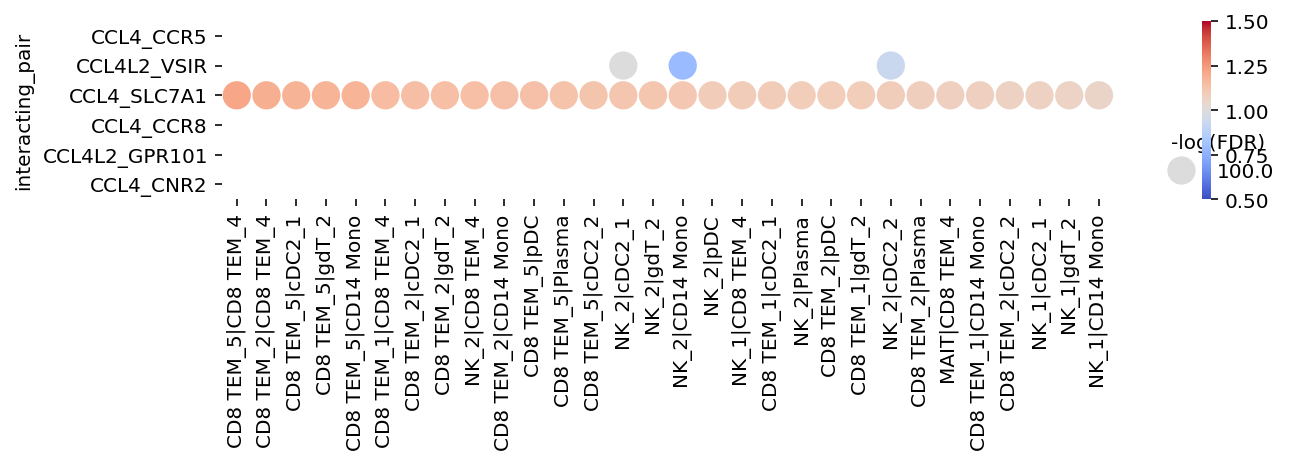

In [142]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_CCL4_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [143]:
ratio_IFNG = ratio[ratio.index.str.startswith("IFNG")]
ratio_IFNG

B intermediate kappa|B intermediate kappa  \
interacting_pair                                               
IFNG_Type II IFNR                                        NaN   

                   B intermediate kappa|B intermediate lambda  \
interacting_pair                                                
IFNG_Type II IFNR                                         NaN   

                   B intermediate kappa|B memory kappa  \
interacting_pair                                         
IFNG_Type II IFNR                                  NaN   

                   B intermediate kappa|B memory lambda  \
interacting_pair                                          
IFNG_Type II IFNR                                   NaN   

                   B intermediate kappa|B naive kappa  \
interacting_pair                                        
IFNG_Type II IFNR                                 NaN   

                   B intermediate kappa|B naive lambda  \
interacting_pair                                         
IFNG_Type II IFNR                                  NaN   

                   B intermediate kappa|CD14 Mono  \
interacting_pair                                    
IFNG_Type II IFNR                             NaN   

                   B intermediate kappa|CD16 Mono  \
interacting_pair                                    
IFNG_Type II IFNR                             NaN   

                   B intermediate kappa|CD4 Naive  \
interacting_pair                                    
IFNG_Type II IFNR                             NaN   

                   B intermediate kappa|CD4 Proliferating  ...  \
interacting_pair                                           ...   
IFNG_Type II IFNR                                     NaN  ...   

                   pDC|Treg Memory  pDC|cDC1  pDC|cDC2_1  pDC|cDC2_2  \
interacting_pair                                                       
IFNG_Type II IFNR              NaN       NaN         NaN         NaN   

                   pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  pDC|gdT_3  pDC|gdT_4  \
interacting_pair                                                           
IFNG_Type II IFNR        NaN        NaN        NaN        NaN        NaN   

                   pDC|pDC  
interacting_pair            
IFNG_Type II IFNR      NaN  

[1 rows x 2116 columns]

In [144]:
ratio_IFNG_sorted = ratio_IFNG.sort_values(["IFNG_Type II IFNR", ], ascending=False, axis=1)
ratio_IFNG_sorted

CD8 Proliferating|cDC1  NK_1|CD8 TEM_3  NK_2|CD8 TEM_3  \
interacting_pair                                                            
IFNG_Type II IFNR                2.700617        1.814004        1.639241   

                   NK_1|Plasma  NK_1|cDC2_2  NK_2|Plasma  NK_2|cDC2_2  \
interacting_pair                                                        
IFNG_Type II IFNR     1.596737     1.424361     1.419283     1.281905   

                   NK_4|CD8 TEM_3  CD8 TEM_1|cDC2_2  \
interacting_pair                                      
IFNG_Type II IFNR        1.274766          1.269373   

                   NK Proliferating|CD8 TEM_3  ...  pDC|Treg Memory  pDC|cDC1  \
interacting_pair                               ...                              
IFNG_Type II IFNR                     1.26378  ...              NaN       NaN   

                   pDC|cDC2_1  pDC|cDC2_2  pDC|dnT_2  pDC|gdT_1  pDC|gdT_2  \
interacting_pair                                                             
IFNG_Type II IFNR         NaN         NaN        NaN        NaN        NaN   

                   pDC|gdT_3  pDC|gdT_4  pDC|pDC  
interacting_pair                                  
IFNG_Type II IFNR        NaN        NaN      NaN  

[1 rows x 2116 columns]

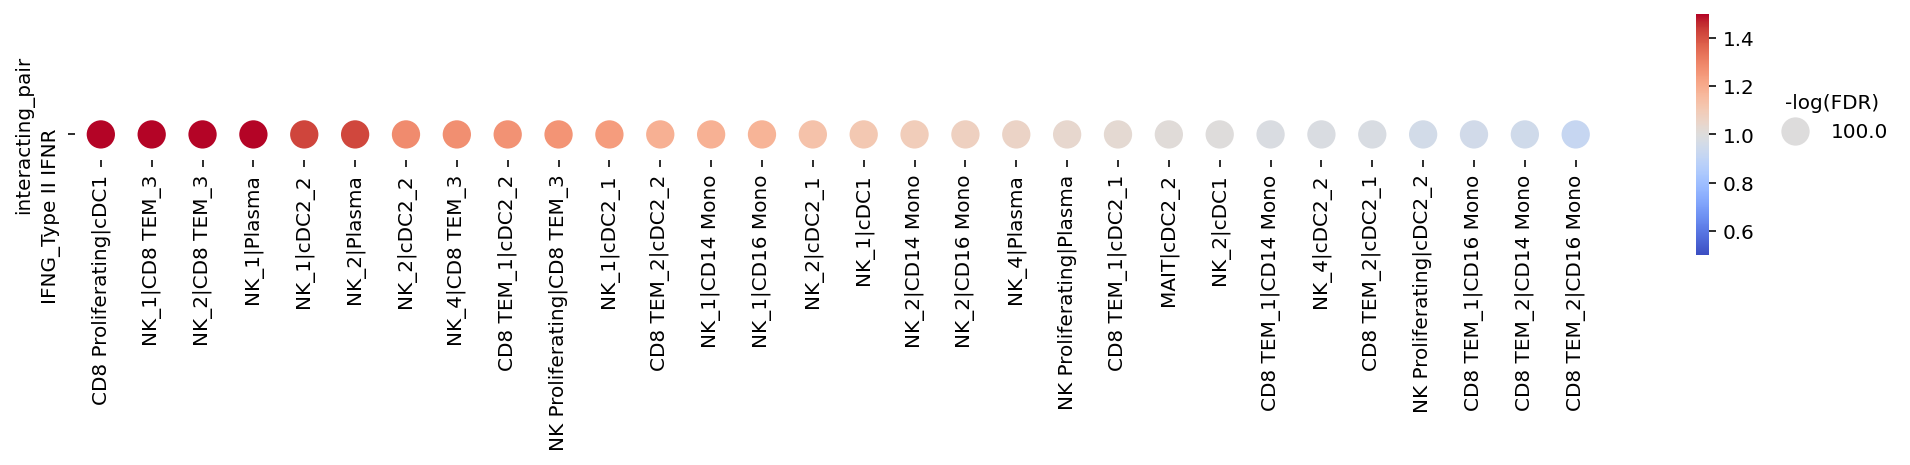

In [145]:
plt.figure(figsize=(14,3))
ax = scattermap(ratio_IFNG_sorted.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [146]:
## MUlktiple

interactions = ["ESAM_ESAM", "THBS1_a2Bb3 complex", "PF4_CXCR3", "CLEC2B_KLRF1", 
               "ICAM4_aLb2 complex", "ICAM1_ITGAL", "ICAM1_aLb2 complex", "ICAM1_AREG",
               "CCL5_CCR1", "PECAM1_CD38", "TNFSF14_LTBR", "TNFSF14_TNFRSF14",
               "TGFB1_TGFbeta receptor1", "TGFB1_TGFBR3", "CD160_TNFRSF14", "CCL4_SLC7A1",
               "IFNG_Type II IFNR",
               ]

ratio_selected = ratio[ratio.index.isin(interactions)]
ratio_selected

B intermediate kappa|B intermediate kappa  \
interacting_pair                                                     
THBS1_a2Bb3 complex                                            NaN   
PF4_CXCR3                                                      NaN   
ICAM4_aLb2 complex                                             NaN   
TNFSF14_LTBR                                                   NaN   
IFNG_Type II IFNR                                              NaN   
PECAM1_CD38                                                    NaN   
CCL5_CCR1                                                      NaN   
CCL4_SLC7A1                                                    NaN   
CD160_TNFRSF14                                                 NaN   
TNFSF14_TNFRSF14                                               NaN   
TGFB1_TGFbeta receptor1                                        NaN   
CLEC2B_KLRF1                                                   NaN   
ICAM1_ITGAL                                                    NaN   
ICAM1_aLb2 complex                                             NaN   
TGFB1_TGFBR3                                                   NaN   
ICAM1_AREG                                                     NaN   
ESAM_ESAM                                                      NaN   

                         B intermediate kappa|B intermediate lambda  \
interacting_pair                                                      
THBS1_a2Bb3 complex                                             NaN   
PF4_CXCR3                                                       NaN   
ICAM4_aLb2 complex                                              NaN   
TNFSF14_LTBR                                                    NaN   
IFNG_Type II IFNR                                               NaN   
PECAM1_CD38                                                     NaN   
CCL5_CCR1                                                       NaN   
CCL4_SLC7A1                                                     NaN   
CD160_TNFRSF14                                                  NaN   
TNFSF14_TNFRSF14                                                NaN   
TGFB1_TGFbeta receptor1                                         NaN   
CLEC2B_KLRF1                                                    NaN   
ICAM1_ITGAL                                                     NaN   
ICAM1_aLb2 complex                                              NaN   
TGFB1_TGFBR3                                                    NaN   
ICAM1_AREG                                                 1.565957   
ESAM_ESAM                                                       NaN   

                         B intermediate kappa|B memory kappa  \
interacting_pair                                               
THBS1_a2Bb3 complex                                      NaN   
PF4_CXCR3                                                NaN   
ICAM4_aLb2 complex                                       NaN   
TNFSF14_LTBR                                             NaN   
IFNG_Type II IFNR                                        NaN   
PECAM1_CD38                                              NaN   
CCL5_CCR1                                                NaN   
CCL4_SLC7A1                                              NaN   
CD160_TNFRSF14                                           NaN   
TNFSF14_TNFRSF14                                         NaN   
TGFB1_TGFbeta receptor1                                  NaN   
CLEC2B_KLRF1                                             NaN   
ICAM1_ITGAL                                              NaN   
ICAM1_aLb2 complex                                       NaN   
TGFB1_TGFBR3                                             NaN   
ICAM1_AREG                                               NaN   
ESAM_ESAM                                                NaN   

                         B intermediate kappa|B memory lambda  \
interacting_pair                                              

In [166]:
ratio_selected.loc["Total", :] = ratio_selected.sum(axis=0)
ratio_selected_sorted = ratio_selected.sort_values(["Total", ], ascending=False, axis=1)
ratio_selected_sorted

/Users/mmm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/mmm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


NK_2|CD14 Mono  NK_4|CD14 Mono  NK_4|cDC2_2  \
interacting_pair                                                       
THBS1_a2Bb3 complex                 NaN             NaN          NaN   
PF4_CXCR3                           NaN             NaN          NaN   
ICAM4_aLb2 complex                  NaN             NaN          NaN   
TNFSF14_LTBR                   1.400922        1.198171     1.117834   
IFNG_Type II IFNR              1.089933        0.888476     0.984668   
PECAM1_CD38                         NaN             NaN          NaN   
CCL5_CCR1                      1.041281        1.091179          NaN   
CCL4_SLC7A1                    1.115931        0.916540     0.895924   
CD160_TNFRSF14                 1.366013        1.012774     1.196242   
TNFSF14_TNFRSF14               1.269444        1.156780     1.399504   
TGFB1_TGFbeta receptor1        0.887117        0.946194     0.946164   
CLEC2B_KLRF1                        NaN             NaN          NaN   
ICAM1_ITGAL                    1.422442        1.286396     1.130081   
ICAM1_aLb2 complex             1.422442        1.286396     1.130081   
TGFB1_TGFBR3                        NaN             NaN          NaN   
ICAM1_AREG                          NaN        1.153846     0.957121   
ESAM_ESAM                           NaN             NaN          NaN   
Total                         44.062102       43.747006    39.030481   

                         NK_2|CD16 Mono  cDC2_1|NK_2  NK_4|CD16 Mono  \
interacting_pair                                                       
THBS1_a2Bb3 complex                 NaN          NaN             NaN   
PF4_CXCR3                           NaN          NaN             NaN   
ICAM4_aLb2 complex                  NaN          NaN             NaN   
TNFSF14_LTBR                   1.586387          NaN        1.298013   
IFNG_Type II IFNR              1.076814          NaN        0.866492   
PECAM1_CD38                         NaN     1.520468             NaN   
CCL5_CCR1                      1.060048          NaN        1.117351   
CCL4_SLC7A1                         NaN          NaN             NaN   
CD160_TNFRSF14                 1.404000          NaN        1.069610   
TNFSF14_TNFRSF14               1.323383     1.156164        1.210526   
TGFB1_TGFbeta receptor1        0.870229          NaN        0.929059   
CLEC2B_KLRF1                        NaN     0.871227             NaN   
ICAM1_ITGAL                    1.211191     1.284418        1.161194   
ICAM1_aLb2 complex             1.211191     1.284418        1.161194   
TGFB1_TGFBR3                        NaN     1.147580             NaN   
ICAM1_AREG                          NaN     1.576227             NaN   
ESAM_ESAM                           NaN          NaN             NaN   
Total                         38.972976    35.362007       35.253757   

                         NK_4|NK_2  cDC1|cDC2_1  NK_CD56bright|CD14 Mono  \
interacting_pair                                                           
THBS1_a2Bb3 complex            NaN          NaN                      NaN   
PF4_CXCR3                      NaN          NaN                      NaN   
ICAM4_aLb2 complex             NaN     2.207792                      NaN   
TNFSF14_LTBR                   NaN          NaN                 0.715655   
IFNG_Type II IFNR              NaN          NaN                 0.816555   
PECAM1_CD38                    NaN          NaN                      NaN   
CCL5_CCR1                      NaN          NaN                 1.017224   
CCL4_SLC7A1                    NaN          NaN                      NaN   
CD160_TNFRSF14            0.989754          NaN                 1.002994   
TNFSF14_TNFRSF14          1.153285          NaN                 0.824945   
TGFB1_TGFbeta receptor1   0.970745          NaN                 1.010145   
CLEC2B_KLRF1              0.984671          NaN                      NaN   
ICAM1_ITGAL               1.040346     2.027088                 1.335859   
ICA

In [167]:
ratio_selected_sorted_noTotal = ratio_selected_sorted.drop("Total", axis=0)
ratio_selected_sorted_noTotal

NK_2|CD14 Mono  NK_4|CD14 Mono  NK_4|cDC2_2  \
interacting_pair                                                       
THBS1_a2Bb3 complex                 NaN             NaN          NaN   
PF4_CXCR3                           NaN             NaN          NaN   
ICAM4_aLb2 complex                  NaN             NaN          NaN   
TNFSF14_LTBR                   1.400922        1.198171     1.117834   
IFNG_Type II IFNR              1.089933        0.888476     0.984668   
PECAM1_CD38                         NaN             NaN          NaN   
CCL5_CCR1                      1.041281        1.091179          NaN   
CCL4_SLC7A1                    1.115931        0.916540     0.895924   
CD160_TNFRSF14                 1.366013        1.012774     1.196242   
TNFSF14_TNFRSF14               1.269444        1.156780     1.399504   
TGFB1_TGFbeta receptor1        0.887117        0.946194     0.946164   
CLEC2B_KLRF1                        NaN             NaN          NaN   
ICAM1_ITGAL                    1.422442        1.286396     1.130081   
ICAM1_aLb2 complex             1.422442        1.286396     1.130081   
TGFB1_TGFBR3                        NaN             NaN          NaN   
ICAM1_AREG                          NaN        1.153846     0.957121   
ESAM_ESAM                           NaN             NaN          NaN   

                         NK_2|CD16 Mono  cDC2_1|NK_2  NK_4|CD16 Mono  \
interacting_pair                                                       
THBS1_a2Bb3 complex                 NaN          NaN             NaN   
PF4_CXCR3                           NaN          NaN             NaN   
ICAM4_aLb2 complex                  NaN          NaN             NaN   
TNFSF14_LTBR                   1.586387          NaN        1.298013   
IFNG_Type II IFNR              1.076814          NaN        0.866492   
PECAM1_CD38                         NaN     1.520468             NaN   
CCL5_CCR1                      1.060048          NaN        1.117351   
CCL4_SLC7A1                         NaN          NaN             NaN   
CD160_TNFRSF14                 1.404000          NaN        1.069610   
TNFSF14_TNFRSF14               1.323383     1.156164        1.210526   
TGFB1_TGFbeta receptor1        0.870229          NaN        0.929059   
CLEC2B_KLRF1                        NaN     0.871227             NaN   
ICAM1_ITGAL                    1.211191     1.284418        1.161194   
ICAM1_aLb2 complex             1.211191     1.284418        1.161194   
TGFB1_TGFBR3                        NaN     1.147580             NaN   
ICAM1_AREG                          NaN     1.576227             NaN   
ESAM_ESAM                           NaN          NaN             NaN   

                         NK_4|NK_2  cDC1|cDC2_1  NK_CD56bright|CD14 Mono  \
interacting_pair                                                           
THBS1_a2Bb3 complex            NaN          NaN                      NaN   
PF4_CXCR3                      NaN          NaN                      NaN   
ICAM4_aLb2 complex             NaN     2.207792                      NaN   
TNFSF14_LTBR                   NaN          NaN                 0.715655   
IFNG_Type II IFNR              NaN          NaN                 0.816555   
PECAM1_CD38                    NaN          NaN                      NaN   
CCL5_CCR1                      NaN          NaN                 1.017224   
CCL4_SLC7A1                    NaN          NaN                      NaN   
CD160_TNFRSF14            0.989754          NaN                 1.002994   
TNFSF14_TNFRSF14          1.153285          NaN                 0.824945   
TGFB1_TGFbeta receptor1   0.970745          NaN                 1.010145   
CLEC2B_KLRF1              0.984671          NaN                      NaN   
ICAM1_ITGAL               1.040346     2.027088                 1.335859   
ICAM1_aLb2 complex        1.040346     2.027088                 1.335859   
TGFB1_TGFBR3              0.927380          NaN                      Na

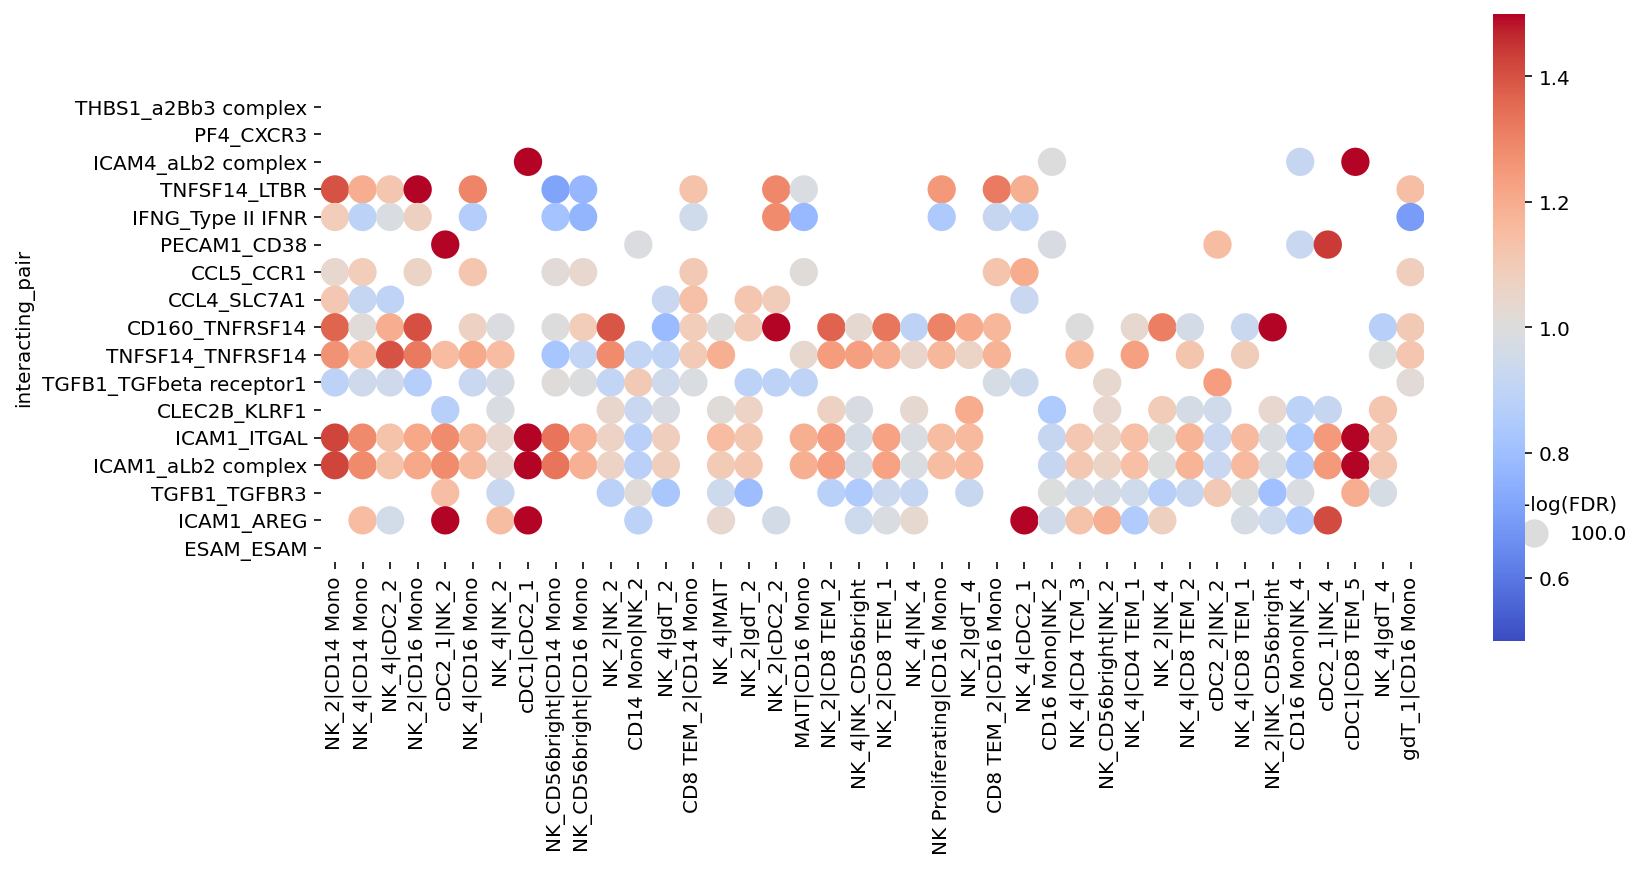

In [187]:
plt.figure(figsize=(12,6))
ax = scattermap(ratio_selected_sorted_noTotal.iloc[:,:40], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [169]:
ratio_selected_sorted.columns

Index(['NK_2|CD14 Mono', 'NK_4|CD14 Mono', 'NK_4|cDC2_2', 'NK_2|CD16 Mono',
       'cDC2_1|NK_2', 'NK_4|CD16 Mono', 'NK_4|NK_2', 'cDC1|cDC2_1',
       'NK_CD56bright|CD14 Mono', 'NK_CD56bright|CD16 Mono',
       ...
       'CD8 Proliferating|B intermediate lambda',
       'CD8 Proliferating|B intermediate kappa', 'CD8 Naive_2|pDC',
       'CD8 Naive_2|gdT_3', 'CD8 Naive_2|gdT_1', 'CD8 Naive_2|dnT_2',
       'CD8 Naive_2|cDC2_2', 'CD8 Naive_2|cDC2_1', 'CD8 Naive_2|cDC1',
       'CD8 TEM_4|B intermediate kappa'],
      dtype='object', length=2116)

In [192]:
NK_columns = [x for x in ratio_selected_sorted.columns if x.startswith("NK")]
len(NK_columns)

230

In [193]:
ratio_selected_sorted_NK = ratio_selected_sorted[NK_columns]

In [194]:
ratio_selected_sorted_NK = ratio_selected_sorted_NK.sort_values(["Total", ], ascending=False, axis=1)
ratio_selected_sorted_NK_noTotal = ratio_selected_sorted_NK.drop("Total", axis=0)

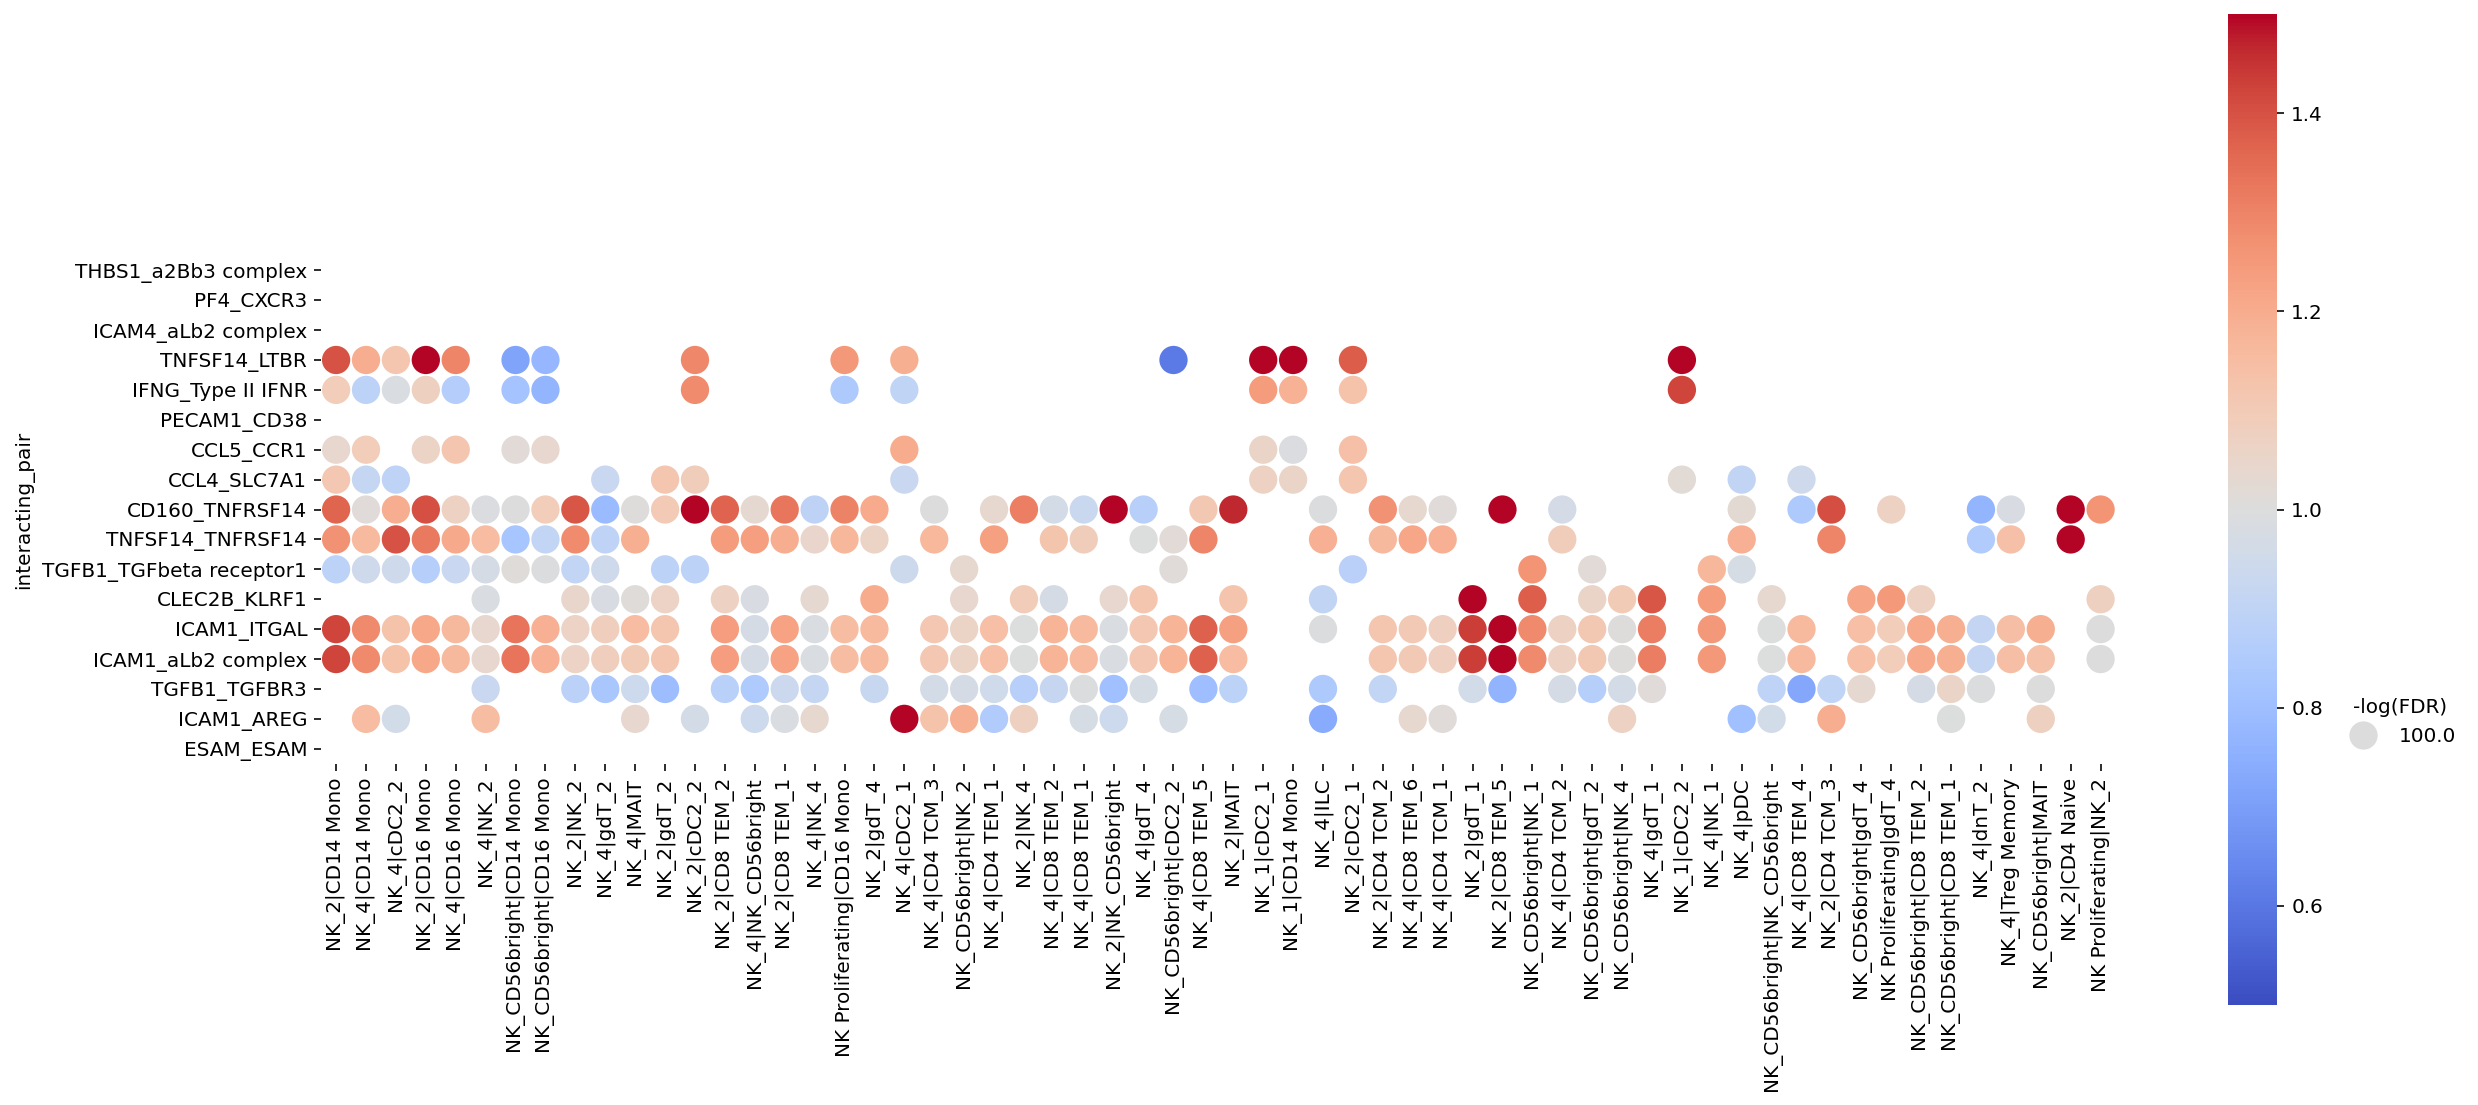

In [195]:
plt.figure(figsize=(18,8))
ax = scattermap(ratio_selected_sorted_NK_noTotal.iloc[:,:60], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [197]:
gdT_columns = [x for x in ratio_selected_sorted.columns if x.startswith("gdT")]
len(gdT_columns)

184

In [198]:
ratio_selected_sorted_gdT = ratio_selected_sorted[gdT_columns]
ratio_selected_sorted_gdT = ratio_selected_sorted_gdT.sort_values(["Total", ], ascending=False, axis=1)
ratio_selected_sorted_gdT_noTotal = ratio_selected_sorted_gdT.drop("Total", axis=0)

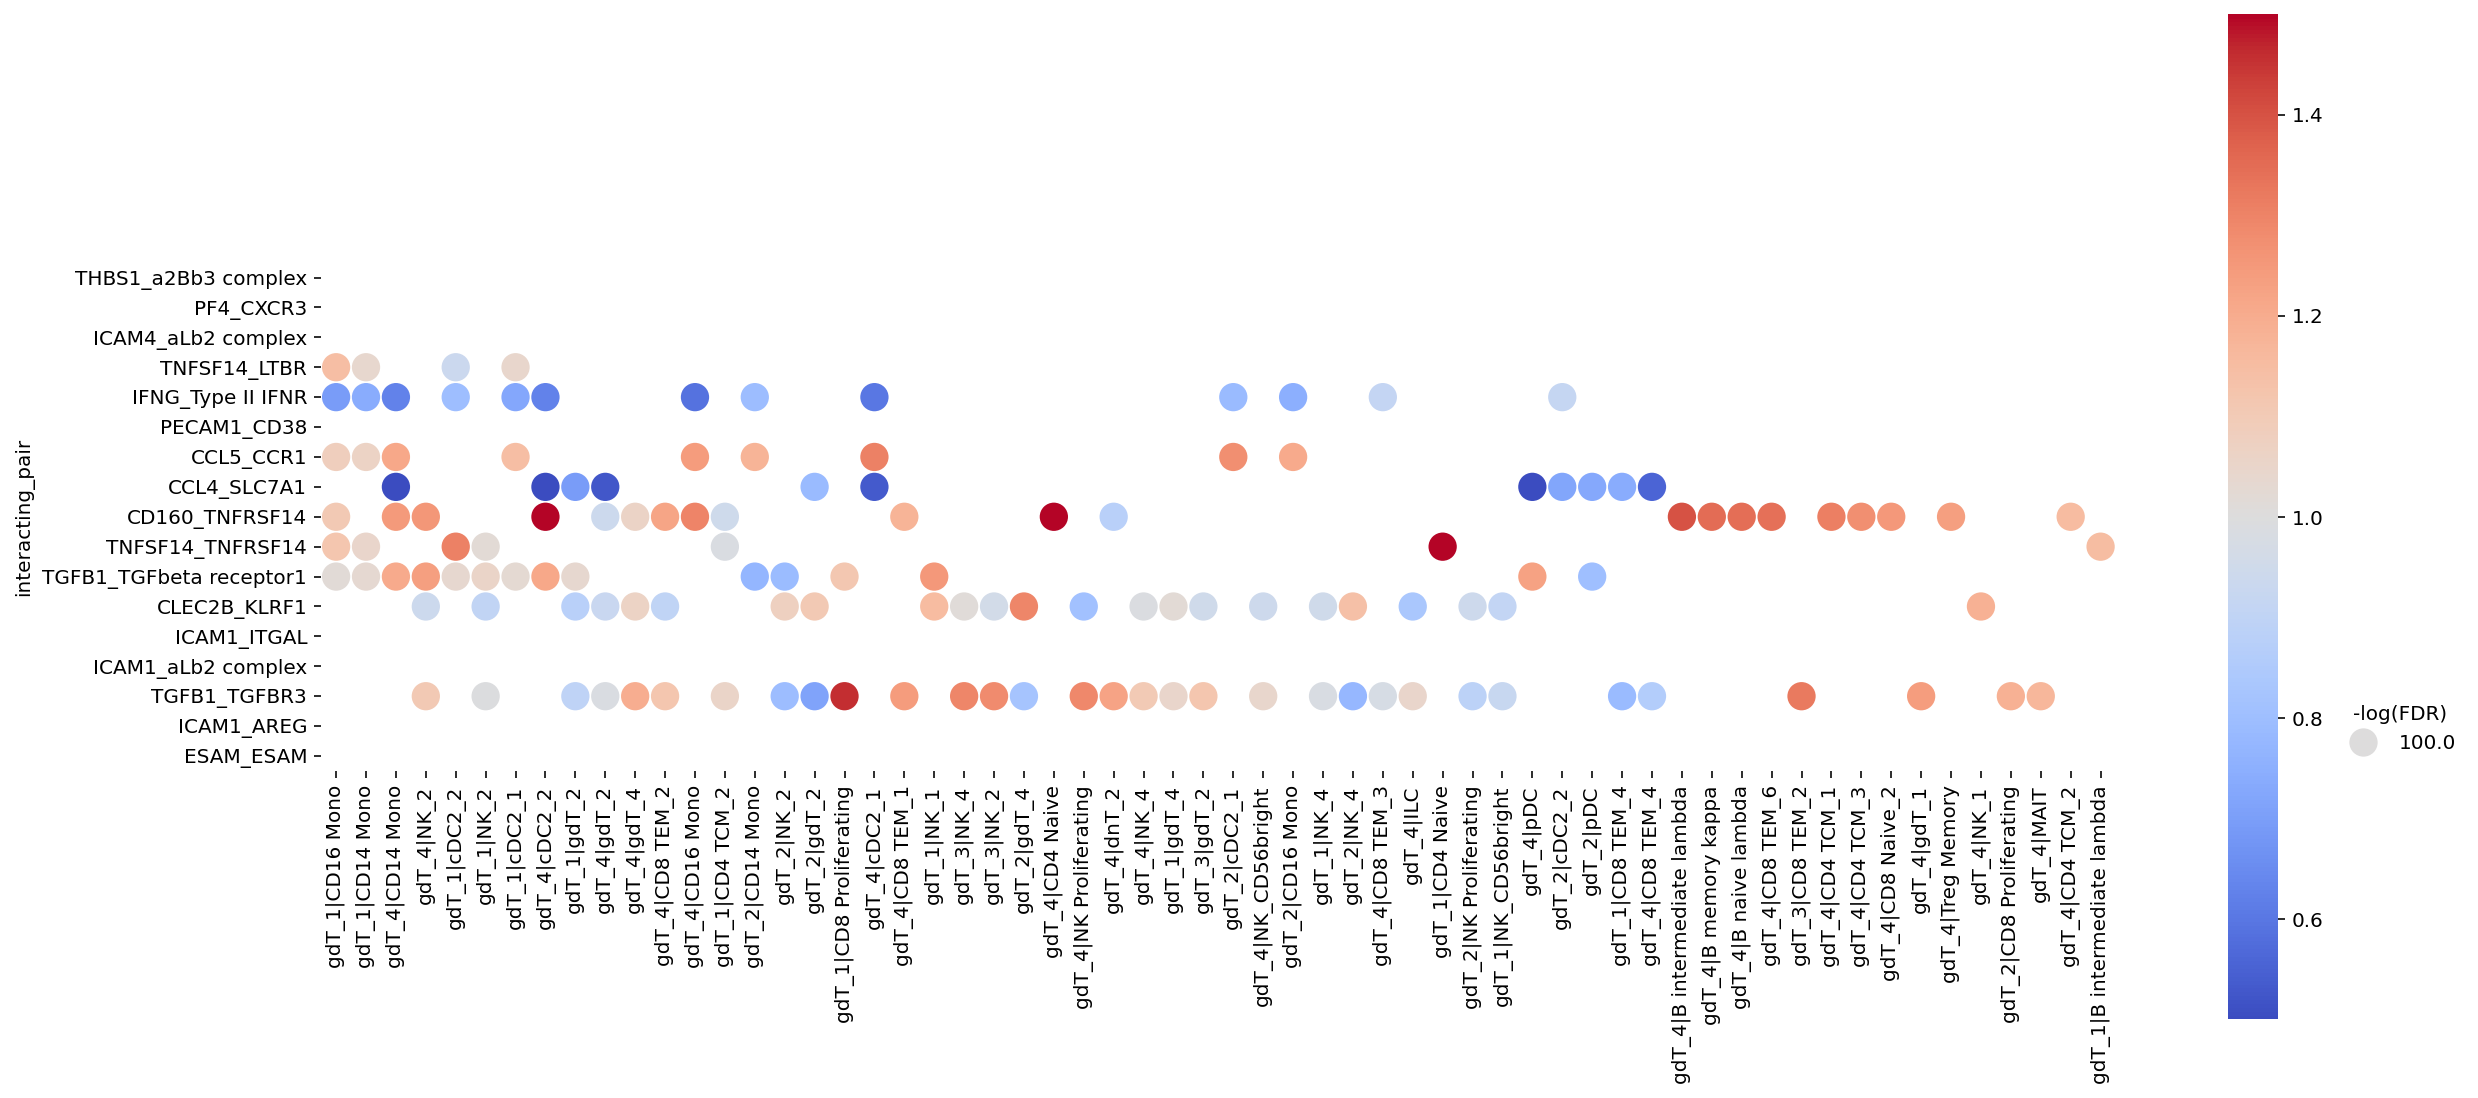

In [199]:
plt.figure(figsize=(18,8))
ax = scattermap(ratio_selected_sorted_gdT_noTotal.iloc[:,:60], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

In [200]:
platelet_columns = [x for x in ratio_selected_sorted.columns if x.startswith("Platelet")]
len(platelet_columns)

46

In [201]:
ratio_selected_sorted_platelet = ratio_selected_sorted[platelet_columns]
ratio_selected_sorted_platelet = ratio_selected_sorted_platelet.sort_values(["Total", ], ascending=False, axis=1)
ratio_selected_sorted_platelet_noTotal = ratio_selected_sorted_platelet.drop("Total", axis=0)

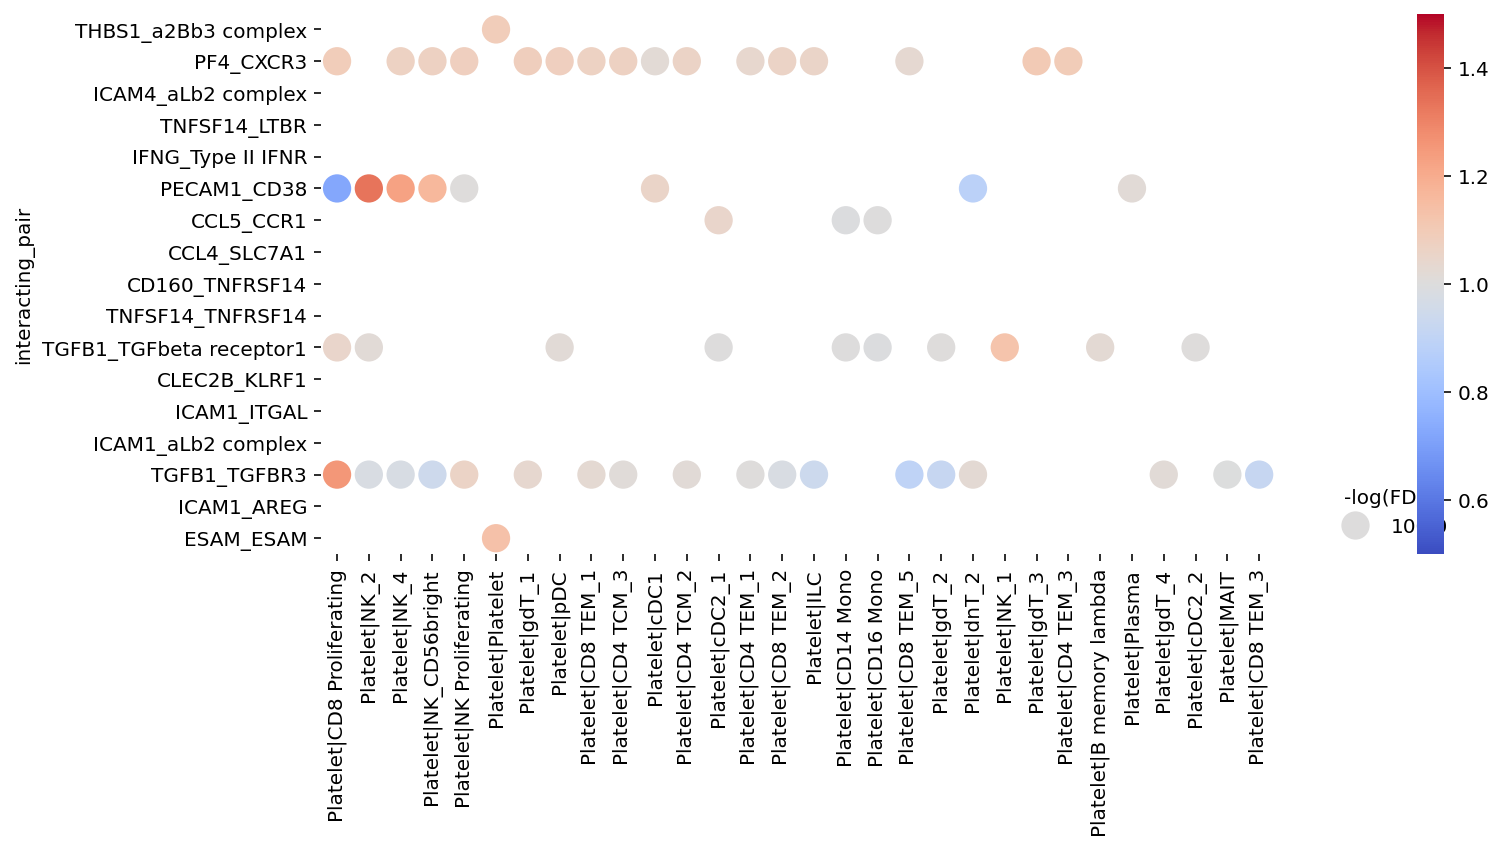

In [207]:
plt.figure(figsize=(20,6))
ax = scattermap(ratio_selected_sorted_platelet_noTotal.iloc[:,:30], cmap='coolwarm', vmin=0.5, vmax=1.5, factor=2, square=True) 
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")

## Separate ligand and receptors

February 2, 2022

In [3]:
codes = pd.read_csv(PATH + "L1_codes.tsv", sep="\t")
codes_dic = dict(zip(codes["interacting_pair"], codes["celltype"]))

data = pd.read_csv(PATH + "Proband_Aneu_vs_EU_L1.tsv", sep="\t")

In [7]:
data_A = data[(data["Select Aneu"] == "B") |  (data["Select Aneu"] == "A or B")]
data_B = data[(data["Select Aneu"] == "A") |  (data["Select Aneu"] == "A or B")]

In [8]:
data_A = data_A.set_index("interacting_pair")
data_B = data_B.set_index("interacting_pair")
data_A

Select Aneu  B_CleanAneu|B_CleanAneu  \
interacting_pair                                           
C5AR1_RPS19                   B                      NaN   
CD74_COPA                     B                    2.004   
CD74_MIF                      B                    2.345   
CD74_APP                      B                    1.831   
HLA-B_KIR3DL2            A or B                      NaN   
CD94:NKG2E_HLA-E              B                      NaN   
HLA-DPB1_TNFSF13B             B                      NaN   
CD44_HBEGF               A or B                      NaN   
CD94:NKG2A_HLA-E              B                      NaN   
HLA-C_FAM3C                   B                      NaN   
HLA-DPA1_TNFSF9               B                    1.147   
CD94:NKG2C_HLA-E              B                      NaN   
TNFRSF1B_GRN                  B                      NaN   
KLRB1_CLEC2D             A or B                      NaN   
ADORA2A_NAMPT                 B                      NaN   
CD55_ADGRE5              A or B                    0.968   
CD52_SIGLEC10            A or B                      NaN   
LTBR_LTB                      B                      NaN   
THBS1_a2Bb3 complex      A or B                      NaN   
PLAUR_a4b1 complex            B                      NaN   
ESAM_ESAM                A or B                      NaN   
FCER2_aXb2 complex            B                      NaN   
CLEC2B_KLRF1             A or B                      NaN   
ICAM1_aXb2 complex            B                      NaN   

                     B_CleanAneu|B_CleanEU  B_CleanAneu|CD4 T_CleanAneu  \
interacting_pair                                                          
C5AR1_RPS19                            NaN                          NaN   
CD74_COPA                            1.987                        2.002   
CD74_MIF                             2.324                        2.268   
CD74_APP                             1.817                          NaN   
HLA-B_KIR3DL2                          NaN                          NaN   
CD94:NKG2E_HLA-E                       NaN                          NaN   
HLA-DPB1_TNFSF13B                      NaN                          NaN   
CD44_HBEGF                             NaN                          NaN   
CD94:NKG2A_HLA-E                       NaN                          NaN   
HLA-C_FAM3C                            NaN                          NaN   
HLA-DPA1_TNFSF9                        NaN                          NaN   
CD94:NKG2C_HLA-E                       NaN                          NaN   
TNFRSF1B_GRN                           NaN                          NaN   
KLRB1_CLEC2D                           NaN                          NaN   
ADORA2A_NAMPT                          NaN                          NaN   
CD55_ADGRE5                            NaN                          NaN   
CD52_SIGLEC10                          NaN                          NaN   
LTBR_LTB                               NaN                          NaN   
THBS1_a2Bb3 complex                    NaN                          NaN   
PLAUR_a4b1 complex                     NaN                          NaN   
ESAM_ESAM                              NaN                          NaN   
FCER2_aXb2 complex                     NaN                          NaN   
CLEC2B_KLRF1                           NaN                          NaN   
ICAM1_aXb2 complex                     NaN                          NaN   

                     B_CleanAneu|CD4 T_CleanEU  B_CleanAneu|CD8 T_CleanAneu  \
interacting_pair                                                              
C5AR1_RPS19                                NaN                          NaN   
CD74_COPA                                1.944                        1.988   
CD74_MIF                                 2.404                        2.219   
CD74_APP                                   NaN                          NaN   
HLA-B_KIR3DL2                     

In [9]:
codes_A = codes[codes["Aneu (A - B - AB - O)"] == "A"]
codes_B = codes[codes["Aneu (A - B - AB - O)"] == "B"]

In [10]:
columns_A = codes_A["interacting_pair"].tolist()
columns_B = codes_B["interacting_pair"].tolist()
print(len(columns_A))
print(len(columns_B))

64
64


In [11]:
data_A = data_A[columns_A]
data_B = data_B[columns_B]
data_A.shape

(24, 64)

In [12]:
data_A = data_A.rename(columns=codes_dic)
data_B = data_B.rename(columns=codes_dic)
data_A.to_csv(DESKTOP + "data_A.tsv", sep="\t")
data_B.to_csv(DESKTOP + "data_B.tsv", sep="\t")

In [13]:
data_AB = pd.read_csv(DESKTOP + "data_AB2.tsv", sep="\t")

In [14]:
data_AB = data_AB.set_index("interacting_pair")

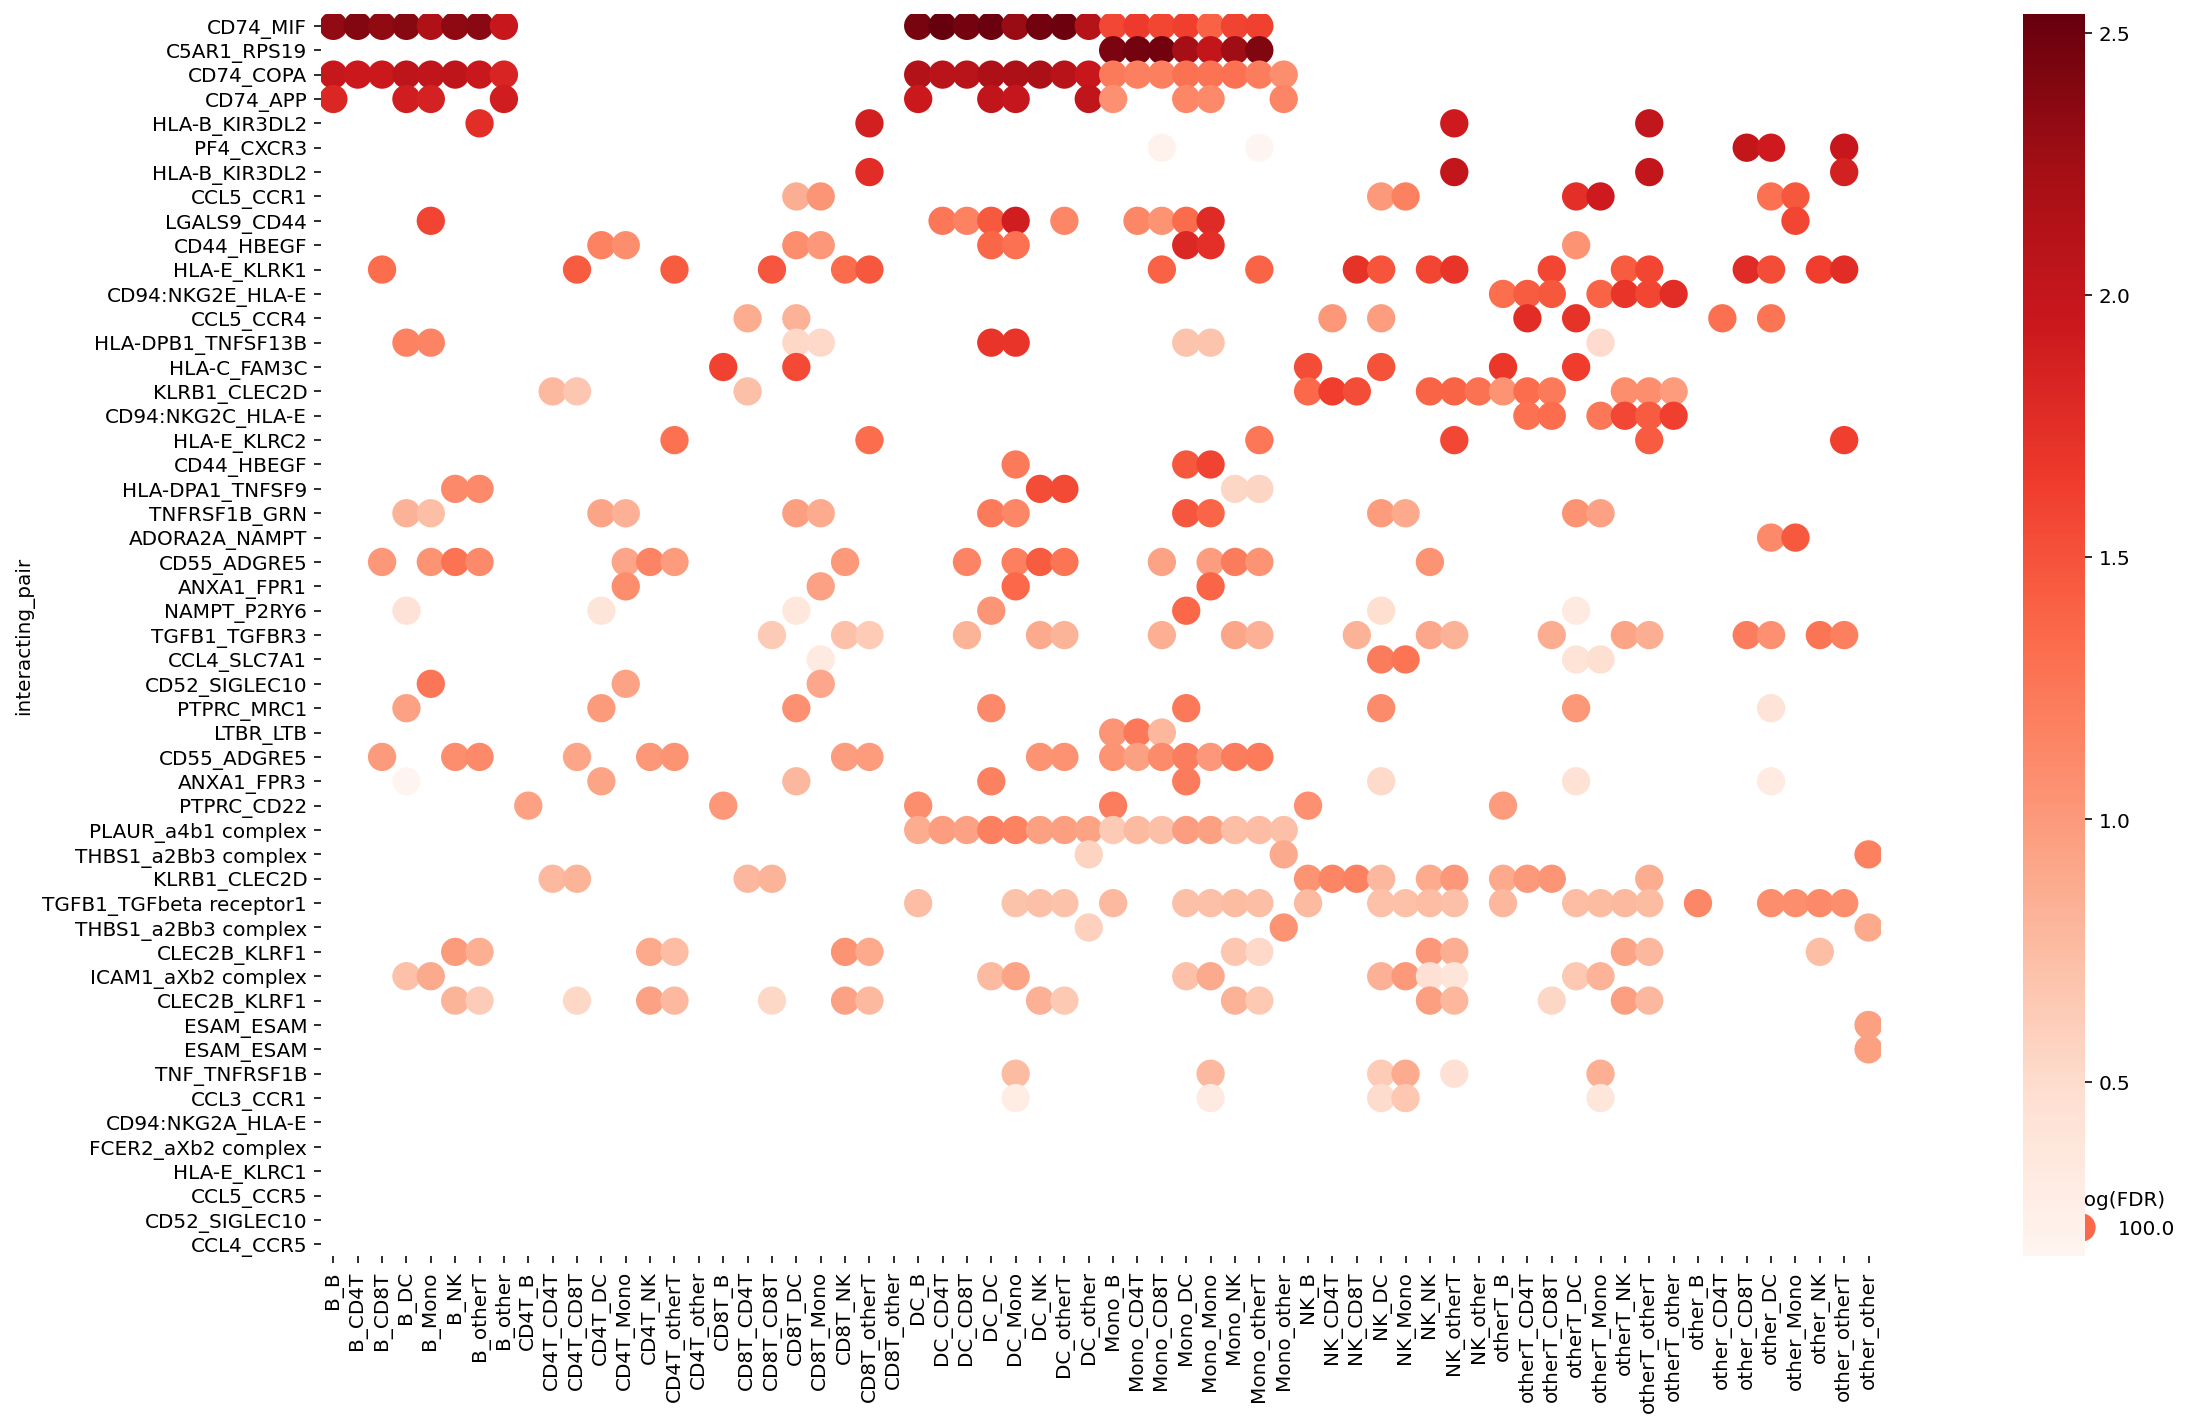

In [15]:
plt.figure(figsize=(20,10))
ax = scattermap(data_AB, cmap='Reds', factor=2, square=True) #marker_size=pre_res_fdr
plt.tight_layout()
plt.savefig(DESKTOP + "dotPlot.png")